In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import json
import matplotlib.font_manager as pltf

In [28]:
def clean_data(column, data, extract):
    for index in data.index:
        value = data[column].loc[index]
        s = json.loads(json.dumps(eval(value)))
        data[column].loc[index] = ','.join(sorted(pd.DataFrame(s)[extract].tolist()))
    return data


In [4]:
def split_rows(data, column):
    df = data[column].str.split(',', expand=True).stack()
    df = df.reset_index(level=1, drop=True).rename(column)
    data = data.drop(column, axis=1)
    data = data.join(df)
    return data

# Question 1: (based on the both datasets) (0.5 Mark)

Join the two datasets based on the "id" columns in the datasets, keeping the rows as long as there is a match between the id columns of both dataset (do not concatenate the datasets).

In [5]:
# input: path of csv files
# merge two datasets
def question_1(movies, credits):
    df_credits = pd.read_csv(credits)
    df_movies = pd.read_csv(movies)
#     print(list(df_credits))
#     print(list(df_movies))
    df = pd.merge(df_credits, df_movies, how='inner')
    return df
df1 = question_1('movies.csv', 'credits.csv')

In [6]:
df1

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",2,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,tt0094675,fi,...,21/10/1988,0,69,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,False,7.1,44
1,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",3,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,tt0092149,fi,...,16/10/1986,0,76,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Shadows in Paradise,False,7.1,35
2,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",5,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,tt0113101,en,...,9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539
3,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",6,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt0107286,en,...,15/10/1993,12136938,110,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.4,79
4,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,tt0076759,en,...,25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,"[{'cast_id': 6, 'character': 'Jimmy', 'credit_...","[{'credit_id': '560f3cc09251414779004a53', 'de...",1589,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0337631,en,...,12/09/2003,0,91,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Boys from County Clare,False,6.5,3
763,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",1590,False,NaN,11000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0424908,en,...,10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Copying Beethoven,False,6.3,44
764,"[{'cast_id': 17, 'character': 'Jettel Redlich'...","[{'credit_id': '52fe4302c3a36847f803389b', 'de...",1591,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0161860,de,...,11/12/2001,0,140,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One family's tale of a homeland lost... and a ...,Nowhere in Africa,False,7.0,32
765,"[{'cast_id': 1, 'character': 'Martin Vail', 'c...","[{'credit_id': '52fe4302c3a36847f80339a1', 'de...",1592,False,NaN,30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0117381,en,...,3/04/1996,102616183,129,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Sooner or later, a man who wears two faces for...",Primal Fear,False,7.4,644


# Question 2: ( based on the dataframe created in Question-1 ) ( 0.5 Mark )

Keep the following rows in the resultant dataframe (remove the rest of columns from the result dataset):
' 'id', title', 'popularity', 'cast', 'crew', 'budget', 'genres', 'original_language', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count'

In [6]:
# input dataframe
# drop columns
def question_2(df1):
    columns = ['id', 'title', 'popularity', 'cast', 'crew', 'budget', 
               'genres', 'original_language', 'production_companies', 
               'production_countries', 'release_date', 'revenue', 
               'runtime', 'spoken_languages', 'vote_average', 'vote_count']
    columns_to_drop = [x for x in df1 if x not in columns ]
#     print(columns_to_drop)
    df2 = df1.drop(columns_to_drop, axis=1)
#     print(set(new_df) == set(columns))
    return df2
    
df2 = question_2(df1)

In [7]:
df2

,cast,crew,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",2,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,3.860491,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",21/10/1988,0,69,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Ariel,7.1,44
1,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",3,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",fi,2.292110,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",16/10/1986,0,76,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Shadows in Paradise,7.1,35
2,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",5,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,9.026586,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539
3,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",6,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,5.538671,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",15/10/1993,12136938,110,"[{'iso_639_1': 'en', 'name': 'English'}]",Judgment Night,6.4,79
4,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11,11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,42.149697,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,"[{'cast_id': 6, 'character': 'Jimmy', 'credit_...","[{'credit_id': '560f3cc09251414779004a53', 'de...",1589,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,0.227122,"[{'name': 'Isle of Man Film Commission', 'id':...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",12/09/2003,0,91,"[{'iso_639_1': 'en', 'name': 'English'}]",The Boys from County Clare,6.5,3
763,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",1590,11000000,"[{'id': 18, 'name': 'Drama'}]",en,2.331416,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44
764,"[{'cast_id': 17, 'character': 'Jettel Redlich'...","[{'credit_id': '52fe4302c3a36847f803389b', 'de...",1591,0,"[{'id': 18, 'name': 'Drama'}]",de,3.020270,"[{'name': 'MTM Cineteve', 'id': 740}, {'name':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",11/12/2001,0,140,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Nowhere in Africa,7.0,32
765,"[{'cast_id': 1, 'character': 'Martin Vail', 'c...","[{'credit_id': '52fe4302c3a36847f80339a1', 'de...",1592,30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",en,10.326213,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",3/04/1996,102616183,129,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Primal Fear,7.4,644


# Question 3: ( based on the dataframe created in Question-2 ) ( 0.5 Mark )

Set the index of the resultant dataframe as 'id'.


In [8]:
# input dataframe
# set index
def question_3(df2):
    df3 = df2.set_index('id')
    return df3
df3 = question_3(df2)

In [9]:
df3

,cast,crew,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
id,,,,,,,,,,,,,,,
2,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,3.860491,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",21/10/1988,0,69,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Ariel,7.1,44
3,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",fi,2.292110,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",16/10/1986,0,76,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Shadows in Paradise,7.1,35
5,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,9.026586,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539
6,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,5.538671,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",15/10/1993,12136938,110,"[{'iso_639_1': 'en', 'name': 'English'}]",Judgment Night,6.4,79
11,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,42.149697,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,"[{'cast_id': 6, 'character': 'Jimmy', 'credit_...","[{'credit_id': '560f3cc09251414779004a53', 'de...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,0.227122,"[{'name': 'Isle of Man Film Commission', 'id':...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",12/09/2003,0,91,"[{'iso_639_1': 'en', 'name': 'English'}]",The Boys from County Clare,6.5,3
1590,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,2.331416,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44
1591,"[{'cast_id': 17, 'character': 'Jettel Redlich'...","[{'credit_id': '52fe4302c3a36847f803389b', 'de...",0,"[{'id': 18, 'name': 'Drama'}]",de,3.020270,"[{'name': 'MTM Cineteve', 'id': 740}, {'name':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",11/12/2001,0,140,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Nowhere in Africa,7.0,32


# Question 4: ( based on the dataframe created in Question-3 ) ( 0.5 Mark )

Drop all rows where the budget is 0

In [11]:
# drop rows where budge=0
def question_4(df3):
    df4 = df3.query('budget != 0')
    return df4
df4 = question_4(df3)

In [12]:
df4

,cast,crew,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
id,,,,,,,,,,,,,,,
5,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,9.026586,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539
11,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,42.149697,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778
12,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,25.497794,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292
13,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,48.307194,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147
14,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",15000000,"[{'id': 18, 'name': 'Drama'}]",en,20.726578,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,"[{'cast_id': 13, 'character': 'Gilbert Grape',...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,10.391900,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943
1588,"[{'cast_id': 1, 'character': 'Torrance Shipman...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",28000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.402888,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574
1590,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,2.331416,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44


# Question 5: (based on the dataframe created in Question-4) (1 Mark)

Assume that there is a ranking scheme for movies defined by " (revenue - budget)/budget ". Add a new column for the dataframe, and name it "success_impact", and calculate it for each movie based on the given formula.

In [13]:
def question_5(df4):
    success_impact = df4.apply(lambda x: (x['revenue']-x['budget'])/x['budget'], axis=1)
#     print(success_impact)
    df5 = df4.copy()
    df5.insert(0, 'success_impact', success_impact)
    return df5
df5 = question_5(df4)

In [14]:
df5

,success_impact,cast,crew,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,
5,0.075000,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,9.026586,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539
11,69.490728,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,42.149697,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778
12,9.003570,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,25.497794,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292
13,11.326280,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,48.307194,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147
14,22.753107,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",15000000,"[{'id': 18, 'name': 'Drama'}]",en,20.726578,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,-0.087930,"[{'cast_id': 13, 'character': 'Gilbert Grape',...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,10.391900,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943
1588,2.230355,"[{'cast_id': 1, 'character': 'Torrance Shipman...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",28000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.402888,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574
1590,-1.000000,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,2.331416,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44


# Question 6: (based on the dataframe created in Question-5) (1 Mark)

Normalize the " popularity " column by scaling between 0 to 100. The least popular movie should be 0 and the most popular one must be 100.

In [15]:
def question_6(df5):
    df_popu = df5['popularity']
    df_p = ((df_popu - df_popu.min())/(df_popu.max() - df_popu.min()))*100
#     print(df_p.min(),df_p.max())
    df6 = df5.copy()
    df6['popularity'] = df_p
    return df6
df6 = question_6(df5)

In [18]:
max(df6['popularity']),min(df6['popularity'])

(100.0, 0.0)

# Question 7: (based on the dataframe created in Question-6) ( 0.5 Mark )

Change the data type of the "popularity" column to (int16).


In [31]:
def question_7(df6):
    df7 = df6.astype({'popularity': 'int16'})
    return df7
    
df7 = question_7(df6)

In [32]:
df7.dtypes

success_impact          float64
cast                     object
crew                     object
budget                    int64
genres                   object
original_language        object
popularity                int16
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                   int64
spoken_languages         object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [22]:
for c in df7['cast']:
    ','.join(sorted([x['character'] for x in eval(c)]))

'Angela,Athena,Betty,Chester Rush,Corpse,Diana,Elspeth,Eva,Hooker,Jezebel,Juancho,Kiva,Leo,Long Hair Yuppy Scum,Man,Margaret,Norman,Raven,Sam the Bellhop,Sarah,Siegfried,TV Dancing Girl,Ted the Bellhop,Wife'

'Artoo-Detoo (R2-D2),Aunt Beru,BoShek (uncredited),Boba Fett (special edition) (uncredited),Brea Tonnika (uncredited),Cantina Alien (uncredited),Cantina Alien (uncredited),Cantina Alien (uncredited),Cantina Patron (uncredited),Cantina Patron (uncredited),Cantina Patron (uncredited),Cantina Patron (uncredited),Cantina Patron (uncredited),Cantina Patron (uncredited),Cantina Patron (uncredited),Cantina Patron (uncredited),Cantina Voices (voice) (uncredited),Chall Bekan (uncredited),Chewbacca,Chief Jawa,Cmdr. Praji (Imperial Officer #2 on rebel ship) (uncredited),Commander #1,Daine Jir (uncredited),Darth Vader,Death Star Gunner (uncredited),Death Star Trooper (uncredited),Death Star Trooper (uncredited),Death Star Trooper (uncredited),Del Goren (uncredited),Djas Puhr (uncredited),Dr. Evazan (uncredited),Drifter (Red 12) (uncredited),Garindan (uncredited),General Dodonna,General Motti,General Taggi,General Willard,Gold Five,Gold Leader,Gold Two,Grand Moff Tarkin,Greedo (uncredited),Greedo (

'Anchor (voice),Bloat (voice),Bruce (voice),Bubbles (voice),Chum (voice),Coral (voice),Crush (voice),Darla (voice),Deb / Flo (voice),Dentist (voice),Dory (voice),Fish School (voice),Gill (voice),Gurgle (voice),Jacques (voice),Marlin (voice),Mr. Ray (voice),Nemo (voice),Nigel (voice),Peach (voice),Pearl (voice),Sheldon (voice),Squirt (voice),Tad (voice)'

"Abbie Hoffman,Aging Hippie,Army Hospital Male Nurse,Army Recruiter,Barber,Barracks Recruit,Barracks Recruit (uncredited),Black Panther,Black Panther (uncredited),Boy with cross,Bubba's Great Grandmother,Bubba's Mother,Carla,Cheerleader (uncredited),Cleveland,Club patron,Club patron,Club patron,College Football Coach,Crony,Dick Cavett,Discharge Officer,Drill Sergeant,Drugged Out Boyfriend,Earl,Elderly Southern Woman,Football Coach (uncredited),Football Fan (uncredited),Football Player (uncredited),Football Player (uncredited),Forrest Gump,Forrest Gump Jr.,Helicopter gunman,High School Football Coach,Hollywood Boulevard Girlfriend,Hospital Officer,Isabel,Jenny Curran,Jenny's Babysitter (uncredited),Jenny's Father,Jenny's date,Lenore,Local Anchor #1,Louise,Lt. Dan Taylor,Mrs. Gump,National Guardsman (uncredited),Newscaster,Nicholas Katzenbach (uncredited),President Johnson (voice),President Kennedy (voice),President Nixon (voice),Principal,Pvt. Benjamin Buford 'Bubba' Blue,Recruiter,Scho

"Advertising Executive (uncredited),Angela Hayes,Barbara Fitts,Bartender (uncredited),Brad Dupree,Buddy Kane,Carolyn Burnham,Catering Boss,Christy Kane,Colonel Frank Fitts,Firing Range Attendant,Jane Burnham,Jim Berkley,Jim Olmeyer,Lester Burnham,Mr. Smiley's Counter Girl (Janine),Mr. Smiley's Manager,Newscaster (uncredited),Playground Girl #1,Playground Girl #2,Ricky Fitts,Sale House Man #1,Sale House Man #2,Sale House Man #3,Sale House Woman #1,Sale House Woman #2,Sale House Woman #3,Sale House Woman #4,Spartanette #1,Spartanette #10,Spartanette #2,Spartanette #3,Spartanette #4,Spartanette #5,Spartanette #6,Spartanette #7,Spartanette #8,Spartanette #9,Wedding Guest (uncredited),Young Jane"

"(uncredited),Adolf Hitler (uncredited),Bertha Anderson,Best Man at Wedding (uncredited),Big Governess (uncredited),Boss Printer (uncredited),Car-Driver (uncredited),Charles Foster Kane,Charles Foster Kane III,Chorus Master (uncredited),City Editor (uncredited),City Room Employee (uncredited),Civic Leader (uncredited),Civic Leader (uncredited),Copy Boy (uncredited),Copy Boy (uncredited),Copy Boy Delivering Message in Chicago Hotel Room (uncredited),Dancer (uncredited),Dancer (uncredited),Dancer (uncredited),Dancer (uncredited),Dancer (uncredited),Dr. Corey (uncredited),Emily Norton Kane,Entertainer\t (uncredited),Ethel (uncredited),Expressman (uncredited),Extra (uncredited),Fish Driver (uncredited),French Maid (uncredited),Georgia (uncredited),Gino (uncredited),Guest (uncredited),Herbert Carter,Hermann Goring (uncredited),Hireling (uncredited),Hireling (uncredited),House Maid (uncredited),Inquirer Reporter (uncredited),Interviewer,Jedediah Leland,Jerry Thompson/Narrator,Jim Kane,Jim W.

"Angry Man,Bill Houston,Brenda,Chairman / Dancer,Dancer,Dancer,Dancer (uncredited),Defense Attorney,Detective,District Attorney,Doctor,Dr. Porkorny,Gene Jezkova,Jeff,Judge,Kathy,Linda Houston,Morty,New Defense Council,Norman,Officer of the Court / Dancer,Oldrich Novy,Person in Doorway,Prison Guard - Serving Selma Jezkova's last meal (uncredited),Receptionist,Samuel,Selma Jezkova,Suzan,Woman on Night Shift"

"Afro Scott,Airport Cop,Aziz,Baby Ray,Billy,Bodyguard,Burger Assistant,Burger Assistant,Burger Assistant,Check-in Attendant,Chief NY Cop,Cop,Cop,David,Diva Plavalaguna,Diva's Assistant,Diva's Manager,Emperor Kodar Japhet,Father Vito Cornelius,Fhloston Captain,Fhloston Commander,Fhloston Hostess,Fhloston Hostess,Flying Cop,Flying Cop,Flying Cop,Flying Cop,Flying Cop,Flying Cop,Flying Cop,Flying Cop / Military Technician,Fog,General Munro,General Staedert,General Tudor,Glamorous Alien Diva at Event,Glamorous Japanese Girl,Ground Crew,Head Scientist,Head of Military,Hefty Man,Hotel Manager,Human Aknot,Japanese Hostess,Jean-Baptiste Emmanuel Zorg,Korben Dallas,Lab Guard,Lab Guard,Leeloo,Left Arm,Mactilburgh,Mactilburgh's Assistant,Mactilburgh's Technician,Major Iceborg,Mangalor alien,Mangalore Akanit,Mangalore Kino,Military Technician,Military Technician,Military Technician,Mondoshawan,Mondoshawan,Mondoshawan,Mondoshawan #3,Mondoshawan / Ground Crew,Mondoshawan / Mangalore Aknot / Airport 

"Arbeiterfrau,C.A. Rotwang, the inventor,Creative Human,Freder Fredersen,Grot,Jan,Johann 'Joh' Fredersen,Josaphat,Lady in Car / Woman of Eternal Gardens,Maria,Marinus,Master of Ceremonies,No. 11811 - Georgy,Son in Eternal Gardens (uncredited),The Thin Man,Woman of Eternal Gardens (uncredited),Working Man (uncredited),Working Man (uncredited),Working Man Who Causes Explosion of M-Machine (uncredited),Working Woman (uncredited),Working Woman (uncredited)"

"Anamaria,Barbossa's Crew (uncredited),Bo'sun,Butler,Captain Hector Barbossa,Captain Jack Sparrow,Clubba: Barbossa's Crew,Commodore James Norrington,Cotton,Cotton's Parrot (voice),Crimp: Jack's Crew,Crippled Man,Crying Boy,Crying Boy,Dog Ear: Barbossa's Crew,Duncan: Jack's Crew,Elizabeth Swann,Estrella,Frightened Sailor,Giselle,Governor Weatherby Swann,Grapple,Harbormaster,Hawksmoor: Barbossa's Crew,Jacoby,Joshamee Gibbs,Katracho: Barbossa's Crew,Ketchum: Barbossa's Crew,Koehler,Kursar: Jack's Crew,Ladbroc: Jack's Crew (as Chris 'Sully' Sullivan),Lejon,Lieutenant Gillette,Lieutenant Theodore Groves,Mallot,Marine (uncredited),Marty,Matelot: Jack's Crew,Maximo: Barbossa's Crew,Moises: Jack's Crew,Monk: Barbossa's Crew (as Michael Lane),Mr. Brown,Mullroy,Murtogg,Nipperkin: Barbossa's Crew,Pintel,Pirate (uncredited),Pirate (uncredited),Quartetto: Jack's Crew,Ragetti,Sailor,Sailor (uncredited),Sailor / Edinburgh,Scarlett,Scarus: Barbossa's Crew,Scratch: Barbossa's Crew,Seedy Looking Prisone

"Bald Guy (Sushi Shop),Beatrix 'The Bride' Kiddo,Bill,Boss Benta,Boss Honda,Boss Matsumoto (anime sequence) (voice),Boss Orgami,Boss Ozawah,Buck,Budd,Charlie Brown,Crazy 88,Crazy 88,Crazy 88,Crazy 88,Crazy 88 #1 (Miki),Crazy 88 #6 (Girl),Earl McGraw,Edgar McGraw,Elle Driver,Gogo Yubari,Hattori Hanzo,Johnny Mo,Nikki Bell,O-Ren (anime sequence) (voice),O-Ren Ishii,Okinawa Airline Ticket Agent,Pretty Riki (anime sequence) (voice),Proprietor,Sofie Fatale,Tanaka,The 5, 6, 7, 8's,Tokyo Business Man,Trucker,Vernita Green,Young 88 (Spanked Boy)"

"Alan Troy,Anthony Swofford,Bored Gunny,Branded Marine,Corporal Harrigan,D.I. Fitch,Fergus O'Donnell,Julius,Kruger,Lt. Col. Kazinski,Major Lincoln,Mr. Swofford,Mrs. Swofford,Nurse,Poitier,Ramon Escobar,Staff Sgt. Sykes,Swoff's Sister,Young Mr. Swofford,Young Mrs. Swofford"

"Carmen,Carmen's Assistant,Dan,Don Johnston,Dora,Girl on Bus,Kid in Car,Laura,Lolita,Mona,Penny,Rita,Ron,Sherry,Sun Green,The Kid,Will,Winston,Young Man on Bus"

',,,Birthe,Christian Klingenfeldt,Faderen Helge Klingenfeldt,Farfar,Farmor,Gbatokai,Helene,Kim,Linda,Mette,Michael,Michelle,Moderen,Onklen,Pia,Receptionisten,Taxidriver,Toastmasteren'

'Ally Loman,Bobby,Bruce Nolan,Camera Operator,Dallas Coleman,Debbie,Evan Baxter,God,Grace Connelly,Jack Baylor,Susan Ortega'

"'Fat' Moe Gelly,Al Capuano,Beefy,Bugsy,Carol,Cemetery Director (uncredited),Chicken Joe,Crowning,David 'Noodles' Aaronson,Deborah Gelly,Dominic,Eve,Frankie Minaldi,Fred Capuano,Friend of Young Deborah,Irving Gold,James Conway O'Donnell,Joe,Johnny Capuano,Man in Puppet Theathre,Mandy,Maximilian 'Max' Bercovicz,Monkey,Officer Whitey,Patrick 'Patsy' Goldberg,Philip 'Cockeye' Stein,Police Chief Vincent Aiello,Thug,Trigger,Willie the Ape,Woman in the Puppet Theatre,Young 'Fat' Moe Gelly,Young Cockeye,Young Deborah,Young Deborah (Double),Young Max / David Bailey,Young Noodles,Young Patsy"

'Alex Hughes,Clyde,Deborah the Neighbour,Diane Wooton,Dick the Neighbour,Dirk Freeman,Ellen Freeman,Florence,John Neil,Linda,Louise,Maggie,Meryl,Priest,Rookie Cop,Vivienne Freeman,Waitress'

'Armando,Barker,Bartender,Basketball Player,Beau-line Graphics Model,Bouncer,Club Dancer,Dancer,Detective #1,Detective #2,Doctor,Dr. Ivan Slavicky,Drina,Ferris Wheel Mom,Ferris Wheel Operator,Forensics Cop,Forensics Technician,George Hedare,Graphologist,Housekeeper,Jail Guard,Janitor,Jeweler,Kid #1,Kid #2,Kid #3,Lance,Laurel Hedare,Little Boy,Man on Stairs,Newscaster,Nightclub Dancer,Nurse,Ophelia,Party Girl,Patience Phillips / Catwoman,Performance Dancer,Performance Dancer,Performance Dancer,Performance Dancer,Performance Dancer,Randy,Rocker,Sally,Sandy,Security Guard,Singer,Television Reporter,Thief #1,Thief #2,Thief #3,Thug / Thief,Tom Lone,Warehouse Supervisor,Wesley,Woman at Carnival,Woman at Carnival,Woman at Party'

'Billie,Gas Station Attendant,Kirk,Linda,Narrator,Rosie,The Old Man,The Vegetable,Tommy,Varla'

'Bauunternehmer,Christian,Ellen,Janko,Jens,Julia,Katrin,Knut,Maklerin 2,Uwe,Zahnarzt'

'Charley Best,Detective Skinner,Diamond Woman,Dixie,Eloise,Geronimo,Hector,Izzy Goldkiss (uncredited),Jean Swift,Jessica,Jesu,Joe,Man in Hotel Lobby (uncredited),Marlene,Punk #1,Punk #2,Reporter,Salesman (uncredited),Screamer for Jesus,Shorty,Stanley Goldkiss,Stix,Terence Scopey,Tom Tom,Vivien'

"Alabama Whitman,Big Don,Boris,Burger Stand Customer,Burger Stand Customer,Clarence Worley,Clerk,Clifford Worley,Cody Nicholson,Cop,Detective,Dick Ritchie,Drexl Spivey,Elliot Blitzer,Elvis, Alabama's and Clarence's Son,Floyd,Floyd 'D',Frankie,Hotel Hostage,I.A. Officer,Kandi,Lee Donowitz,Lenny,Lobby Cop #1,Lobby Cop #2,Luca,Lucy,Marty,Marvin,Mary Louise Ravencroft,Mentor,Monty,Nicky Dimes,Police Captain Quiggle,Police Radio Operator,Running Cop,Squad Cop #1,Vincenzo Coccotti,Virgil,Wurlitzer"

'Chief Nyback,Coroner,Ellie Burr,Farrell,Francis,Fred Duggar,Girl at Funeral,Hap Eckhart,Kay Connell,Mrs. Connell,Officer #1,Officer #2,Pilot,Principal,Rachel Clement,Randy Stetz,Rich,Tanya Francke,Ticket Taker,Trish Eckhart,Uniformed Officer,Walter Finch,Warfield (voice),Will Dormer,Woman on the Road'

'Angelo Barberini,Anna Barberini,Father Carmignani,Gino Barberini,Giorgio,Johnny Christofaro,Lina Paventi,Marco,Maria Barberini,Mélanie,Nino Paventi,Peter,Pina Lunetti,Rosetta,Yolanda/Woman in Airplane/Jolene'

"Annabeth Markum,Brendan Harris,Celeste Boyle,Dave Boyle,Detective  Hansen (uncredited),Driver,Esther Harris,Jimmy Markum,Jimmy's Father,John O'Shea,Katie Markum,Kevin Savage,Lauren Devine,Michael Boyle,Mr. Loonie - Liquor Store Owner,Nick Savage,Pete,Sean Devine,Sean's Father,Sergeant Whitey Powers,Silent Ray Harris,Val Savage,Young Dave,Young Jimmy,Young Sean"

"Ashley,Autograph Girl,Chen Leong,Claire Miller,Curtis,Grace,Hank Harris,John Sanders,Ken,Maria,Mercedes,Neville Flynn,Paul,Rick,Sean Jones,Three G's,Tiffany,Troy,Troy"

'Aniki Yamamoto,Denny,Harada,Ishihara,Jay,Kato,Ken,Latifa,Mo,Rossi,Shirase,Sugimoto'

"Archeologist (uncredited),Arnold,Dennis Nedry,Donald Gennaro,Dr. Alan Grant,Dr. Ellie Sattler,Dr. Ian Malcolm,Driver of Grant, Sattler & Malcolm's Jeep (uncredited),Gerry Harding,Helicopter Pilot,InGen Helicopter Pilot (uncredited),John Hammond,Juanito Rostagno,Jurassic Park Tour Voice (voice),Lab Technician (uncredited),Lewis Dodgson,Lex Murphy,Mate,Miner - Dug Out Mosquito (uncredited),Mr. D.N.A. (voice),Robert Muldoon,Tim Murphy,Volunteer #1,Volunteer Boy,Worker at Amber Mine,Worker in Raptor Pen,Wu"

"Ajay Sidhu,Benjamin,Benjamin's Mom,Board member (uncredited),Butler,Carter,Cathy Bowman,Dieter Stark,Dr. Ian Malcolm,Dr. Robert Burke,Dr. Sarah Harding,Eddie Carr,InGen Worker,John Hammond,Kelly Curtis Malcolm,Lex Murphy,Nick Van Owen,Peter Ludlow,Popcorn-Eating Man,Roland Tembo,Subway Man,Subway Man (Uncredited),Tim Murphy"

'Amanda Kirby,Ben Hildebrand,Billy Brennan,Charlie,Cheryl Logan,Cooper,Dr. Alan Grant,Dr. Ellie Sattler,Enrique Cardoso,Erik Kirby,Hannah,M.B. Nash,Mark Degler,Mr. Udesky,Paul Kirby'

',Artemus Bradford,Brenda / Robobrenda,Chief Quimby,Famous Big Guy with Silver Teeth,Famous Identifier of Sea Planes,Famous Villain with Deadly Hat,Gadgetmobile (voice),Himself,Inspector Gadget / Robo Gadget / John Brown,Kramer,Mayor Wilson,Penny,Sanford Scolex,Sikes,Thelma'

'Alan Kligman Esq.,Chad, Seduce & Destroy,Claudia Wilson Gator,Cynthia,Delmer Darion,Dentist Nurse #1,Dixon,Donnie Smith,Earl Partridge,Faye Barringer,Frank T.J. Mackey,Gwenovier,Jim Kurring,Jimmy Gator,Linda Partridge,Luis,Mrs. Godfrey,Narrator/Burt Ramsey,Phil Parma,Rick Spector,Rose Gator,Sir Edmund William Godfrey / Young Pharmacy Kid,Solomon Solomon,Stanley Berry,Stanley Spector,Thurston Howell,WDKK Floor Director,Worm,Young Jimmy Gator'

"Barman,Brett McBain,Cheyenne,Cheyenne's Lieutenant (uncredited),Frank,Harmonica,Jill McBain,Knuckles - Member of Frank's Gang (uncredited),Member of Frank's Gang with Black Hat at Auction (uncredited),Morton (railroad baron),Sam,Sheriff,Snaky (member of Frank's gang),Stony (member of Frank's gang)"

"Alexander 'Alex' Kerner,Ariane Kerner,Christiane Kerner,Das Küken,Denis,Dr. Mewes,Dr. Wagner,Frau Schäfer,Herr Ganske,Herr Mehlert,Klapprath,Lara,Rainer,Robert Kerner,Taxifahrer / Sigmund Jähn,Verkäuferin HO-Markt"

'Angela,Angry Driver,Blind Woman,Cab Driver New York,Cab Driver Paris,Cab Driver Rome,Corky,Dispatcher Helsinki,Dispatcher Rome,Factory Worker#1,Factory Worker#2,Helmut Grokenberger,Lover,Lover,Man #1 Helsinki,Man in Accident,Man#2 Helsinki,Man#3 Helsinki,Mika,Motorcyclist,Passenger#1,Passenger#2,Priest,Rock Manager,Rock Musician#1,Rock Musician#2,Transvestite#1,Transvestite#2,Victoria Snelling,YoYo'

"Alex,Alex's Mother,Alexander Perchov, Father,Augustine,Grandfather,Igor,Jonathan Safran Foer,Jonathan's Grandfather Safran,Jonathan's Grandmother,Leaf Blower,Lista,Young Grandfather,Young Jonathan,Young Lista"

'Achim,Anke,Ferdl,Flasche,Georg "Schorsi",Hansi,Leo,Malte,Niels,Nils,Oli,Sandra,Susanne,Tobi'

'Candy Gulf,Edith Phern,Glaucus,Harold Parker Chasen,Maude,Motorcycle Officer,Mrs. Chasen,Priest,Psychiatrist,Sunshine Doré,Uncle Victor'

"'Ratte','Schlucke',Andrea,Andreas 'Andy' Fink,Arne,Brown,Franky,Hilmi,Juppie,Karl-Heinz 'Kalle' Grabowski,Keek,Manuela Grabowski,Mark Kampmann,Melanie,Pornodarsteller,Pornoregisseur Uwe,Schiedsrichter,Werner Kampmann,Willi"

"Alice Harford,Amanda 'Mandy' Curran,Bandleader,Desk Clerk,Domino,Dr. William 'Bill' Harford,Helena Harford,Illona Ziegler,Marion Nathanson,Milich,Milich's Daughter,Nick Nightingale,Red Cloak,Roy (uncredited),Roz,Sandor Szavost,Victor Ziegler,Ziegler's Secretary"

"Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit,Bandit Chieftain,Bandit Scout,Bandit Second-in-Command,Bandit Who Escapes,Bandit Who Escapes,Blind Player,Buddhist Priest,Bun Seller,Coolie #2,Coolie #3,Coolie A,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer,Farmer in Front of Gono,Farmer in Front of Gono,Farmer's Wife,Farmer's Wife,Farmer's Wife,Farmer's Wife,Farmer's Wife,Farmer's Wife,Farmer's Wife,Gisaku's Daughter-in-Law,Gisaku's Son,Gisaku, the Old Man,Gorobei Katayama,Gosaku,Grandfather of Kidnapped Girl,Heihachi Hayashida,Husband of Gono Family,Kambei Shimada,Katsushiro Okamoto,Kidnapper,Kikuchiyo,Kyuzo,Manzô - Father of Shino,Mosuke,Rikichi,Rikichi's Wife,Samurai,Samurai,Samurai,Samurai,Samurai,Samurai,Samurai,Samurai,Samurai Wandering through Town,Samurai Wandering through Town,Samurai Wandering through Town,Samurai Who Ki

'Alien,Alien (uncredited),Arthur Dallas,Ash,Dennis Parker,Ellen Ripley,Gilbert Kane,Joan Lambert,Mother (voice),Samuel Brett'

'Andrea Sachs,Christian Thompson,Clacker,Clacker in Elevator,Doug,Emily Charlton,Herself,Herself,Irv Ravitz,Jacqueline Follet,James Holt,Jocelyn,Lily,Miranda Priestly,Nate Cooper,Nigel,Richard Sachs,Serena'

"Alfred,Bruce Wayne/Batman,Commissioner James Gordon,Ice Princess,Max Shreck,Mayor,Mr. Cobblepot/ Penguin's Father,Mrs. Cobblepot/Penguin's Mother,Organ Grinder,Oswald Cobblepot/The Penguin,Selina Kyle/Catwoman"

'Boyfriend,Cop,Cop,Cop,Coroner,Dr. King,Foreman,Freddy Krueger,Glen Lantz,Hall Guard,Kid,Kid,Kid,Kid,Lt. Thompson,Marge Thompson,Minister,Mr. Lantz,Mrs. Gray,Mrs. Lantz,Nancy Thompson,Nurse,Rod Lane,Sgt. Garcia,Sgt. Parker,Surfer,Surfer,Teacher,Tina Gray'

"Dot,Edwina 'Ed' McDunnough,Evelle Snoats,Florence Arizona,Gale Snoats,Glen,H.I. McDunnough,Leonard Smalls,Machine Shop Ear-Bender,Nathan Arizona Huffhines, Sr.,Nathan Arizona, Jr."

'Adolph,Bernie Bernbaum,Boxer,Boxer,Casino Patron (uncredited),Caspar\'s Butler,Caspar\'s Cousin,Caspar\'s Cousin,Caspar\'s Driver,Clarence "Drop" Johnson,Cop - Brian,Cop - Delahanty,Cop with Bullhorn,Eddie Dane,Frankie,Gunman in Leo\'s House,Gunman in Leo\'s House,Hitman #2,Hitman at Verna\'s,Johnny Caspar,Johnny Caspar, Jr.,Landlady,Lazarre\'s Messenger,Lazarre\'s Tough,Lazarre\'s Tough,Liam \'Leo\' O\'Bannon,Man with Pipe Bomb,Mayor Dale Levander,Mayor\'s secretary (uncredited),Mink,Mrs. Caspar,O\'Doole,Rabbi,Rug Daniels,Screaming Lady,Snickering Gunman,Son of Erin,Street Urchin,Tad,Terry,Tic-Tac,Tom Reagan,Verna Bernbaum,Voice (voice)'

'(voice),(voice),(voice),(voice),(voice),(voice),(voice),(voice),(voice),(voice),(voice),(voice),(voice),(voice),Boy at Pancake Counter,Charlie Babbitt,Doctor (uncredited),Dr. Bruner,Farm Kid#1,Farm Kid#2,Farm Kid#3,Farm Kid#5,Farm Kid#6,Iris,John Mooney,Lenny,Minister at Funeral,Mother at Farm House,Mr. Kelso,Nurse,Patient in Waiting Room,Raymond Babbitt,Restaurant Patron (uncredited),Sally Dibbs,Secretary Dr. Bruner,Shift Boss,Susanna,Township Doctor,Vern'

'Bertani,Big Man in Kitchen,Commissaire Lepic,Danielle Foussard,Detective,Foussard,Frances Stevens,Germaine,H. H. Hughson,Jessie Stevens,John Robie,Man Sitting Next to John Robie on Bus (uncredited),Masquerade party guest'

'Betty,Bob Pitchlynn,Hotel Clerk,Johnny,Roberto Pepper,Walt Curtis'

"1WO,2WO,Ario,Benjamin,Bockstiegel,Bosun,Captain of the 'Weser',Der Leitende/Fritz Grade,Dufte,Erster WO Merkel (uncredited),Franz,Françoise (uncredited),Frenssen,Hagen,Hinrich,Johann,Kapitän-Leutnant Heinrich Lehmann-Willenbrock,Kriechbaum/Navigator,Leutnant Müller,Leutnant Werner,Markus,Monique,Nadine (uncredited),Phillip Thomsen,Pilgrim,Preacher,Schmutt,Schwalle,Ullmann"

"Arthur Case,Bank Guard,Bank Guard,Barber,Barricade Officer,Barricade Officer,Borova,Brad Stone,Brian Robinson,CBS News Reporter,Captain Coughlin,Captain Darius,Case's Bodyguard,Chaim,Cop with Pizzas,Dalton Russell,Detective Bill Mitchell,Detective Keith Frazier,ESU Officer,ESU Officer,ESU Officer,ESU Officer,ESU Officer,ESU Officer,ESU Officer Hernandez,ESU Officer Jesus,Edwin,Eric Dodge,Four Seasons Maître d',Gladys Perez,Herman Gluck,Hostage Woman,Ilina Miritia,Katherine,Kevin,Madeleine White,Madge,Mayor,Men's Club Attendant,Miriam Douglas,Mobile Command Detective,Mobile Command Officer Berk,Mobile Command Officer Borinsky,Mobile Command Officer Carnow,Mobile Command Officer Rourke,NY1 News Anchor,NY1 News Reporter,Nancy Mann,Paul Guitierez,Peter Hammond,Porcario,Ray Robinson,Redheaded Detective,Ronnie,Sergeant Collins,Seth Greenblatt,Steve,Steve-O,Stevie,Sylvia,Vikram Walia,White's Assistant,Wing,Zahir"

'Court Clerk (uncredited),Guard (uncredited),Judge (uncredited),Juror 1,Juror 10,Juror 11,Juror 12,Juror 2,Juror 3,Juror 4,Juror 5,Juror 6,Juror 7,Juror 8,Juror 9,Man Waiting for Elevator (uncredited),The Accused (uncredited)'

'Antonio Baxter,Baxter Gang Member,Chico,Consuelo Baxter,Don Miguel Rojo,Esteban Rojo,Joe,John Baxter,Julián,Marisol,Piripero, der Sargtischler,Ramón Rojo,Rubio,Silvanito'

'Alphonse Marceau,Anouk Rocher,Armande Voizin,Baptiste Marceau,Caroline Clairmont,Chitza,Comte Paul de Reynaud,Dedou Drou,Didi Drou,Francoise Drou,Gati,Guillaume Blerot,Jean-Marc Drou,Josephine Muscat,Luc Clairmont,Madame Audel,Madame Rivet,Pere Henri,Roux,Serge Muscat,Vianne Rocher,Yvette Marceau'

"B.B. Kiddo,Beatrix 'The Bride' Kiddo,Bill,Boss Benta,Boss Honda,Boss Koji / Crazy 88,Boss Ozawah,Boss Tanaka,Budd,Charlie Brown,Clarita,Crazy 88,Crazy 88,Crazy 88,Elle Driver,Esteban Vihaio,Gogo,Karen Kim,Larry Gomez,O-Ren Ishii,Pai Mei,Rocket,Rufus,Sofie Fatale,The 5, 6, 7, 8's,Tommy Plympton,Vernita Green"

'Adele Rousseau,Alexa Woods,Bass,Boris,Charles Bishop Weyland,Graeme Miller,Grid,High Priest (uncredited),Joe Connors,Juan Ramirez,Karl,Klaus,Mark Verheiden,Maxwell Stafford,Mikkel,Rusten Quinn,Sacrificial Maiden,Scar,Sebastian de Rosa,Spaceship Crew (uncredited),Stone,Supervisor,Sven,Technician,Thomas Parks'

'George,Honey,Martha,Nick,Roadhouse Manager (uncredited),Roadhouse Waitress (uncredited)'

'Alvin Dewey,Barbara,Car Rental Agent,Christopher,Dick Hickock,Grayson,Harper Lee,Jack Dunphy,Laura Kinney,Lowell Lee Andrews,Marie Dewey,Nancy Clutter,Perry Smith,Porter,Rose,Truman Capote,Williams'

"Alex,Bernard,Blonde Nurse,Critical Bill,Dagney,Easy Wind,Franchise,Jimmy 'The Saint' Tosnia,Joe Heff,Lucinda,Meg,Mister Shhh,Pieces,The Man with the Plan"

'Albert,Andrew Largeman,Arthur-the-Dog,Aunt Sylvia Largeman,Busboy,Carol,Dana,Dave,Diego,Dr. Cohen,Faye,Gideon Largeman,Gleason Party Drunk,Handi-World Cashier,Herself - News 12 New Jersey News Anchor (voice) (archive footage),Himself - News 12 New Jersey News Anchor (archive footage),Hooker,Jesse,Karl Benson,Kelly,Kenny,Man Having Sex,Mark,Masturbating Dog,Mrs. Lubin,Neurology Receptionist,Obnoxious Girl,Olivia,Pam,Peeping Tom,Restaurant Manager,Sam,Teen in Hallway,Tim,Titembay,Waiter,Young Hollywood Guy'

"Andrews,Bartender / Country Western Bar,Bartender / Police Bar,Berkeley Registrar,Campus Policeman,Capt. Talcott,Catherine Tramell,Coroner's Guy,Det. Nick Curran,Detective,Detective,Dr. Beth Garner,Dr. Lamott,Dr. McElwaine,Dr. Myron,Featured Dancer,Gus Moran,Harrigan,Hazel Dobkins,Internal Affairs Investigator,Internal Affairs Investigator,John Correli,Johnny Boz,Juvenile Officer,Lt. Marty Nilsen,Lt. Philip Walker,Maid,Nurse,Nurse,Policeman,Polygraph Examiner,Receptionist,Roxy,Roxy's Friend,Sheriff"

'Beulah,Boolie Werthan,Daisy Werthan,Dr. Weil,Florine Werthan,Girl at Temple (uncredited),Hoke Colburn,Idella,Katie Bell,Miriam,Miss McClatchey,Neighbor Lady,Nonie,Oscar,Red Mitchell,Trooper #1'

"Alvin Straight,Apple,Bar Patron,Bud,Crystal,Danny Riordan, Clermont Resident,Darla Riordan, Clermont Resident,Doctor Gibbons,Dorothy, Straight's Next-Door Neighbor,Farmer on Tractor,Harald Olsen,Janet Johnson, Clermont Resident,Johnny Johnson, Clermont Resident,Lyle Straight, Alvin's Brother,Nurse,Pete,Priest,Rose Straight,Sig,Steve,Sun Ray Tours Bus Driver,Thorvald Olsen,Tom the John Deere Dealer,Woman on Bus"

"Abdel,Benoît,Cuisinier,Darty,Frère de Saïd,Gallery girl,Gars ordinaire,Grand-mère de Vinz,Hubert,Inspecteur Notre Dame,L'Officier de Police,L'homme saoul,Le chauffeur de taxi,Le chef de la police,Le jeune skinhead,Santo,Sarah,Saïd,Tante de Vinz,Vinz"

'Alice,Bobby,Ceyda,Costa,Gabriel,Gabriels Bruder,Gabriels Vater,Muhamer,Sven,Waffenhändler'

'Bashful (voice),Birds (voice),Birds (voice),Doc (voice),Dopey (voice),Happy (voice),Huntsman (voice),Magic Mirror (voice),Prince (voice),Queen (voice),Sleepy (voice),Sneezy (voice),Snow White (voice)'

"Aicha,Al Auf,Ancient Arab,Arab Nurse,Beach Interrogation Officer,Bedouin Doctor,Bermann,Corporal - El Taj,Corporal Dade,Count László de Almásy,D'Agostino,David Caravaggio,Fenelon-Barnes,Fouad,Geoffrey Clifton,Hana,Interpreter In Square,Interrogation Room Soldier,Interrogation Room Soldier,Jan,Kamal,Katharine Clifton,Kiss Me Soldier,Lady Hampton,Madox,Major Muller,Mary,Officer - El Taj,Officer In Square,Officer's Wife,Oliver,Private - Desert Train,Rupert Douglas,Sergeant - Desert Train,Sgt. Hardy,Sikh Kip,Sir Ronald Hampton,Spalding,Woman with Baby In Square,Young Canadian Soldier"

'Aslan (voice),Edmund Pevensie,Father Christmas,Fox,Ginarrbrik,Gryphon,Lucy Pevensie,Maugrim,Mr. Beaver,Mr. Tumnus, the Faun,Mrs. Beaver,Mrs. MacReady,Mrs. Pevensie,Older Edmund,Older Lucy,Older Peter,Older Susan,Oreius,Peter Pevensie,Philip the Horse (voice),Professor Kirke,Susan Pevensie,White Witch,Wolf'

',Alfred Pennyworth,Bank Guard,Bruce Wayne / Batman,Commissioner Gordon,Crime Boss Moroni,Dick Grayson / Robin,Dr. Burton,Dr. Chase Meridian,Edward Nygma / The Riddler,Female Newscaster,Gang Leader,Gossip Gerty,Harvey Dent / Two-Face,Male Newscaster,Spice,Sugar'

'Alfred Pennyworth,Arkham Asylum Security,Arkham Asylum Security,Bane,Banker,Barbara Wilson / Batgirl,Bruce Wayne / Batman,Commissioner James Gordon,Dick Grayson / Robin,Dr. Jason Woodrue,Dr. Pamela Isley / Poison Ivy,Dr. Victor Fries / Mr. Freeze,Julie Madison,Ms. B. Haven'

'Alistair Hennessey,Anne-Marie Sakowitz,Antonia Cook,Bill Ubell,Eleanor Zissou,Esteban,Festival Director,Intern 1,Jane Winslett-Richardson,Klaus Daimler,Ned Plimpton,Oseary Drakoulias,Pelé dos Santos,Steve Zissou,Vikram Ray,Vladimir Wolodarsky'

"Benek,Boy with Sweets,Captain Wilm Hosenfeld,Customer with Coins,Dorota,Dorota's Husband,Dr. Ehrlich,Dr. Luczak,Father,Feather Woman,Fellow Worker,German Soldier - Rummage Bags (uncredited),Girl,Halina,Henryk,Itzak Heller,Janina,Janina's Husband,Jew Working on the Bulding Site (uncredited),Jurek,Lednicki,Majorek,Man Waiting to Cross,Man in Ghetto (uncredited),Marek Gębczyński,Mother,Mr. Grün,Mr. Lipa,Neighbour,Other  part,Other Part,Other Part,Other part,Other part,Other part,Other part,Other part,Other part,Other part,Other part,Other part,Other part,Other part,Other part,Other part,Other part,Piano Buyer (uncredited),Polish Officer,Polish Woman,Polish Workman,Prisoner,Regina,Rubenstein,SS Making a Speech,SS Officer,SS Officer (uncredited),SS Shooting the Woman,SS Slapping Father,Schultz,Schutzpolizei,Schutzpolizei,Schutzpolizei,Soldier (uncredited),Street Musician,Street Musician,Street Musician,Szalas,Wailing Woman,Wladyslaw Szpilman,Woman Shot in the Head,Woman with Child,Woman wi

"Albert Hujar,Amon Goeth,Chaim Nowak,Chaja Dresner,Danka Dresner,Diana Reiter,Emilie Schindler,Goeth's Girl,Helen Hirsch,Henry Rosner,Herman Toffel,Ingrid,Itzhak Stern,Juda Dresner,Julian Scherner,Leo John,Leo Rosner,Manci Rosner,Marcel Goldberg,Mila Pfefferberg,Mordecai Wulkan,Mr. Nussbaum,Mrs. Nussbaum,Oskar Schindler,Poldek Pfefferberg,Rabbi Menasha Lewartow,Rolf Czurda,SS Sgt. Heller (uncredited),Victoria Klonowska,Wilek Chilowicz"

'Baby Moeritherium (voice),Carl (voice),Diego (voice),Dodo (voice),Dodo (voice) (uncredited),Dodo / Macrauchenia (voice),Dodo / Scrat (voice),Glyptodon (voice),Glyptodont (voice),Jennifer (voice),Lenny / Oscar / Dab (voice),Manny (voice),Rachel (voice),Rhino / Start (voice),Saber-Toothed Tiger (voice),Sid (voice),Soto (voice),Zeke (voice)'

"Car owner mistaken for Madeleine,Coroner,Det. John 'Scottie' Ferguson,Diner at Ernie's,Gavin Elster,Madeleine Elster/Judy Barton,Manager of McKittrick Hotel,Marjorie 'Midge' Wood,Pop Leibel,Scottie's doctor"

"1st Sombrero Onlooker at Tuco's 1st Hanging (uncredited),2nd Sombrero Onlooker at Tuco's 1st Hanging (uncredited),3rd Sombrero Onlooker at Tuco's 1st Hanging (uncredited),Alcoholic Union Captain,Baker,Bald Onlooker at Tuco's 1st Hanging (uncredited),Bartender in Socorro (uncredited),Blonde Bounty Hunter,Blondie,Bounty Hunter #2 (uncredited),Bounty Hunter (uncredited),Bounty Hunter (uncredited),Capt. Harper,Cpl. Wallace,Deputy (uncredited),Father Pablo Ramirez,Jackson/Bill Carson,Maria,Member of Angel Eye's Gang (uncredited),Member of Angel Eye's Gang (uncredited),Member of Angel Eyes' Gang,Member of Angel Eyes' Gang,Member of Angel Eyes' Gange,Mexican Bounty Hunter (uncredited),Mexican Girl with Blondie (uncredited),Mexican Peon,Mexican Peon,Monk,One-Armed Bounty Hunter,Pardue the Hotel Owner (uncredited),Pedro (uncredited),Pistolero Recruited by Tuco in the Cave (uncredited),Sentenza/Angel Eyes,Sergeant at Confederate Fort (uncredited),Sheriff,Stevens,Stevens' Wife (uncredited),Steve

'Berta (uncredited),Borodenko,C.R. MacNamara,Cindy MacNamara,Conductor at Grand Hotel (uncredited),Count von Droste Schattenburg,Count von Droste Schattenburg (voice) (uncredited),Dr. Bauer,East German Policeman (uncredited),East German Policeman (uncredited),East German Policeman (uncredited),Fritz,Fräulein Ingeborg,Haberdasher (uncredited),Hairdresser (uncredited),Interrogator (uncredited),Krause (uncredited),Krause / Haberdrasher (voice),MP Sergeant (uncredited),Melanie Hazeltine,Mishkin,Otto Ludwig Piffl,Peripetchikoff,Phyllis MacNamara,Reporter,Scarlett Hazeltine,Schlemmer,Suitcase Salesman (uncredited),Tailor (uncredited),Tommy MacNamara,Wendell P. Hazeltine,Zeidlitz'

'Alderson,Holloway,Kazan,Leaven,Quentin,Rennes,Worth'

"Admiral Boom,Bank Doorman,Bert/Mr. Dawes, Sr.,Constable Jones,Ellen,Jane Banks,Katie Nanna,Mary Poppins,Michael Banks,Miss Lark - Old Woman in Park,Miss Persimmon - Old Woman in Park,Mr. Binnacle - Admiral's Servant,Mr. Dawes Junior,Mr. George W. Banks,Mrs. Brill,Mrs. Corry - Old Woman in Park,Mrs. Winifred Banks,The Bird Woman,Uncle Albert,Woman in Carriage"

'Bartok,Cassandra Rains,Dodd,Eric Wynn,Finn,Haskell,Jax,Jellico,Meyerhold,Owen,Quigley'

"Alien,Buddy,Carrie,Col. Stevens,Curtis,Dale,Dallas Howard,Darcy,Deputy Joe,Deputy Ray,Dr. Lennon,Drew,ER Resident Doc,Earl,Homeless Harry,Jesse,Karl,Kelly O'Brien,Lt. Wood,Mark,Molly O'Brien,Mr. Thomas,Ms. Y,Nathan,National Guard,Nick,Nurse Helen,Predator,Pregnant Sue,Pregnant Woman,Pregnant Woman,Ricky,Ritchie,Sam,Scotty,Sheriff Eddie Morales,Special Forces Commander,Tim,Tina,Truck Driver"

"Dr. Nathan Bronfman,Frank,Gabrielle,Lila Jute,Louise,Nathan's Father,Nathan's Mother,Puff,Young Lila Jute,Young Puff"

'Birger,Communist girl,Einari,Grandfather,Grandmother,Greger,Isak, father of Niila,Matti (age 15),Matti (age 7),Niila (age 15),Niila (age 7),Päivi, mother of Niila,Signe,Ville'

'Ben Sanderson,Biker Girl,Debbie,Hooker at bar,Hotel Manager,L.A. Bartender,Landlady,Man At Bar,Marc Nussbaum,Peter,Sera,Sheila,Terri,Yuri'

",,,,,,,,,Axel,Axel's Wife,Boss at Advertising Agency,Guide at Factory,Henrik,High Class Lady,Jeppe,Josephine,Josephine's Father,Karen,Karen's Grandfather,Karen's Husband Anders,Karen's Mother,Karen's Sister Britta,Karen's Sister Louise,Katrine,Man from Municipality,Man in Morning-Jacket,Miguel,Nana,Ped,Rocker #1,Rocker #2,Rocker #3,Rocker Girl Linda,Stoffer,Stoffer's Uncle Svend,Susanne,Waiter"

'Adjunct,Ainsley,Alicia Nash,Analyst,Bar Co-Ed,Becky,Bender,Blond in Bar,Brunette,Brunette,Brunette,Brunette,Captain,Charles,Code-Red Nurse,Dr. Rosen,General,Governor,Hansen,Harvard Administrator,Helinger,John Nash,John Nash Teenager,John Nash Young Man,Joyce,MIT Student,Marcee,Pen Ceremony Professor,Photographer,Princeton Professor,Princeton Student,Prof. Horner,Sol,Thomas King,White-Haired Patient,William Parcher,Young Man,Young Professor'

'Abra,Anchorwoman,Benvolio,Captain Prince,Dave Paris,Father Laurence,Fulgencio Capulet,Gloria Capulet,Juliet,Mercutio,Romeo,Sampson,Ted Montague,The Nurse,Tybalt'

"Alan Paxton,Jesminder 'Jess' Kaur Bhamra,Joe,Juliette 'Jules' Paxton,Meena,Monica,Mr. Bhamra,Mrs. Bhamra,Nairobi Grandson,Paula Paxton,Pinky Bhamra,Polly,Tony"

'Brenda,Charles Embry,Donna Jensen,Ed Masry,Erin Brockovich,George,Kurt Potter,Pamela Duncan,Theresa Dallavale,Waitress'

"Arlyn Page,Bree Daniels,Discotheque Patron (uncredited),Frank Ligourin,Goldfarb Sr.,Holly Gruneman,John Klute,Peter Cable,Psychiatrist,Strassberg's Secretary,Tom Gruneman,Trina"

'Bob Pigeon,Budd,Carmella,Denise,Digger,Gary,Hans,Jack Favor,Jane Lightwork,Mike Waters,Mother,Richard Waters,Scott Favor'

'Al,Ana,Brown,Cathy,Claudia,County Sheriff,Cristina Peck,Dolores,Dr. Badnews,Dr. Jones,Dr. Molina,Dr. Rothberg,Fat Man,Freddy,Gina,Guard,Gynecologist,Jack Jordan,Laura,Lucio,Marianne Jordan,Mary Rivers,Michael,Night Guard,Paul Rivers,Reverend John,Trish'

"Devi,Farroukh,Jenna,Jenna's Mom,Jenny Robeson,Lenny Meyer,Marcy Dawson,Maximillian Cohen,Moustacheless Man,Mrs. Ovadia,Photographer,Rabbi Cohen,Sol Robeson"

"Bank Guard (uncredited),Bank Teller (uncredited),Blanche,Bonnie Parker,Bonnie's Sister (uncredited),Bonnie's mother,Buck Barrow,C.W. Moss,Clyde Barrow,Deputy (uncredited),Eugene Grizzard,Frank Hamer,Ivan Moss,Policeman (uncredited),Sheriff Smoot (uncredited),Velma Davis"

"Bob,Bob's Mother,David,Dianne,Drug Counselor,Druggist,Gentry,Hotel Clerk,Nadine,Neighbor Man,Rick,Tom the Priest,Trousinski"

'(Uncle) John Shaft,Carmen Vasquez,Diane Palmieri,Jack Roselli,John Shaft,Judge Dennis Bradford,Lenox Lounge Patron,Luger,Peoples Hernandez,Rasaan,Walter Wade Senior,Walter Wade, Jr.'

'Ben Buford,Bumpy Jonas,Bunky,Byron Leibowitz,Carmen,Charlie,Cul,Davies,Dina Greene,Ellie Moore,John Shaft,Linda,Marcy,Patsy,Rollie,Sergeant Tom Hannon,Tony,Vic Androzzi'

'00 Spool,Bobby Peru,Buddy,Dell,Dropshadow,Girl in Accident,Irma,Johnnie Farragut,Juana Durango,Lula Fortune,Madam,Marcelles Santos,Marietta Fortune,Mr. Reindeer,Pace Fortune,Perdita Durango,Reggie,Sailor Ripley,Sparky,The Good Witch'

'Captain of Louisa,Charlie Allnut,First Officer,First Officer of Shona,Rev. Samuel Sayer,Rose Sayer,Second Officer,Second Officer of Shona'

"2nd NSA Agent,Assistant Custodian,Barbershop Quartet #1,Barbershop Quartet #2,Barbershop Quartet #3,Barbershop Quartet #4,Billy McBride,Bunker Hill Student,Bunker Hill Student,Bystander (uncredited),Carmine Friend #1,Carmine Scarpaglia,Cathy,Chuckie Sullivan,Clark,Court Officer,Courtroom Guard,Executive #1,Executive #2,Executive #3,Girl on Street,Head Custodian,Hypnotist,Jerve (uncredited),Judge Malone,Krystyn,Lydia,M.I.T. Professor,M.I.T. Student,M.I.T. Student,M.I.T. Student,M.I.T. Student (uncredited),M.I.T. Student (uncredited),Marty,Morgan O'Mally,NSA Agent,Prof. Gerald Lambeau,Prosecutor,Psychologist,Race Track Fan (uncredited),Reception Attendant (uncredited),Reunion Guest (uncredited),Sean Maguire,Security Guard,Skylar,Student (uncredited),Timmy,Tom,Toy Store Cashier,Waiter (uncredited),Will Hunting"

'Brad Pitt (uncredited),Captain Mertin,Charlie,Craig Schwartz,Dr. Lester,Drunk at Bar,First J.M. Inc. Customer,Floris,Guy in Restaurant,Herself (archive footage) (uncredited),Himself (uncredited),John Horatio Malkovich,Larry the Agent,Lotte Schwartz,Maxine Lund,Willy Loman (uncredited),Woman in Elevator'

'Al,Arna Asby,Bumpy Jonas,Capt. Bollin,Gus Mascola,John Shaft,Johnny Kelly,Pascal,Rita,Willy'

'Aleme,Angelo,Jazar,John Shaft,Marco Sassari,Oyo,Perreau,Pino,Vincent Amafi,Wassa,Ziba'

'Azamat Bagatov,Borat Sagdiyev,Herself,Herself,Himself,Himself,Himself - Fraternity Member (uncredited),Himself - U.S. Congressman (uncredited),Kazakh Swimmer (uncredited),Luenell,Pride Dancer (uncredited),Prime Minister of Kazakhstan'

'\'Wild Bill\' Wharton,Arlen Bitterbuck,Bill Dodge,Brutus "Brutal" Howell,Coffee Execution Witness (uncredited),Cynthia Hammersmith,Dean Stanton,Earl the Plumber,Eduard Delacroix,Elaine Connelly,Hammersmith\'s Son,Harry Terwilliger,Husband at Del\'s Execution,Jack Van Hay,Jan Edgecomb,John Coffey,Klaus Detterick,Lawyer Burt Hammersmith,Man in Nursing Home,Marjorie Detterick,Melinda Moores,Old Paul Edgecomb,Orderly Hector,Paul Edgecomb,Percy Wetmore,Police Officer,Police Photographer (uncredited),Sheriff McGee,Toot-Toot,Tower Guard (uncredited),Warden Hal Moores,Wife at Del\'s Execution,Woman at Del\'s Execution'

'Detective Holdaway,Joe Cabot,K-Billy DJ (voice),Mr. Blonde/Vic Vega,Mr. Blue,Mr. Brown,Mr. Orange/Freddy Newandyke,Mr. Pink,Mr. White/Larry Dimmick,Nice Guy Eddie Cabot,Officer Marvin Nash,Sheriff #1,Sheriff #2,Sheriff #3,Sheriff #4'

'1st Officer Chapman,Captain Bradford,Chief Officer Reynolds,Christian,Conor James,Dylan Johns,Elena,Gloria,Jennifer Ramsey,Lucky Larry,Maggie James,Richard Nelson,Robert Ramsey,Valentin'

'Aileen,Bartender,Donna,Horton/Last "John",Justy,Lawyer,Selby,Thomas,Vincent Corey,Will/Daddy "John"'

'Donna McCarty,Dr. Steven Fisher,Johnny Handsome,Lt. A.Z. Drones,Mikey Chalmette,Mr. Bonet,Rafe Garrett,Sister Luke,Sunny Boyd,Vic Dumask'

'Bernice Edgar,Cousin Bob,First Detective,Jessie,Lil Mainwaring,Man Leaving Hotel Room (uncredited),Man at Track,Mark Rutland,Marnie (as a child),Marnie Edgar/Margaret Edgar/Peggy Nicholson/Mary Taylor,Minor Role (uncredited),Mr. Garrett - Manager of Farm (uncredited),Mr. Rutland,Mrs. Maitland,Mrs. Turpin,Office worker teasing the cleaning lady,Party Guest,Rita - Cleaning Woman,Sailor,Sam Ward,Sidney Strutt,Susan Clabon'

'Bellboy,Cab Driver,Claude,Eric,François,Jean,Martina,Oliver,Ricardo,Zed,Zoe'

"Annie,Aurelia,Billy Mack,Carla - the Real Friendly One,Carol,Carol-Anne,Colin Frissell,Daniel,Dec,Harriet - the Sexy One,Harry,Jamie Bennett,Jamie's Girlfriend,Jamie's mum,Jeannie,Joanna,Joe,John,Juliet,Just Judy,Karen,Karl,Lesbian Lover (uncredited),Mark,Mia,Mr. Trench,Nancy the Caterer,Natalie,Peter,Record Company Executive,Rufus, jewellery salesman,Sam,Sam's Grandfather,Sam's Grandmother,Sarah,Stacey,The Prime Minister,The US President,Trombone Player (uncredited)"

"'Helix' Lead Actor,'Time Out' Journalist,12-year-old Actress,Anna Scott,Anna's Co-star,Anna's Publicist,Annoying Customer,Bella,Bernie,Himself in Film within Film (uncredited),Honey,Jeff King,Journalist,Loud Man in Restaurant,Loud Man in Restaurant,Loud Man in Restaurant,Martin,Max,PR Chief,Perfect Girl,Ritz Concierge,Rufus the Thief,Security man,Spike,Tony,William Thacker,William's Mother"

'Actress on TV Screen (uncredited),Bancini,Beans Garfield,Billy Bibbit,Candy,Captain on Shore (uncredited),Charlie Cheswick,Chief Bromden,Col. Matterson,Dr. John Spivey,Ellis,Ellsworth,Fredrickson,Hap Arlich,Harbor Master,Harding,Jim Sefelt,Lady on Pier (uncredited),Martini,Miller,Night Supervisor,Nurse Itsu,Nurse Mildred Ratched,Nurse Pilbow,Orderly Turkle,Randle Patrick McMurphy,Rose,Ruckley,Scanlon,Taber,Warren,Washington,Woman in Crowd on Pier (uncredited)'

",,,,,,,,,,Antique Shop Couple,Antique Shop Couple,Bystander,Bystander,Bystander,Compere,Desk Clerk,Funeral Speaker,Jane Cook,Jerry Burke,Joe Strombel,Joe's Co-Passenger,Joe's Co-Passenger #1,Joe's Co-Passenger #2,Joe's Co-Passenger #3,Lord Lyman,Lyman Party Guest,Lyman Party Guest,Mike Tinsley,Mt Malcolm,Peter Lyman,Poker Player,Poker Player,Sid Waterman,Sondra Pransky,Splendini’s Assistant,Stagehand,Strombel's Co-Worker,Strombel's Co-Worker,Strombel's Co-Worker,Strombel's Co-Worker,Strombel's Co-Worker,Tinsley's Fan #2,Tinsley’s Fan #1,Vivian,Vivian's Brother,Vivian's Mother"

"Bobby (uncredited),Charles Alexander Swann aka Captain Lesgate,Chief Insp. Hubbard,Detective (uncredited),Detective (uncredited),Detective Pearson,Detective Williams,Judge at Margot's Trial (uncredited),Man at Tony's Table at the Dinner in Photograph (uncredited),Man in Phone Booth (uncredited),Margot Mary Wendice,Mark Halliday,Men's Club Party Member (uncredited),Police Sergeant O'Brien,Policeman Outside Wendice Flat (uncredited),Storyteller,Tony Wendice,Woman exiting airplane"

"Angry Kid,Another Backer,Backer's Wife,Bartender,Bela Lugosi,Bunny Breckinridge,Busboy,Camera Assistant,Cameraman Bill,Car Vandal (uncredited),Conrad Brooks,Conservative Man,Conservative Wife,Criswell,Doctor,Dolores Fuller,Dr. Tom Mason,Ed Reynolds,Ed Wood,Executive #1,Executive #2,Extra (uncredited),Georgie Weiss,Hammy Alien,Hick Backer,Indian Musician,Kathy O'Hara,Loretta King,Makeup Man Harry,Mr. Feldman,Nurse,Old Crusty Man,Old Man McCoy,Orson Welles,Orson Welles (voice) (uncredited),Paul Marco,Photographer #1,Photographer #2,Pilot / Strapping Young Man,Potential Backer,Professor Strowski,Rental House Manager,Reverend Lemon,Ring Announcer,Rude Boss,Salesman,Secretary #1,Secretary #2,Security Guard,Sexy Pedestrian (uncredited),Soundman,Southern Backer,Stage Guard,TV Horror Show Director,TV Host's Assistant,TV Show Host,Theatre Manager,Tony McCoy,Tor Johnson,Tor Johnson,Tough Boy,Tourist,Valet,Vampira,Vampira's Friend (uncredited),Vampira's Friend (uncredited),Waiter,Wrestling Oppon

"Americo Capelli,Amy,Andy Stone,Anna Scott,Artie Piscano,Baker,Billy Sherbert,Black Jack-Groupier,Bookie,Charlie Clark,Chastised Gambler,Cowboy,David,Doctor Dan,Dominick Santoro,Don Ward,Frank Marino,Gambler in Phone Booth,Ginger McKenna,Ichikawa,Jack Hardy,Jennifer Santoro,John Nance,LA Banker,Lester Diamond,Mme Piscano,Moosh,Nicky Santoro,Oscar Goodman,Pat Webb,Phillip Green,Remo Gaggi,Rocky,Sal Fusco,Sam 'Ace' Rothstein,Signaller,Stabbed Gambler,Sénateur,Tony Dogs,Trudy,Vincent Borelli,Vinny Forlano,Winner,Wiseguy Eddie,Wiseguy Jerry"

'"Bones" Malone,\'Blue Lou\' Marini,\'Joliet\' Jake Blues (as Jake),Burton Mercer,Charming Trooper,Chic Lady,Choir,Choir Soloist,Choirmaster,Cocktail Waitress,Cocktail Waitress,Cook County Assessor\'s Office Clerk,Cop,Corrections Officer,Curtis,Daughter #1,Daughter #2,Daughter #3,Donald \'Duck\' Dunn,Elwood Blues (as Elwood),Father,Gruppenführer,Head Nazi,John Lee Hooker,Lloyd,Man in Toy Store,Matt \'Guitar\' Murphy,Mother,Mr. Fabulous,Mrs. Murphy,Mrs. Tarantino,Murphy \'Murph\' Dunne,Mystery Woman,Nazi,Nazi,Nazi,Nazi,Orphan,Prison Guard,Prison Guard,Prison Guard,Ray,Reverend Cleophus James,Sales Girl,Schwester Mary Stigmata (\'Die Pinguin-Tante\'),Sommelier,Steve \'The Colonel\' Cropper,The Cheese Whiz,Trooper Daniel,Trooper La Fong,Trooper Mount,Tucker McElroy,Waiter,Willie \'Too Big\' Hall'

"Bishop of Aquila,Bishop's Secretary,Bishop's Woman,Captain Etienne Navarre,Cezar,Father Imperius,Fornac,Innkeeper,Insane Prisoner,Isabeau d'Anjou,Jehan,Marquet,Mr. Pitou,Mrs. Pitou,Phillipe Gaston"

'Additional Voice,Additional Voice,Additional Voice,Lady Campanula Tottington,Miss Blight,Miss Thripp,Mr. Caliche,Mr. Crock,Mr. Dibber,Mr. Growbag,Mr. Leaching,Mr. Mulch,Mr. Windfall,Mrs. Girdling,Mrs. Mulch,PC Mackintosh,Reverend Clement Hedges,Various (uncredited),Victor Quartermaine,Wallace / Hutch'

'Barnes,Blair Williams,General Ashdown,John Connor,Kate Connor,Kyle Reese,Marcus Wright,Morrison,Prototype T-800,Richter,Serena,Soldier #1,Star,The Terminator,Virginia'

"Alex Owens,Cecil,Dancer at Repertory,Frank Szabo,Frosty Freeze,Hanna Long,Heels,Jake Mawby,Jeanie Szabo,Johnny C.,Katie Hurley,Margo,Mawby's Regular,Mawby's Regular,Mawby's Regular,Mawby's Regular,Mr. Freeze,Nick Hurley,Pete,Richie,Rosemary Szabo,Secretary,Sunny,Tina Tech,Waiter,Woman at Hanna Long's"

'Bob Summerfield (uncredited),California Charlie,Caroline,Church Member (uncredited),County Sheriff (uncredited),Deputy District Attorney Alan Deats (uncredited),Det. Milton Arbogast,Dr. Fred Richman,Extra (uncredited),Extra (uncredited),Extra (uncredited),Extra (uncredited),George Lowery,Hardware Store Customer (uncredited),Highway Patrol Officer,Lila Crane,Man (uncredited),Man outside Office,Marion Crane,Mrs. Chambers,Norma Bates (voice) (uncredited),Norma Bates (voice) (uncredited),Norman Bates,Passerby on Sidewalk (uncredited),Police Chief James Mitchell (uncredited),Police Guard (uncredited),Policeman in Hallway Opening Door (uncredited),Sam Loomis,Sheriff Al Chambers,Tom Cassidy'

'Amy Bradshaw,Bobby Matthews,David,Dominique,Dustin,Eric,German D.E.B.,Hutch,Hysterical Student,Janet,Junior #1,Junior #2,Kirk,Lucy Diamond,Madeleine,Maria,Max Brewer,Mr. Phipps,Mrs. Petrie,News Anchor #1,News Anchor #2,Ninotchka Kaprova,Proctor,Scud,Stoner,Waitress'

'Amelia,Amparito,Augustina Sanjuanera,Chato Aguilar,Don Paco de la Rosa,El Presidente Municipal Gordo,Getsemaní,Martín,Obispo,Padre Amaro,Padre Benito Díaz,Padre Galván,Padre Mauro,Padre Natalio Pérez,Rubén de la Rosa'

'Brenda,Brett Favre,Charlie Jensen,Detective Krevoy,Detective Stabler,Dom Woganowski,Dr. Zit Face / High School Pal,Hitchhiker,Joanie,Magda,Mary Jensen,Pat Healy,Psychiatrist,Sheila Jensen,Sully,TV News Reporter,Ted Stroehmann,Tucker/Norman Phipps,Warren Jensen'

'Bree,Calvin,Dr. Spikowsky,Elizabeth,Fernando,Hitchhiker,Little Girl,Margaret,Murray,New York City Cop,Sydney,Taylor,Toby'

"Annie MacLean,Annie's Assistant Lucy,Barn Dance Vocalist,Diane Booker,Doctor,Ellen Booker,Frank Booker,Grace MacLean,Hank,Joe Booker,Judith,Lester Petersen,Liz Hammond,Local Tracker,Member of Magazine Staff,Park Ranger,Robert MacLean,Smokey,Tom Booker,Twin #1,Twin #2"

'Commoner,Masako,Medium,Policeman,Priest,Tajômaru,Takehiro,Woodcutter'

'Albert Milo,Andy Warhol,Annina Nosei,Benny Dalmau,Big Pink,Bruno Bischofberger,Counterman at Deli,Cynthia Kruger,Gina Cardinale,Guard at Hospital,Henry Geldzahler,Jean-Michel Basquiat,Mary Boone,Matilde Basquiat,Rene Ricard,Rockets,Shenge,The Electrician,The Interviewer,Thug'

"Airline Attendant,Airport Security Officer,Airport Valet,Angel Face,BMW Salesman,Banquest Guest,Banquest Speaker,Bar Worker,Bartender in Halo,Bruised Bar Patron #1,Bruised Bar Patron #2,Bus Driver with Broken Nose,Car Salesman,Champion Fighter,Channel 4 Reporter,Chanting Fighter,Chloe,Cop at Marla's Building,Desk Sergeant,Detective Andrew,Detective Kevin,Detective Stern,Detective Walker,Doorman,Fight Bully,Fight Club Man,Fight Club Man,Fight Club Patron / Guy #2 in Video Store,Fight Patron Saying 'I don't know. What's going on?',Fight Spectator,Fight Spectator,Fighter,Fighter,Food Court Maitre D',Group Leader,Group Leader,Hotel Desk Clerk,Inspector Bird,Inspector Dent,Intern,Irvin,Lou,Lou's Body Guard,Man #1 at Auto Shop,Man at Auto Shop,Man at the Club,Man in Suit,Marla Singer,Next Month's Opponent,Passenger Clutching Armrest,Police Commissioner Jacobs,Policeman,Proprietor of Dry Cleaners,Raymond K. Hessel,Restaurant Maitre D',Richard Chesler,Ricky,Riley Wilde - Fighter,Robert 'Bob' 

'Acres,Belle Rosen,Captain Harrison,Chaplain,Chief Engineer,Doctor,First Officer Larsen,James Martin,Linda Rogo,M. C.,Manny Rosen,Mike Rogo,Mr. Linarcos,Mr. Tinkham,Nonnie Parry,Nurse,Purser,Reverand Scott,Robin Shelby,Susan Shelby,Woman (uncredited)'

'Additional Cast,Additional Cast,Additional Cast,Athena,Ben,Bill Henson,Chuck,Dahlia,Diana,Gangster,Gangster,Gloria,Grace Margaret Mulligan,Jack McKay,Jason,June,Liz Henson,Ma Ginger,Man in the Coat,Man with the big Hat,Martha,Mr. Henson,Mrs. Henson,Narrator (voice),Olivia,Olympia,Pandora,The Big Man,Tom Edison,Tom Edison Senior,Vera'

"Balkan's Aide (uncredited),Ben Parker,Betty Brant,Billy's Mom,Board of Directors Member (uncredited),Boat Light Man (uncredited),Bone Saw McGraw,Boy in Tram,Cabbie,Cabbie,Carjacker,Chaperone in Tram,Check-In Girl,Chef (uncredited),Colonel (uncredited),Cop (uncredited),Cop (uncredited),Cop at Carjacking,Cop at Fire,Crying Girl in Tram (uncredited),Diamond District Attendee (uncredited),Doctor,Dr. Mendell Stromm,Fireman,Flash Thompson,Flash's Crony,General Slocum,Girl in Tram,Harry Osborn,Heckler,Henry Balkan,Herself,Hoffman,Houseman,J. Jonah Jameson,Joseph 'Robbie' Robertson,Kyle (uncredited),Lab Tour Guide,Madeline Watson,Man in Fair,Marine Cop,Mary Jane Watson,Mary Jane's Friend (uncredited),Maximilian Fargas,May Parker,Mother at Fire,Mugger (uncredited),Norman Osborn / Green Goblin,Opinionated Cop,Pentagon Officer (uncredited),Peter Parker / Spider-Man,Philip Watson,Project Coordinator,Punk Rock Girl,Ring Announcer,Screaming Wrestler (uncredited),Simkins,Spectator at School Fight (u

"Algernon,Amazed Kid,Amazed Kid,Bearded Doctor (uncredited),Ben Parker,Blue Collar Guy (uncredited),Boomer (uncredited),Chainsaw Doctor,Chinese Daughter (uncredited),Clawing Nurse,Columbia University Student (uncredited),Doctor,Dr. Curt Connors,Dr. Davis,Dr. Isaacs,Dr. Otto Octavius / Doctor Octopus,Elevator Passenger,Fireman,Fireman 2 (uncredited),Garbage Man,Harry Osborn,Hoffman,Houseman,Injured Scientist,J. Jonah Jameson,Jack,John Jameson,Joseph 'Robbie' Robertson,Little Boy Playing on Steps (uncredited),Little Girl Playing on Steps (uncredited),Louise,Man Dodging Debris,Man at Web (uncredited),Man on Balcony,Mary Jane Watson,May Parker,Miss Brant,Mr. Aziz,Mr. Ditkovich,Mr. Jacks,Mrs. Jameson,Mrs. Watson,NYPD Officer (uncredited),Norman Osborn / Green Goblin,OsCorp Representative,Pedestrian (uncredited),Pedestrian (uncredited),Peter Parker / Spider-Man,Piano Player in Planetarium (uncredited),Pizza 'Heist' Witness,Pizza Man (uncredited),Poker Player,Raymond,Receptionist,Rosalie Octa

"A Spidey Kid (uncredited),A Spidey Kid (uncredited),A Spidey Kid (uncredited),Anchorman,Armored Car Driver,Automobile Driver (uncredited),Bad Girl (uncredited),Bar Patron #5 (uncredited),Beautiful Girl (uncredited),Beautiful Woman (uncredited),Beautiful Woman (uncredited),Beautiful Woman (uncredited),Beautiful Woman (uncredited),Ben Parker,Boy at Key to the City Ceremony,British Publicist (uncredited),Broadway Audience Member (uncredited),Bucket Boy (uncredited),Businessman (uncredited),Businessman (uncredited),Businessman (uncredited),Businesswoman (uncredited),Businesswoman (uncredited),Café Girl (uncredited),Captain Stacey,City Hall Cheerer (uncredited),City Hall Cheerer (uncredited),Coffee Shop Waitress,Columbia Grad Student (uncredited),Congratulatory Woman at Daily Bugle,Cop (uncredited),Cop at Crane Disaster,Councilwoman,Crane Disaster Radio Policeman,Crane Operator,Dennis Carradine / Carjacker,Dog Walker (uncredited),Dr. Curt Connors,Driver,ER Nurse (uncredited),ER Nurse (uncr

'Angela Dodson / Isabel Dodson,Balthazar,Beeman,Chas Kramer,Detective Weiss,Dr. Leslie Archer,Ellie,Father Hennessy,Gabriel,John Constantine,Lucifer,Midnite,Old Woman on Bus - Demon,Scavenger,Vermin Man,Williams'

"Alexander,Argyle,Businessman,Cameraman,Capt. Mitchell,City Engineer,Convenience Store Clerk,Deputy Police Chief Dwayne T. Robinson,Dr. Hasseldorf,Dwayne T. Robinson's Driver (uncredited),Eddie,FBI Agent Little Johnson,FBI Special Agent Johnson,Franco,Fritz,Gail Wallens,Girl at Airport,Guard,Hans Gruber,Harry Ellis,Harvey Johnson,Heinrich,Holly Gennero McClane,Hostage,Hostage,Hostage,James,John Jr.,John McClane,Joseph Yoshinobu Takagi,Karl,Kristoff,Lucy McClane,Marco,Paulina,Police Detective (uncredited),Richard Thornburg,Rivers,Sgt. Al Powell,Soundman,Stewardess,Theo,Thornburg's Assistant,Tony,Uli,Walt, City Worker,Young Cop"

"Biology Teacher,Cadet Lumbreiser,Career Sergeant Zim,Carmen Ibañez,Colonel Carl Jenkins,Commanding Officer,Corporal Birdie,Dizzy Flores,Djana'D,Expert,General,Johnny Rico,Katrina McIntire,Lieutenant Jean Rasczak,Lieutenant Willy,Private Ace Levy,Private Sugar Watkins,Sky Marshal Dienes,Sky Marshal Tehat Meru,Zander Barcalow"

"Anck-Su Namun,Ardeth Bay,Beni Gabor,Camel Trader,Captain Winston Havlock,Dr. Allen Chamberlain,Dr. Terrence Bey,Egyptian Kid,Evelyn Carnahan,Hangman,High Priest Imhotep,Hook,Jonathan Carnahan,Mr. Burns,Mr. Daniels,Mr. Henderson,Mummy,Mummy,Mummy,Mummy,Mummy,Mummy,Mummy,Pharaoh Seti I,Richard O'Connell,Warden Gad Hassan"

"Aidan Keller,Anna Morgan,Babysitter,Dr. Grasnik,Innkeeper,Katie Embry,Male Teen #1,Noah Clay,Rachel Keller,Rebecca Kotler,Richard Morgan,Ruth Embry,Samara Morgan,Ship's Mate,Teacher"

"Clock-Winder in Songwriter's Apartment (uncredited),Det. Lt. Thomas J. Doyle,Detective (uncredited),Girl at Songwriter's Party (uncredited),Girl at Songwriter's Party (uncredited),Jeff's Editor (voice) (uncredited),L. B. Jefferies,Lars Thorwald,Lisa Carol Fremont,Man on Fire Escape,Miss Hearing Aid,Miss Lonelyheart,Miss Torso,Mrs. Emma Thorwald,Newlywed,Newlywed,Songwriter,Songwriter's Party Guest with Poodle (uncredited),Stella,Woman on Fire Escape"

',Barbara Lovell,Blanch Lovell,CAPCOM 1,Congressman,Deke Slayton,Dr. Chuck,Fred Haise,GNC White,Gene Kranz,Guenter Wendt,Henry Hurt,Jack Swigert,Jane Conrad,Jay Lovell,Jeffrey Lovell,Jim Lovell,Ken Mattingly,Launch Director,Marilyn Lovell,Mary Haise,NASA Director,Neil Armstrong,Orderly,Pete Conrad,Susan Lovell,Sy Liebergot - EECOM White'

'Annie Hayworth,Cathy Brenner,Deputy Al Malone,Diner owner,Drunken doomsayer in diner,Fisherman Helping with Rental Boat,Hysterical Mother in Diner,Lydia Brenner,Man in hotel corridor,Melanie Daniels,Mitch Brenner,Mrs. Bundy,Mrs. MacGruder,Sebastian Sholes,Traveling salesman in diner,Waitress in diner'

'Anne,Gammel Mand,Ingrid,John,Kim,Kollega,Peter,Åke'

"Barbara Jane ('Babs') Milligan,Brenda Margaret Blaney,Chief Inspector Oxford,Felix Forsythe,Gladys,Hetty Porter,Johnny Porter,Monica Barling,Mr. Usher - Solicitor in Pub,Mrs. Oxford,Richard Ian Blaney,Robert Rusk,Sir George"

"Aide to Prime Minister (uncredited),Aide to Prime Minister (uncredited),Ambassador,Ambrose Chappell Jr (uncredited),Ambrose Chappell Sr (uncredited),Arab (uncredited),Arab (uncredited),Arab (uncredited),Assassin at Albert Hall,Assistant Manager,Bernard's Date at Restaurant (uncredited),Box Office Woman (uncredited),Buchanan,Butler (uncredited),Butler (uncredited),Chauffeur (uncredited),Church Member (uncredited),Church Member (uncredited),Church Member (uncredited),Church Member (uncredited),Church Member (uncredited),Cindy Fontaine,Conductor / Himself (uncredited),Conductor at Albert Hall,Detective (uncredited),Dr. Ben McKenna,Edington (uncredited),Edward Drayton,Footman (uncredited),French Policeman (uncredited),French Policeman (uncredited),French Policeman (uncredited),General Manager of Albert Hall (uncredited),Guard (uncredited),Guard (uncredited),Handyman (uncredited),Hank McKenna,Helen Parnell,Henchman (uncredited),Jan Peterson,Jo McKenna,Louis Bernard,Lucy Drayton,Man (uncred

"Abe (uncredited),Angel,Aurora,Benson,Bounty Hunter (uncredited),Boy Watching Robber Scoop Up Moneybag (uncredited),Buck,Burt (uncredited),Clarence 'Crazy' Lee,Coffer,Deke Thornton,Don Jose,Dutch Engstrom,Elsa,Emma,Ernst,Frank (uncredited),Freddie Sykes,Gen. Mapache,Gonzalez,Herrera,Ignacio,Jabalai (uncredited),Jess,Juan,Juan Jose,Lilia,Luna,Lyle Gorch,Major Zamorra,McHale,Mohr,Pat Harrigan,Phil (uncredited),Pike Bishop,Pinkerton Man (uncredited),Reverend Wainscoat,Rocio,Ross,Simkins (uncredited),T.C,Tector Gorch,Teresa,Thornton Posse Rider (uncredited)"

'Angela Maretto,Carol Stone,Earl Stone,Ed Grant,Faye Stone,Janice Maretto,Jimmy Emmett,Joe Maretto,Larry Maretto,Lydia Mertz,Man at Lake,Mike Warden,Russel Hines,Suzanne Stone Maretto'

"Alex M. Kintner,Amity Point Lifestation Worker (voice) (uncredited),Ben Gardner,Ben Meadows,Christine 'Chrissie' Watkins,Deputy Leonard 'Lenny' Hendricks,Ellen Brody,Estuary Victim,Girl in Music Store (uncredited),Interviewer,Lifeguard (uncredited),Matt Hooper,Mayor Larry Vaughn,Medical Examiner,Michael 'Mike' Brody,Mrs. Kintner,Mrs. Posner (uncredited),Mrs. Taft (uncredited),Nurse (uncredited),Police Chief Martin Brody,Quint,Research Assistant (uncredited),Scott (uncredited),Scout Master (uncredited),Sean Brody,Swimmer (uncredited),Swimming Chrissie - First Victim (uncredited),Tom Cassidy,Topless Swimmer (uncredited)"

"Andy Nicholas,Bob,Deputy Jeff Hendricks,Doug Fetterman,Dr. Lureen Elkins,Eddie Marchand,Ellen Brody,Grace Witherspoon,Jackie Peters,Larry Vaughn Jr.,Len Peterson,Marge,Mayor Larry Vaughn,Michael 'Mike' Brody,Paul 'Polo' Loman,Police Chief Martin Brody,Sean Brody,Timmy Weldon,Tina Wilcox,Tom Andrews"

'Additional Voices (voice),Carla Brody,Charles Townsend,Clarence,Ellen Brody,Hoagie Newcombe,Houseman,Irma,Jake,Jesus,Lenny,Louisa,Man in the Boat,Mayor,Michael Brody,Minister,Mr. Witherspoon,Mr. Witherspoon,Mrs. Ferguson,Mrs. Kinter,Mrs. Taft,Polly,Romeo,Sean Brody,Shirley,Tarkanian,Thea Brody,Tiffany,William,Young Sean Brody'

"Ambush Wagon Driver,Ambush Wagon Driver,Big Warrior,Black Shawl,Captain Cargill - extended version,Christine,Christine's Mother,Cisco (horse),Confederate Cavalryman,Confederate Soldier,Confederate Soldier,Doctor (uncredited),Edwards,Escort Warrior,General Tide,General's Aide,Guard,Kicking Bird,Kicking Bird's Daughter,Kicking Bird's Eldest Son,Kicking Bird's Son,Lieutenant Dunbar,Lieutenant Elgin,Major,Major Fambrough,Otter,Pawnee #1,Pawnee #2,Pawnee #3,Pretty Shield,Ray,Sergeant Bauer,Sergeant Pepper,Settler (uncredited),Sioux #1 / Warrior #1,Sioux #2 / Warrior #2,Sioux Courier,Sioux Warrior,Sioux Warrior,Smiles A Lot,Spivey,Stands With A Fist,Stone Calf,Ten Bears,Timmons,Toughest Pawnee,Tucker,Two Socks (wolf),Two Socks (wolf),Union Soldier,Union Soldier (uncredited),Union soldier (uncredited),Village Mother,Wagon Driver,Willie,Wind In His Hair,Worm"

"'Anja' 1984,'Elena' 1984,'Elena' 1991 / BStU-Mitarbeiterin,'Martha' 1991,'Rolf' Andi Wenzke-Falkenau,Albert Jerska,Andrea,Anton Grubitz,Axel Stigler,Benedikt Lehmann,Bruno Hempf,Buchverkäufer,Christa-Maria Sieland,Egon Schwalber,Einsatzleiter Meyer,Einsatzleiter in Uniform,Erich Mielke (voice) (uncredited),Frau Meineke,Georg Dreyman,Gerd Wiesler,Gregor Hessenstein,Häftling 227,Junge mit Ball,Karl Wallner,Nowack,Onkel Frank Hauser,Paul Hauser,Prostitute,Schriftexperte,Tagesschausprecher,Theatre Actress (uncredited),Udo,Wächter,Zahnarzt Dr. Czimmy"

"A Weedy Samaritan,Alfonso / Giggling Guard,Another Official Stoners Helper / Giggling Guard,Arthur,Brian Cohen,Crucifee,False Prophet / Blind Man / Giggling Guard / Stig,Gregory,Jesus,Judith Iscariot,Mandy Cohen,Matthias,Mr. Cheeky,Mr. Papadopolous,Mrs. Big Nose,Mrs. Gregory,Parvus / Official Stoners Helper / Giggling Guard,Pilate's Wife,Wise Man #3"

"Agent,Agent,Agent Bilkins,Agent Dunn,Agent Markham,Brian O'Conner,Carter Verone,Customs Technician,Darden,Detective,Detective,Detective,Detective Whitworth,Enrique,Feliz Vispone,Gardener,Jimmy,Joe Osborne,Jose,Korpi,Max Campisi,Monica Fuentes,Orange Julius,Paul Hackett,Police Chase Cop,Police Chopper Pilot,Roberto,Roman Pearce,Seductress,Slap Jack,Slap Jack's Girlfriend,Suki,Suki's Girl,Suki's Girl,Suki's Girl,Suki's Girl,Swerving Cop,Tej Parker,U.S. Customs Lead Agent,Waitress"

'A.D.,Amy Cain,CIA Agent Charles Young,Conrad Brean,Fad King,Grace,Jim Belushi,John Levy,Johnny Dean,Liz Butsky,President,Sergeant William Schumann,Sharon,Stanley Motss,Tracy Lime,Winifred Ames'

"Amos Calloway,Banjo man,Beamen,Cashier,Don Price - Age 12,Don Price - Age 18-22,Econ Professor,Ed Bloom - Age 10,Ed's Father,Ed's Mother,Heavy Set Nurse,Jenny - Age 8,Jing,Josephine,Jump Leader,Karl the Giant,Mayor,Mildred,Mr. Soggybottom,Norther Winslow,Old Zacky,Older Dr. Bennett,Older Ed Bloom,Older Sandra Bloom,Ping,Pretty Girl,Ruthie - Age 8,Sharecropper,Shephard,Shotgun Toter,Some Farmer,Spectre Citizen (uncredited),Spectre Citizen (uncredited),Teller Woman,Townsperson,Townsperson,Will Bloom,Will Bloom - Age 6-8,Will's son,Younger & Older Jenny/The Witch,Younger Ed Bloom,Younger Sandra Bloom,Zacky Price - Age 10"

"Anna,Archivist,Christabella,Christabella's Aide,Christopher Da Silva,Cybil Bennett,Dahlia Gillespie,Distressed Woman,Gas Attendant,Officer Thomas Gucci,Old Mechanic,Red Pyramid/Janitor/Colin,Rose Da Silva,Sharon/Alessa,Sister Margaret,Young Police Officer"

'Angelica Bell,Clarissa Vaughan,Dan Brown,Doctor,Julia Vaughan,Julian Bell,Kitty,Laura Brown,Leonard Woolf,Lottie Hope,Louis Waters,Nelly Boxall,Quentin Bell,Ralph Partridge,Richard Brown,Richie,Sally Lester,Vanessa Bell,Virginia Woolf'

'André Vernet,Captain Bezu Fache,Father of Silas,Jacques Saunier,London Police,Lt. Collet,Manuel Aringarosa,Michael,Mother of Silas,PTS Agent (uncredited),Peasant Father,Ritual Priestress,Robert Langdon,Rémy Jean,Silas,Sir Leigh Teabing,Sophie Neveu,Sœur Sandrine'

",,,,Amy Fredericks,Ann,Harry Caul,Lurleen,Mark,Martin Stett,Meredith,Paul,Receptionist,Stan,The Director,The mime,William P. 'Bernie' Moran"

'Amelia Warren,Bobby Alima,Burger King Employee,CBP Officer,CBP Officer,Cab Driver,Enrique Cruz,Frank Dixon,Gupta Rajan,Karl Iverson,Lucy,Man on Phone,Max,Milodragovich,Mulroy,Nadia,Salchak,Steward First Class,Thurman,Torres,Viktor Navorski,Waylin,Woman with car'

"Arthur 'Boo' Radley,Atticus Finch,Aunt Stephanie Crawford,Bailiff (uncredited),Bob Ewell,Burly Mob Member (uncredited),Calpurnia,Charles Baker 'Dill' Harris,Court Clerk (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),David Robinson (uncredited),Dr. Reynolds (uncredited),Helen Robinson - Tom's Wife (uncredited),Jean Louise 'Scout' Finch,Jeremy 'Jem' Finch,Jesse - Dubose Servant Girl (uncredited),Judge Taylor,Juror (uncredited),Juror (unc

"(uncredited) (unconfirmed),Agent,Al Joad,Arkansas Storekeeper (uncredited),Bert,Bill,Bookkeeper,Bookseller,Bookseller (uncredited),Boy (uncredited),Boy Who Bragged of Eating Chicken (uncredited),Buck Jackson - Witness at Dance,Buck Jackson - Witness at Dance (uncredited),Camp Helper (uncredited),Caretaker,Casy,Chef (uncredited),City Man,Clerk (uncredited),Connie Rivers,Cop (uncredited),Davis,Deputy #1 (uncredited),Deputy (uncredited),Deputy (uncredited),Deputy (uncredited),Deputy (uncredited),Deputy (uncredited),Deputy (uncredited),Deputy / Troublemaker (uncredited),Deputy Handcuffing Casy (uncredited),Deputy with shogun (uncredited),Driver,Father (uncredited),Floyd,Frank,Fred - Trucker #2 at Diner (uncredited),Gang Leader (uncredited),Gas Station Attendant #1 in Needles (uncredited),Gas Station Attendant #2 in Needles (uncredited),Gas Station Attendant (uncredited),Gas Station Attendant in Bakersfield (uncredited),Girl in Migrant Camp,Girl in Migrant Camp (uncredited),Grandma Joad,Gr

"1st Class Dining Room Steward,1st Class Husband,1st Class Man,1st Class Passenger / Praying Man,1st Class Steward,1st Class Waiter,1st Class Woman,1st Officer Murdoch,2nd Class Passenger,2nd Class Passenger,2nd Class Passenger / Engine Room Crewman,2nd Officer Lightoller,3rd Class Woman,3rd Officer Pitman,4th Officer Boxhall,6th Officer Moody,Anatoly Milkailavich,Benjamin Guggenheim,Bert Cartmell,Bjorn Gunderson,Bobby Buell,Brock Lovett,Bruce Ismay,Button Accordionist,Caledon 'Cal' Hockley,Captain Edward James Smith,Carpathia Steward,Carpenter John Hutchinson,Chief Baker Joughin,Chief Engineer Bell,Chief Officer Wilde,Chinese Man,Col. Archibald Gracie,Cora Cartmell,Countess of Rothes,Crewman,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Deckhand,Douglas Spedden,Drowning Man,Elevator Operator,Engine Room Crewman,Engine Room Crewman,Engineering Officer,Fabrizio,Father Byles,Fifth Officer Lowe,First Class Passenger,Frederick Fleet,Frederick Spedden,Harold Bride,He

"Alicate,Angélica,Bando Zé Pequeno - Li'l Zé's Gang,Bando Zé Pequeno - Li'l Zé's Gang,Bené,Berenice,Buscapé,Buscapé Criança,Cabeleira,Caixa Baixa - Runts,Dadinho,Filé-com-Fritas,Grande,Lampião,Mané Galinha,Marina Cintra,Mulher do Neguinho,Newspaper Employee (uncredited),Otávio,Paraíba - Shorty,Pastor da Igreja,Recepcionista do Motel,Sandro Cenoura,Thiago - Tiago,Tio Sam - Uncle Sam,Vizinha do Paraíba - Shorty's Neighbor,Zé Pequeno"

"1st Finance Man,2nd Finance Man,Accordionist (uncredited),Actor on DeMille's 'Samson & Delilah' Set (uncredited),Artie Green,Assistant Coroner (uncredited),Betty Schaefer,Black Man (uncredited),Camera Assistant (uncredited),Camera Operator (uncredited),Camera Operator (uncredited),Connie - Betty's Roommate (uncredited),Cop Who Drags Joe's Body from Pool (uncredited),Courtier (uncredited),Courtier (uncredited),Courtier (uncredited),Dancing Party Guest / Paramount Studio Employee (uncredited),Detective (uncredited),Detective (uncredited),Doctor (uncredited),Fat Man (uncredited),First Assistant Director (uncredited),Giggling Girl on Phone at Party (uncredited),Gordon Cole (uncredited),Grip on DeMille Set (uncredited),Hairdresser (uncredited),Herself,Herself,Himself,Himself,Himself,Himself,Himself,Himself (uncredited),Himself (uncredited),Hisham (uncredited),Hog-eye - Electrician (uncredited),Homicide Captain (uncredited),Joe Gillis,Jonesy - Older Paramount Gate Guard (uncredited),Little 

'ARVN Pimp,Animal Mother,Chili,Crazy Earl,Da Nang Hooker,Daddy D.A.,Daytona Dave,Doc Jay,Donlon,Doorgunner,Eightball,Gny. Sgt. Hartman,Hand Job,Lt. Cleves,Lt. Hayes (uncredited),Lt. Lockhart,Lt. Touchdown,Mass Grave Soldier (uncredited),Murphy (voice) (uncredited),News Camera Operator at Mass Grave (uncredited),Parris Island Recruit and Vietnam Platoon,Parris Island Recruit and Vietnam Platoon,Parris Island Recruit and Vietnam Platoon,Parris Island Recruit and Vietnam Platoon,Parris Island Recruit and Vietnam Platoon,Parris Island Recruit and Vietnam Platoon,Parris Island Recruit and Vietnam Platoon,Parris Island Recruit and Vietnam Platoon,Payback,Poge Colonel,Pvt. Cowboy,Pvt. Joker,Pvt. Pyle,Rafterman,Snowball,T.H.E. Rock,TV Camera Operator (uncredited),TV Journalist,VC Sniper'

'E.T. (voice),Elliott,Gertie,Greg,Keys,Mary,Michael,Policeman,Pretty Girl,Schoolboy,Science Teacher,Steve,Tyler'

"Aide,Aide,Albert Nimzicki,Alicia Casse,Arab Pilot,Area 51 Guard,Area 51 Technician,Captain Jimmy Wilder,Captain Steven Hiller,Chief of Staff,Commander / Tech,Commanding Officer,Commanding Officer,Constance Spano,David Levinson,Dr. Brackish Okun,Dr. Isaacs,Ed,First Lady Marilyn Whitmore,General William Grey,Housewife,Jasmine Dubrow,Julius Levinson,Korean Newscaster,Lincoln,Lucas,Major Mitchell,Mario,Marty Gilbert,Mechanic,Mechanic,Miguel Casse,Military Aide,Newscaster,Older Boy,Patricia Whitmore,Philip,Pilot,President Thomas J. Whitmore,Radar Operator,Radar Technician,Radar Technician,Redneck,Reginald,Reporter,Reporter,Russell Casse,Russian Newscaster,Russian Pilot,Russian Pilot (Levani),Russian Reporter,SETI Chief,SETI Technician 1,SETI Technician 3,Sailor,Secret Service Agent,Secret Service Agent,Secret Service Agent,Secret Service Agent,Sky Crane Pilot,Soldier,Street Preacher,Tank Commander,Technician,Technician/ Medical Assistant 1,Teddy,Tiffany,Troy Casse,Whitmore's Aide"

'Agent Brown,Agent Jones,Agent Smith,Apoc,Big Cop,Blind Man,Businessman,Choi,Cop,Cop,Cop Who Captures Neo,Cypher,Dozer,Dujour,FedEx Man,Guard,Lieutenant,Morpheus,Mouse,Old Man,Oracle,Parking Cop,Potential,Potential,Potential,Potential,Potential,Priestess,Rhineheart,Security Guard,Spoon Boy,Switch,Tank,Thomas "Neo" Anderson,Trinity,Woman in Red'

'18 Wheel Trucker,A.P.U. Escort,AK,Abel,Agent Jackson,Agent Johnson,Agent Smith,Agent Thompson,Ajax,Another Old Woman at Zion,Axel,Bane,Beautiful Woman at Le Vrai,Bike Carrier Driver,Binary,Cain,Captain Ballard,Cas,Colt,Commander Lock,Computer Room Guard,Computer Room Technician,Corrupt,Councillor Dillard,Councillor Hamann,Councillor West,Ghost,Gidim Truck Driver,Ice,Kid,Link,Link\'s Nephew,Lock\'s Lieutenant,Maggie,Maitre D\',Malachi,Mauser,Mifune,Morpheus,Niobe,Officer Wirtz,Old Woman at Zion,Operator,Oracle,Persephone,Police #1,Power Station Guard,Priestess,Rama-Kandra,Roland,Security Bunker Guard,Security Bunker Guard #2,Security Guard #5,Seraph,Soren,The Architect,The Keymaker,The Merovingian,Thomas "Neo" Anderson,Tirant,Trinity,Twin #1,Twin #2,Vector,Woman with Groceries,Wurm,Young Thomas Anderson at 12,Young Thomas Anderson at 2,Young Thomas Anderson at 4,Young Thomas Anderson at 8,Zee,Zion Controller,Zion Gate Operator,Zion Virtual Control Operator'

'Agent Smith,Agent Thompson,Bane,Captain Ballard,Cas,Commander Lock,Councillor West,Link,Morpheus,Niobe,Oracle,Persephone,Rama-Kandra,Seraph,The Architect,The Keymaker,The Merovingian,The Trainman,Thomas "Neo" Anderson,Tower Soldier,Trinity,Zee'

'Baron Bror Blixen/Baron Hans Blixen,Belknap, farm manager,Berkeley Cole,Denys George Finch Hatton,Farah,Felicity,Ismail,Juma,Kamante,Kanuthia,Karen Christence Dinesen Blixen,Kinanjui,Lady Belfield,Lord Belfield,Lord Delamere,Mariammo,Sir Joseph'

'2nd Lt. Jake Jensen,Agent D,Agent K,Alien on TV Monitor (uncredited),Alien on TV Monitor (uncredited),Arquillian,Beatrice,Chief Zed,Dr. Laurel Weaver / Agent L,Edgar / The Bug,Gentle Rosenburg the Arquillian Jeweler,INS agent Janus,Jack Jeebs,James Edwards / Agent J,Jose,Mikey,Perp,Van driver'

'Agent Jay,Agent M,Agent Tee,Ben,Captain Larry Bridgewater, The Motorman,Creepy,Hailey,Jack Jeebs,Joey,Kevin Brown, Agent Kay,Laura Vasquez,MIB Passport Control Agent,MIB guard,Mosh Tendrils,New York guy,New York guy,Newton,Scrad/Charlie,Serleena,Zed,agent,the man with Harvey, the dog,the younger Pizza Parlor MIB agent'

'Ben Tuthill,Carol Anne Freeling,Dana Freeling,Diane Freeling,Dr. Lesh,Dr. Marty Casey,Husband,Mr. Teague,Mrs. Tuthill,Pool Worker,Pool Worker,Pugsley,Robbie Freeling,Ryan,Steve Freeling,Tangina Barrons'

",Andreas,Avner,Avner's Mother,Carl,Daphna,Ephraim,General Zamir,Golda Meir,Hans,Jeanette,Louis,Mahmoud Hamshari,Papa,Robert,Steve,Sylvie,Tony,Yvonne"

"Adjutant von General Weidling,Adolf Hitler,Albert Speer,Baur,Dolmetscher,Dorothee Kranz,Dr. Stumpfegger,Erich Kempka,Eva Braun,Feldmarschall Wilhelm Keitel,Feldwebel Tornow,Frl. Constanze Manziarly,General der Artillerie Helmuth Weidling,General der Infanterie Hans Krebs,General der Infanterie Wilhelm Burgdorf,Generaloberst Alfred Jodl,Gerda Christian,H. Fritzche,Hanna Potrowski,Hanna Reitsch,Hermann Göring,Joseph Goebbels,Kammerdiener Heinz Linge,Magda Goebbels,Margarete Lorenz,Martin Bormann,Maschinist Hentschel,Mohnke's Adjutant im Bunker (uncredited),Obergruppenführer Tellermann,Oberleutnant,Oberst Clausen,Obersturmbannführer Stehr,Offizier 1,Panzerkommandant,Peter Kranz,Prof. Dr. Ernst-Günter Schenck,Prof. Dr. Werner Haase,Reichsarzt SS Grawitz,Reichsführer SS Heinrich Himmler,Ritter Robert von Greim,Rochus Misch,Rothaarige Frau,Russische Arzthelferin,Russische Ärztin,Russischer Adjutant,Russischer Soldat,SA-Mann / Ruinenkeller,SS-Brigadeführer Wilhelm Mohnke,SS-Gruppenführer Her

",Abenader,Barabba,Claudia Procula,Disma,Elder,Gesta,Gesù  da giovane,Giacomo,Giuseppe di Animantea,Hannas,Jesus,Johannes,Judas Ischarioth,Kaiphas,Maria,Maria Magdalena,Nicodemo,Pontius Pilatus,Re Erode Antipa,Satan,Serafia,Simon Peter,l'accusatore"

"Ambassador Swanbeck,Captain Nathan Algren,Colonel Bagley,Convention Hall Attendee,Emperor Meiji,General Hasegawa,Guard,Higen,Katsumoto,Kyogen Player #1,Kyogen Player #2,Kyogen Player #3,Magojiro,N.C.O.,Nakao,Nobutada,Omura,Omura's Bodyguard,Omura's Companion,Omura's Secretary,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Samurai Ensemble,Silent Samurai,Simon Graham,Soldier in Street #1,Soldier in Street #2,Soldier in Street #3,Sword Master,Sword Master's Assistant,Taka,Ujio,Winchester Rep,Winchester Rep Assistant,Young Recruit,Zebulon Gant"

"Art Maddox,Bailiff,Barbara Baxter,Barmaid,Dave,Detective Gloria Perez,District Attorney Bryce Hunter,Frankie Condo,Georgie,Hooker,Jimmy Leach,Judge,Kelly Lanier Van Ryan,Ken's Secretary,Kenneth Bowden,Kirk,Nicole,Police Chief,Policeman #1,Policeman #2,Policeman #3,Policewoman #1,Policewoman #2,Prisoner,Reporter #1,Reporter #2,Reporter #3,Sam Lombardo,Sandra Van Ryan,School Secretary,Sergeant Ray Duquette,Suzie Marie Toller,Tom Baxter,Walter"

"Abraham Lincoln,Austin Stoneman,Belle of 1861,Belle of 1861,Black Woman - Dr. Cameron's Taunter,Blacksmith,Cameron's Male Servant,Child with Dr. Cameron,Col. Ben Cameron,Confederate Soldier,Dr. Cameron,Duke Cameron,Elsie Stoneman,Elsie's Maid,Flora Cameron,Flora Cameron as a Child,Gen. Robert E. Lee,Gen. Ulysses S. Grant,General,Gus,Jake / Sentry at Hospital,Jeff,John Wilkes Booth,Klan Leader,Klansman,Klansman,Klansman,Klansman,Klansman on Horse Holding Up Hood with Hand,Laura Keene,Lydia Brown,Mammy,Man Who Falls from Roof,Margaret Cameron,Minor Role,Mrs. Cameron,Mrs. Lincoln,Nelse,Northern Soldier / Confederate Soldier,Phil Stoneman,Sen. Charles Sumner,Silas Lynch,Stoneman's Servant,Tod,Tod Stoneman,Union Soldier,Volunteer,Wade Cameron,Young Girl in Cabin"

"Bill Devaney,Clive Healy,Female Academy Member,Fletcher Marron,Frank Farmer,Greg Portman,Henry,Herb Farmer,Herself,Klingman,Minella,Nicki Marron,Oscar Arrivals M.C.,Oscar Conductor,Oscar Host,Rachel Marron,Rachel's Assistant,Ray Court,Rotary Club President,Skip Thomas,Sound Winner #1,Sound Winner #2,Sy Spector,Thuringer,Tom Winston,Tony Scipelli"

"Annette Fleming,Archbishop,Businessman in Cab,Chambermaid,Coachman,Con Edison Man,Dana Barrett,Dean Yager,Doorman,Dr. Egon Spengler,Dr. Peter Venkman,Dr. Raymond Stantz,Dream Ghost,Female Student,Fire Commissioner,Gozer,Himself,Himself,Himself,Himself,Hot Dog Vendor,Hotel Manager,Jail Guard,Janine Melnitz,Librarian,Library Administrator,Library Ghost,Louis Tully,Louis's Neighbor,Male Student,Man at Elevator,Mayor,Mayor's Aide,Police Captain,Police Commissioner,Police Seargeant,Policeman at Apartment,Real Estate Woman,Reporter,Reporter,Reporter,Reporter,Reporter,TV Reporter,Tall Woman at Party,Ted Fleming,Violinist,Walter Peck,Winston Zeddmore,Woman at Party"

'Betty Rizzo,Blanche,Cha Cha DiGregorio,Coach Calhoun,Danny Zuko,Doody,Eugene Felnic,Frenchy,Jan,Kenickie,Leo, Scorpions member,Marty Maraschino,Nurse Wilkins,Patty Simcox,Principal McGee,Putzie,Sandy Olsson,Sonny,Teen Angel,Tom Chisum,Vi,Vince Fontaine,Waitress'

"Andrew Telfer,Baker,Baroness Kessler,Bernie,Boris Balkan,Cabby,Cafe Owner,Cafe Owner,Concierge,Daughter-In-Law,Dean Corso,Desk Clerk,Gruber,Hotel Porter,Liana Telfer,Liana's Bodyguard,Old Man,Old Man's Son,Pablo & Pedro Ceniza/1st & 2nd Workmen,Secretary,The Girl,Victor Fargas,Witkin"

"Archie Leach,Bartlett,Customer in Jeweler's Shop,Davidson,Eebeedee,Georges Thomason,Hutchison,Inspector Marvin,Judge,Ken Pile,Locksmith,Magistrate,Manager of Jeweler's Shop,Mr. Ian Johnson,Mrs. Coady,Mrs. Hazel Johnson,Otto,Percival,Policeman at Old Bailey,Portia,Sir John,Vicar,Wanda Gershwitz,Warder,Wendy"

"Billy,Bodyguard,Connection,George Hanson,Jack (as Robert Walker),Jesus,Joanne (as Sandy Wyeth),Karen,Lisa,Mary,Mime #1,Mime #2,Mime #3 (as Ellie Walker),Rancher,Rancher's Wife,Sarah,Stranger on Highway,Wyatt"

"Alan 'Al' Rockoff, Photographer,Ambassador Wade,Arresting Officer,Beth,Dith Pran,Dougal,Dr. MacEntire,Dr. Sundesval,France,Jon Swain,K.R. Cadre - First Village,Major Reeves, Military Attache,Morgan,Mrs. Noaks,Noaks,Phat's Son,Phat: Khmer Rouge leader: 2nd village,Rosa,Sahn,Sarun, Sydney's Driver,Schanberg's  Father,Schanberg's Sister,Ser Moeum: Dith Pran's wife,Sirik Matak,Sydney Schanberg,TV Interviewer,Titony: Dith Pran's son,U.S. Military Advisor,United States consul"

"Allison,Andreas,Begbie,Dealer,Diane,Estate Agent,Gail,Gail's Father,Gail's Mother,Game Show Host,Gavin/US Tourist,Lizzy,Man,Man 2,Mark Renton,Mikey Forrester,Mr. Renton,Mrs. Renton,Sick Boy,Spud,Swanney,Tommy,Woman"

'2nd New Orleans Whore,Armand,Claudia,Daniel Malloy,Dollmaker,Estelle,Lestat de Lioncourt,Louis de Pointe du Lac,Madeleine,Mortal Woman on Stage,New Orleans Whore,Paris Vampire,Santiago,Tavern Girl,Yvette'

'Agent Rizzi,Agent Strausz,Arkosh Kovash,Daniel "Dan" Metzheiser,Dean Keaton,Dr. Plummer,Dr. Walters,Edie Finneran,FBI Agent Jack Baer,Fred Fenster,Kobayashi,Michael McManus,Roger \'Verbal\' Kint,Saul Berg,Sgt. Jeffrey "Jeff" Rabin,Smuggler,Todd Hockney,US Customs Agent Dave Kujan'

'"Hickory" / The Tin Man,"Hunk" / The Scarecrow,"Zeke" / The Cowardly Lion,Auntie Em,Dorothy Gale,Glinda, the Good Witch of the North,Miss Gulch / The Wicked Witch of the West,Nikko,Professor Marvel / The Wizard of Oz,The Munchkins,Toto,Uncle Henry'

"'Triz' Trzcinski,Duke,Geneva Man,Joey,Lt. James Dunbar,Marko the Mailman,Oberst von Scherbach,Sgt. 'Blondie' Peterson,Sgt. 'Hoffy' Hoffman,Sgt. Bagradian,Sgt. Clarence Harvey 'Cookie' Cook,Sgt. Frank Price,Sgt. Harry Shapiro,Sgt. J.J. Sefton,Sgt. Johann Sebastian Schulz,Sgt. Johnson,Sgt. Manfredi,Sgt. Stanislaus 'Animal' Kuzawa"

'Alex,Colonel Rafelli,Erik Lanshof,Esther,Gekke Dirk,Gestapo-man Breitner,Guus LeJeune,Jack Ten Brinck,Jan Weinberg,Nico,Queen Wilhelmina,Resistance Leader,Robby Froost,SS Lt. Thelen,Sergeant,Sturmbannführer Geisman,Susan,Van der Zanden,Will Dostgaarde'

"Bernard,Bridget Jones,Bridget's Dad,Bridget's Mum,Daniel Cleaver,Drunken Man,Handsome Stranger,Jude,Lara,Mark Darcy,Melinda,Mr. Darcy,Mr. Fitzherbert,Mrs. Darcy,Natasha,Perpetua,Richard Finch,Shazza,Simon in Marketing,Tom,Una Alconbury,Uncle Geoffrey,Woney"

"Baptism Preacher,Cajun Heavy,Connie,Det. Deimos,Doctor Fowler,Epiphany Proudfoot,Ethan Krusemark,Harry Angel,Izzy,Izzy's Wife,Louis Cyphre,Margaret Krusemark,Nurse,Spider Simpson,Sterne,Toots Sweet,Winesnap"

'CAM,DWY,IMM,JOT,LUH,NCH,OUE,PTO,SEN,SRT,Shell Dweller,THX,TRG,TWA'

"Bartolomeo,Bruno,Direttrice,Dora,Dora's Maid,Dottore Lessing,Eliseo Orefice,Ferruccio,German Auxilliary,German Auxilliary,German Auxilliary,German Corporal,German Lieutenant at Station,German Major at Party,German Soldier,Giosué Orefice,Grand Hotel Doorman,Guido Orefice,Madre di Dora,Narrator (voice) (uncredited),Rodolfo,Signora Guicciardini,Vittorino"

'Al,Andy,Arnie,Assistent #1,Assistent #2,Bill Dayton,Candace Dayton,Captain Luneau,Carl,Doctor Smordin,Ed,Forewoman,Fred Madison,Girl #1,Guard Henry,Guard Ivory,Guard Johnny Mack,Guard Mike,Hank,Judge,Junkie Girl,Lanie,Lou,Marian,Mr. Eddy / Dick Lauren,Mystery Man,Party Girl,Pete Dayton,Phil,Porno Star #1,Porno Star #2,Prison Official #1,Prison Official #2,Raquel,Renee Madison,Sheila,Steve "V",Tail Gate Driver,Teddy,The Dog,Warden Clements'

'9 Year Old Boy,Alice,Amanda,Documentary Couple,Harry Burns,Helen,Ira,Jess,Joe,Judge,Julian,Man on Aisle,Marie,Sally Albright,Stewardess,Waiter at Wedding'

"Abe Penner,Ashley,Assistant Director Marsh,Auctioneer,Bar Examiner,Bartender,Blind Man,Brenda Strong,Candy,Captain Oliver,Carl Hanratty,Carol Strong,Cheryl Ann,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Choir,Co-Pilot,Darcy,Debra Jo,Doctor Harris,Dr. Ashland,Earl Amdursky,Emergency Nurse,FBI Agent,FBI Agent,FBI Agent,FBI Agent (as Gerald Molen),FBI Agent (as James Dumont),Female Bank Teller,Female Teller,Football Player,Frank Abagnale,Frank Abagnale Jr.,French Police,French Police,French Police (as Alexandre Bisping),French Police (as Guy Daniel Tremblay),French Police Captain,French Policeman (as Frank W. Abagnale),Front Desk Clerk,Girl #1,Heather,Herself (as Kitty Carlisle Hart),Himself (as Joe Garagiola),Hotel Maid,Hotel Manager,Ilene,Ira Penner,Jack Barnes,Joanna,Judge,Kid,Kid,Little Girl,Little Girl on Street,Loan Officer,Lucy,Maitre D',Man #3,Manager,Marci,Miggy,Monica,Motel Owner,Mr. Hendricks (as Patrick T.

"Ada,Angelic Nurse,Big Tim,Big Tim Party Girl,Big Tim Party Girl,Court Doctor,Dr. Pill,Dr. Spencer,E.R. Doctor,Harry Goldfarb,Malin & Block Secretary,Marion Silver,Mr. Rabinowitz,Mrs. Miles,Mrs. Ovadia,Mrs. Pearlman,Mrs. Scarlini,Prison Guard,Rae,Sara Goldfarb,Southern Doctor,Tappy Tibbons,Tyrone C. Love,Tyrone's Mother,Uncle Hank,Visitor,Ward Attendant Seto"

"Agnes,Bank Manager,Bank Teller,Bike Salesman,Butch Cassidy,Card Player #1,Card Player #2,Etta Place,Fireman,Flat Nose Curry,Harvey Logan,Large Woman,Macon,Marshal,News Carver,Percy Garris,Photographer,Sheriff Ray Bledsoe,Sundance Kid,Tiffany's Salesman,Woodcock"

'Backstage Bull,Blue Mecha (voice),Comedian (voice),David,Dr. Frazier at Cryogenic Institute,Dr. Know (voice),Executive,Female Colleague,Gigolo Joe,Henry Swinton,Lord Johnson-Johnson,Martin Swinton,Monica Swinton,Prof. Hobby,Roadworker,Sheila,Specialist (voice),Supernerd,Supernerd,Supernerd,Supernerd,Syatyoo-Sama,Todd'

'Dr. No,Felix Leiter,Honey Ryder,James Bond,M,Major Boothroyd,Miss Moneypenny,Miss Taro,Professor Dent,Quarrel,Sylvia Trench'

"Brandi,Brenda Baker,Darin 'Doughboy' Baker,Jason 'Furious' Styles,Lewis Crump, USC Recruiter,Mad Dog,Officer Coffey,Reva Devereaux,Ricky Baker,Rosa,Shalika,Tré Styles,Young Tré Styles"

"'Ugly John',Brig. Gen. Hammond,Capt. 'Knocko',Capt. 'Painless' Waldowski,Capt. Bandini,Capt. Ezekiel Bradbury 'Me Lai' Marston IV,Capt. Murrhardt,Capt. Oliver Harmon 'Spearchucker' Jones,Capt. Storch,Captain Augustus Bedford 'Duke' Forrest,Captain Benjamin Franklin 'Hawkeye' Pierce,Captain John Francis Xavier 'Trapper John' McIntyre,Cpl. Judson,Cpl. Walter 'Radar' O'Reilly,Father Mulcahy,Ho-Jon,Lt. Col. Henry Barymore Adlai Blake,Lt. Leslie,Lt. Maria 'Dish' Schneider,Major Franklin Archimedes 'Frank' Burns,Major Margaret 'Hot Lips' O'Houlihan,PFC. Seidman,Pvt. Boone,SSgt. Wade Douglas Vollmer/PA Announcer,Sgt. Gorman"

'Achilles,Aeneas,Andromache,Archeptolemus,Boagrius,Briseis,Eudorus,Glaucus,Hector,Helena,King Agamemnon,Menelaos,Nestor,Odysseus,Paris,Patroclus,Priam,Thetis,Triopas,Velior'

"'Pop' Doyle,Barney,Big Mac,Bit Part (uncredited),Cab Driver (uncredited),Charlie Malloy,Edie Doyle,Father Barry,Gillette (uncredited),Glover,Jimmy,Jocko (uncredited),Johnny Friendly,Luke,Moose,Mother of a Longshoreman (uncredited),Mott,Slim (uncredited),Terry Malloy,Tillio,Timothy Dugan,Truck"

'Anne Henderson,Car Rental Clerk,Carmelita,Doctor Ulmer,Hunter Henderson,Jane Henderson,Nurse Bibs,Screaming Man,Slater,Stretch,Travis Henderson,Walt Henderson,Woman on TV'

"Ali Kerim Bey,Benz,Chess Tournament Spectator (uncredited),Chess Tournament Spectator (uncredited),Donovan 'Red' Grant,Ernst Blofeld,Ernst Stavro Blofeld (voice) (uncredited),Foreign Agent,Girl Dancing During Opening Titles,Gypsy (uncredited),Gypsy (uncredited),Gypsy (uncredited),Gypsy (uncredited),Gypsy (uncredited),Gypsy (uncredited),Hotel Concierge (uncredited),Hotel Porter (uncredited),James Bond,James Bond in Gunbarrel Sequence (uncredited),Kerim's Chauffeur,Kerim's Girl,Krilencu's Henchman (uncredited),Kronsteen,M,Man in a Punt (uncredited),Masseuse,McAdams,Mehmet,Miss Moneypenny,Morzeny,Naval Officer Listening to Bond's Tape (uncredited),Police (uncredited),Q,Rhoda,Rosa Klebb,SPECTRE Helicopter Pilot (uncredited),Sylvia Trench,Sylvia Trench / Receptionist (voice) (uncredited),Tatiana Romanova,Tatiana Romanova (voice) (uncredited),Train Conductor,Vavra,Vida,Woman in a Punt (uncredited),Zora"

'Atomic Specialist,Auric Goldfinger,Blacking,Bonita,Brigadier,Capungo,Dink,Felix Leiter,Flying Circus Pilot,Gangster,Gangster,Gangster,Gangster,Gangster,Gangster,Gangster,Gangster,Gangster,Hawker,James Bond,Jill Masterson,Johnny,Kisch,M,Martin Solo,Mei-Lei,Midnight,Miss Moneypenny,Mr. Ling,Mr. Strap,Oddjob,Pussy Galore,Q,Sierra,Simmons,Smithers,Swiss Gatekeeper,Tilly Masterson'

"Air Vice Marshall,Count Lippe,Dominique 'Domino' Derval,Emilio Largo,Felix Leiter,Fiona Volpe,Foreign Secretary,James Bond,Kutze,M,Madame Boitier,Man Smoking at Nassau Casino (uncredited),Miss Moneypenny,Palazzi,Patricia Fearing,Paula Caplan,Pinder,Q,Vargas"

'Addison Corday,Agent Perez,Agent Strahm,Amanda Young,Art,Brenda,Cecill,Corbett Denlon,Crime Scene Photographer,Detective Allison Kerry,Dr. Heffner / Coroner,Eric Matthews,Fisk,Hoffman,Ivan,Jeff Denlon,Jigsaw/John,Jill,Lamanna,Rigg,Vagrant'

"Allan Sanders,Bill Harding,Dr. Jo Harding,Dr. Jonas Miller,Dr. Melissa Reeves,Dustin Davis,Eddie,Haynes,Jason 'Preacher' Rowe,Jo Harding age 6,Joey,Laurence,Meg Greene,Robert 'Rabbit' Nurick,Tim 'Beltzer' Lewis,Willie"

"Aide to Tiberius (uncredited),Amrah (uncredited),Bad Thief on Cross (uncredited),Balthasar,Blind Man (uncredited),Captain of Rescue Ship (uncredited),Chief of Rowers (uncredited),Decurian (uncredited),Doctor (uncredited),Drusus,Esther,Flavia (uncredited),Galley Officer (uncredited),Galley Officer (uncredited),Gaspar (uncredited),Gratus (uncredited),Guest at Banquet (uncredited),Hortator (uncredited),Jailer (uncredited),Jewish Slave in the Desert (uncredited),Joseph (uncredited),Judah Ben-Hur,Leper (uncredited),Malluch,Man in Nazareth (uncredited),Marius (uncredited),Mary (uncredited),Messala,Metellus (uncredited),Miriam,Officer (uncredited),Old Man (uncredited),Pilate's Servant (uncredited),Pontius Pilatus,Quaestor (uncredited),Quintus Arrius,Roman Officer with Messala (uncredited),Roman Soldier Who Brings Crown to Gratus (uncredited),Roman Soldier with a Bow on Galley (uncredited),Roman at Bath (uncredited),Rower No. 43 (uncredited),Scheich Ildirim,Seaman (uncredited),Senator (uncred

"Ana,Bené,César,Dora,Dora's Client,Dora's Client,Dora's Client,Dora's Client in Nordeste,Irene,Isaías,Jessé,Jessé's Wife,Josué,Man in the bus,Moisés,Nordeste preacher,Pedrão,Waitress,Yolanda"

"Aki,Bond's Masseuse,Dikko Henderson,Ernst Stavro Blofeld,Hans,Helga Brandt,James Bond,Kissy Suzuki,Ling,M,Miss Moneypenny,Mr. Osato,Q,Spectre 3,Spectre 4,Tiger Tanaka"

'Campbell,Ernst Stavro Blofeld,Irma Bunt,James Bond,M,Marc Ange Draco,Miss Moneypenny,Nancy,Olympe,Q,Ruby Bartlett,Sir Hilary Bray,The American Girl (as Dani Sheridan),The Australian Girl (as Anoushka Hempel),The Chinese Girl,The English Girl,The German Girl (as Ingrit Back),The Indian Girl (as Zara),The Irish Girl,The Israeli Girl,The Scandinavian Girl,Toussaint,Tracy Di Vicenzo'

"Nanook,Nanook's son,Nanook's son,Nanook's wife,Nanook's wife, the smiling one"

'Beggar,Lee Soo-ah,Lee Woo-jin,Lee Woo-jin (young),Mi-do,Mr. Han,No Joo-Hwan,Oh Dae-su,Park Cheol-woong,Suicidal Man,Yoo Hyung-ja,Young Dae-su,Young Woo-jin'

'Albus Dumbledore,Alice,Alicia Spinnet,Amanda,Angelina Johnson,Angus,Argus Filch,Augusta Longbottom,Baby Harry Potter,Child at Zoo (uncredited),Dean Thomas,Dedalus Diggle,Draco Malfoy,Dudley Dursley,Fat Friar,Fat Lady,Firenze (voice),Fred Weasley,Garrick Ollivander,George Weasley,Ginny Weasley,Goblin (uncredited),Goblin Bank Teller / Filius Flitwick,Gregory Goyle,Griphook,Gryffindor Schoolgirl,Harry Potter,Hermione Granger,Hufflepuff Schoolgirl,James Potter,Katie Bell,Lee Jordan,Lily Potter,Marcus Flint,Miles Bletchley,Minerva McGonagall,Molly Weasley,Nearly Headless Nick,Neville Longbottom,Oliver Wood,Percy Weasley,Petunia Dursley,Quirinus Quirrell,Ravenclaw Schoolboy,Rolanda Hooch,Ron Weasley,Rubeus Hagrid,Seamus Finnigan,Septima Vector,Severus Snape,Susan Bones,Terrence Higgs,The Bloody Barron,The Grey Lady,The Sorting Hat,Tom,Vernon Dursley,Vincent Crabbe'

'Albus Dumbledore,Alicia Spinnet,Angelina Johnson,Angus,Aragog (voice),Argus Filch,Armando Dippet,Arthur Weasley,Bozo,Colin Creevey,Cornelius Fudge,Dean Thomas,Dobby (voice),Draco Malfoy,Dudley Dursley,Ernie MacMillan,Filius Flitwick,Fred Weasley,George Weasley,Gilderoy Lockhart,Ginny Weasley,Girl with Flowers,Gregory Goyle,Hannah Abbott,Harry Potter,Hermione Granger,James Potter,Justin Finch-Fletchley,Katie Bell,Lavender Brown,Lee Jordan,Lily Potter,Lucius Malfoy,Marcus Flint,Millicent Bulstrode,Minerva McGonagall,Molly Weasley,Mr. Granger,Mr. Mason,Mrs Granger,Mrs Mason,Myrtle Warren,Neville Longbottom,Nicholas de Mimsy-Porpington,Oliver Wood,Penelope Clearwater,Percy Weasley,Petunia Dursley,Pomona Sprout,Poppy Pomfrey,Ron Weasley,Rubeus Hagrid,Seamus Finnigan,Severus Snape,Susan Bones,The Grey Lady,The Sorting Hat (voice),Tom Marvolo Riddle,Vernon Dursley,Vincent Crabbe,Young Hagrid'

"Albus Dumbledore,Angelina Johnson,Argus Filch,Arthur Weasley,Bem,Cornelius Fudge,Dean Thomas,Draco Malfoy,Dre Head (voice),Dudley Dursley,Eloise Midgen,Ernie the Bus Driver,Filius Flitwick,Fred Weasley,George Weasley,Ginny Weasley,Girl with Flowers,Gregory Goyle,Harry Potter,Hermione Granger,James Potter,Kellah,Lavender Brown,Lily Potter,Madame Rosmerta,Marge Dursley,Michael McManus,Minerva McGonagall,Molly Weasley,Neville Longbottom,Pansy Parkinson,Parvati Patel,Percy Weasley,Peter Pettigrew,Petunia Dursley,Pike,Remus Lupin,Rionach O'Neal,Ron Weasley,Rubeus Hagrid,Seamus Finnegan,Severus Snape,Sir Cadogan,Sirius Black,Stan Shunpike,Sybill Trelawney,The Fat Lady,Tom,Vernon Dursley,Vincent Crabbe,Walden Macnair"

'Alastor "Mad-Eye" Moody,Albus Dumbledore,Amos Diggory,Angelina Johnson,Argus Filch,Arthur Weasley,Assistant Judge,Band Bass Guitar,Band Drums,Band Keyboards,Band Lead Guitar,Band Lead Singer,Band Rhythm Guitar,Bartemius \'Barty\' Crouch Junior,Barty Crouch, Sr.,Cedric Diggory,Cho Chang,Cornelius Fudge,Dean Thomas,Draco Malfoy,Ernie MacMillan,Filius Flitwick,Fleur Delacour,Food Trolley Lady,Frank Bryce,Fred Weasley,Gabrielle Delacour,George Weasley,Ginny Weasley,Gregory Goyle,Hannah Abbott,Harry Potter,Hermione Granger,Igor Karkaroff,James Potter,Karkaroff\'s Aide,Lily Potter,Lord Voldemort,Lucius Malfoy,Madame Olympe Maxime,Minerva McGonagall,Ministry Witch,Ministry Witch,Ministry Witch,Ministry Witch,Ministry Wizard,Ministry Wizard,Ministry Wizard,Ministry Wizard,Moaning Myrtle,Neville Longbottom,Nigel,Padma Patil,Parvati Patil,Photographer,Rita Skeeter,Roger Davies,Ron Weasley,Rubeus Hagrid,Seamus Finnigan,Severus Snape,Sirius Black,Viktor Krum,Vincent Crabbe,Wormtail'

"Aberforth Dumbledore,Alastor 'Mad\xadEye' Moody,Albus Dumbledore,Alice Longbottom,Amelia Bones,Antonin Dolohov,Arabella Figg,Argus Filch,Arthur Weasley,Augustus Rookwood,Bane,Bellatrix Lestrange,Bob,Cho Chang,Cornelius Fudge,Dean Thomas,Dennis,Dolores Umbridge,Draco Malfoy,Dudley Dursley,Edgar Bones,Elphias Doge,Emmeline Vance,Everard,Filius Flitwick,Frank Longbottom,Fred Weasley,George Weasley,Ginny Weasley,Grawp,Gregory Goyle,Harry Potter,Hermione Granger,James Potter,John Dawlish,Jugson,Kingsley Shacklebolt,Kreacher (voice),Lily Potter,Lord Voldemort,Lucius Malfoy,Luna Lovegood,Mafalda Hopkirk (voice),Magorian,Malcolm,Michael Corner,Minerva McGonagall,Molly Weasley,Neville Longbottom,Newspaper Vendor,Nigel Wolpert,Nymphadora Tonks,Padma Patil,Pansy Parkinson,Parvati Patil,Percy Weasley,Peter Pettigrew,Petunia Dursley,Phineas Nigellus Black,Piers Polkiss,Remus Lupin,Ron Weasley,Rubeus Hagrid,Seamus Finnigan,Severus Snape,Sirius Black,Sybil Trelawney,TV Weatherman,Travers,Vernon Durs

"18-Year-Old Typist,Adm. Chester W. Nimitz,Adm. Husband E. Kimmel,Adm. Isoroku Yamamoto,Adm. Raymond A. Spruance,Army Commander,Army Major,Baja Sailor,Baja Sailor,Baja Sailor,Baja Sailor,Baja Sailor,British Pilot (Supporting),Capt. Danny Walker,Capt. Mervyn Bennion - USS West Virginia,Capt. Rafe McCawley,Capt. Thurman,Captain Low,Captain Marc Andrew Mitscher,Cmdr. Minoru Genda,Danny's Father,Danny's Gunner,Dental Assistant,Dentist,Doolittle Co-Pilot,Dorie's Friend,Flyer with Murmur,Gen. George C. Marshall,George,Gunner,Ian,Jack Richards,Japanese Aide,Japanese Aide,Japanese Aide,Japanese Doctor,Japanese Officer,Japanese Shy Bomber,Japanese Soldier,Japanese Soldier,Japanese Soldier,Japanese Tourist,Joe,Joe, Boxer,Kimmel's Aide,Listener,Louie, Sailor,Lt. Anthony Fusco,Lt. Billy Thompson,Lt. Col. James Doolittle,Lt. Gooz Wood,Lt. Red Winkle,Major Jackson,Medic,Minister,Mission listener,Motherly Secretary,Naval Officer in Hospital (as John Pyper Ferguson),Navigator,Navy Doctor,Newsreel Guy,

'Alien Warrior,Aliens/Alien Queen,Carter J. Burke,Cocooned Woman,Corporal C. Dietrich,Corporal C. Ferro,Corporal Dwayne Hicks,Doctor,ECA Rep,Hicks body double,Insurance Man,L. Bishop,Lieutenant Ellen Ripley,Lieutenant S. Gorman,Med Tech,Newt\'s Father (uncredited),Private D. Spunkmeyer,Private J. Vasquez,Private M. Drake,Private R. Frost,Private T. Crowe,Private W. Hudson,Private Wierzbowski,Rebecca "Newt" Jorden,Sergeant A. Apone,Van Leuwen'

"Bar Tender (uncredited),Brett,Buddy Holly,Butch Coolidge,Captain Koons,Dead Floyd Wilson,Dean Martin,Drug Dealer (uncredited),Ed Sullivan,Esmarelda Villalobos,Fabienne,Gawker #1,Hit-and-run Witness,Hold Hands You Lovebirds (archive footage),Honey Bunny,Hopalong Cassidy (uncredited),James Dean,Jerry Lewis,Jimmie Dimmick,Jody,Jules Winfield,Klondike,Lance,Long Hair Yuppy Scum,Lucky Lady (uncredited),Mamie van Doren,Man No. 4,Marilyn Monroe,Marsellus Wallace,Marvin,Maynard,Mia Wallace,Michael (uncredited),Mrs. Coolidge - Butch's Mother,Page for Phillip Morris,Paul,Pedestrian / Bonnie Dimmick,Pumpkin,Raquel,Ricky Nelson,Roger,Shot Woman,Sportscaster #1 - Coffee Shop,Sportscaster #2,The Gimp,Trudi,Vincent Vega,Waitress,Wilson's Trainer,Winston Wolfe's Girlfriend At Party (uncredited),Wolf,Woman in Bathroom (uncredited),Young Butch,Zed"

"Albert R. Saxby,Bambi (uncredited),Boy in Circus (uncredited),Doctor,Ernst Stavro Blofeld,Felix Leiter,James Bond,M,Miss Moneypenny,Mr. Kidd,Mr. Slumber,Mr. Wint,Mrs. Whistler,Plenty O'Toole,Prof. Dr. Metz,Q,Shady Tree,Shady Tree's Acorn (uncredited),Sir Donald Munger,Slumber Inc. Attendant,Slumber Inc. Attendant,Thumper (uncredited),Tiffany Case,Willard Whyte"

'Andrea Anders,Chula,Colthorpe,Francisco Scaramanga,Hai Fat,James Bond,Lazar,Lieutenant Hip,M,Mary Goodnight,Miss Moneypenny,Nick Nack,Q,Rodney,Saida,Sheriff J.W. Pepper'

"Ailing Believer,Ailing Believer,Ailing Believer,Army Officer,Believer,British Anchor,British Committee Member,Cantina Woman,Chairman of Joint Chiefs,Communications,Controller,Controller #8,David Drumlin,Davio,Decryption Expert,Decryption Hacker,Dr. Patel,Drumlin Aide,Dynamics,Dynamics #2,Eleanor Arroway,Electrical,Ellie's Attorney,Factory Worker,Family Exchange,Fisher,Four-Star General,French Committee Member,Hadden Suit,Herself,Herself,Herself,Himself,Himself,Himself,Himself,IMC Police Officer,Ian Broderick,Japanese Anchor,Japanese Ensign,Japanese Tech #1,Japanese Tech #2,Jeremy Roth,Joint Chief,Joseph,KOB-TV Reporter,Kent Clark,Kitz's Aide,Latina Anchor,Life Support,Major Domo,Major Russell,Major Russell's Daughter,Major Russell's Son,Mechanical,Mechnical,Michael Kitz,Middle Eastern Anchor,Minister,Mission Director,Mission Doctor,Monk,NASA Controller #2,NASA Public Relations,NASA Technician,New VLA Technician,News Reporter,Oval Office Secretary,Pad Leader,Palmer Joss,Pedestrian,Phil

"9-Year-Old Helen,Captain Beliveau,Carl Vitello,Clyde Percy,Cop (uncredited),Craig Poncelet,ER Doctor (uncredited),Earl Delacroix,Emily Percy,Governor Benedict,Guard #2,Guard #3,Guard #4,Guard #7,Guy Gilardi,Helen's Brother,Helen's Mother,Henry,Hilton Barber,Hope Percy,Kaplan Farlely,Lucille Poncelet,Luis Montoya,Mary Beth Percy,Matthew Poncelet,Nellie,Nurse,Opossum Kid #1,Parent #1,Parent #2,Parent #4,Parole Board Member (uncredited),Sgt. Neal Trapp,Sister Colleen,Sister Helen Prejean,Sonny Poncelet,State Trooper,Troy Poncelet,Trustee (uncredited),Walter Delacroix,Warden Hartman,Woman at Vigil (uncredited)"

'Betty,Caroline Johnson,Caroline as a young girl,Child #1,Francesca Johnson,Lawyer Peterson,Lucy Redfield,Madge,Michael Johnson,Michael as a young boy,Richard Johnson,Robert Kincaid'

'Aziz Fekkesh,Barman,Captain Benson,Cmdr. Carter,Cmdr. Talbot,Dr. Bechmann,Felicca,General Anatol Gogol,HMS Ranger Crewman,HMS Ranger Crewman,Hotel Recepcionist,James Bond,Jaws,Karl Stromberg,Liparus Captain,Log Cabin Girl,M,Major Anya Amasova,Max Kalba,Miss Moneypenny,Naomi,Prof. Markovitz,Q,Rublevich,Sandor,Sergei Barsov,Sheik Hosein,Sir Frederick Gray,Stromberg One Captain'

'Channing,Connie Marble,Cookie,Cotton,Crackers,Divine / Babs Johnson,Edie,Linda,Party Guest,Raymond Marble,Suzie'

"Airline Clerk,Airport Security Guard,Bernie Focker,Dina Byrnes,Flight Attendant,Gaylord 'Greg' Focker,Girl on Bus,Isabel Villalobos,Jack Byrnes,Jorge Villalobos,Judge Ira,Kevin Rawley,Little Jack 'L.J.' Byrnes,Little Jack 'L.J.' Byrnes,Officer LeFlore,Pam Byrnes,Rent-a-Car Agent,Rozalin Focker,Woody Focker"

'Bill Watson,Danny Torrance,Delbert Grady,Dick Hallorann,Doctor,Jack Torrance,Larry Durkin,Lloyd the Bartender,Old Woman in Bath,Stuart Ullman,Wendy Torrance,Young Woman in Bath'

'Blonde Beauty,Cavendish,Chang,Col. Scott,Consumptive Italian,Corinne Dufour,Dolly,Dr. Holly Goodhead,General Gogol,Hostess Private Jet,Hugo Drax,James Bond,Jaws,M,Manuela,Miss Moneypenny,Mission Control Director,Q,Sir Frederick Gray'

"Apostis,Aristotle Kristatos,Bibi Dahl,Bunky,Claus,Countess Lisl von Schlaf,Denis Thatcher,Emile Leopold Locque,Erich Kriegler,Ferrara,First Sea Lord,General Anatol Gogol,Girl at Pool (uncredited),Girl at Pool (uncredited),Girl in Flower Shop,González Henchman (uncredited),Guard at St. Cyril (uncredited),Hector Gonzales,Herself - Singer in Title Sequence (uncredited),Iona Havelock,Jacoba Brink,James Bond,Karageorge,Mantis Man,McGregor,Melina Havelock,Milos Columbo,Miss Moneypenny,Nikos,Q,Rublevich,Santos,Sharon, Q's Assistant (uncredited),Sir Frederick Gray,Sir Timothy Havelock,Smithers,Tanner,The Prime Minister,Vicar,Vice Admiral"

'009,Auctioneer,Bianca,Borchoi,British Ambassador,Bubi,Colonel Toro,Fanning,Francisco the Fearless,Gobinda,Gogol,Gwendoline,Gymnast,Gymnast,Gymnast,Gymnast,Gymnast,Gymnast,Gymnast,Gymnast,Gymnast Supervisor,James Bond,Kamal,Kamp,Karl,Lenkin,M,Magda,Major Clive,Midge,Minister of Defence,Miss Moneypenny,Mufti,Octopussy,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Octopussy Girl,Orlov,Penelope Smallbone,Petrol Pump Attendant,Q,Ringmaster,Rublevitch,Sadruddin,Schatzl,Smithers,South American Officer,South American V.I.P.,Soviet Chairman,The Circus,The Circus,The Circus,The Circus,The Circus,The Circus,The Circus,Thug,Thug,Thug,Thug,Thug,Thug,Thug,Thug with Yo-yo,Twin One,Twin Two,U.S. Aide,U.S. General,Vijay'

'A Collector,A Doctor,A Sailor,Blanche DuBois,Eunice,Foreman (uncredited),Giggling Woman with Eunice (uncredited),Harold Mitchell,Minor Role (uncredited),Pablo Gonzales,Passerby (uncredited),Passerby (uncredited),Policeman (uncredited),Stanley Kowalski,Stella Kowalski,Steve,The Matron,The Mexican Woman,Vendor (uncredited)'

"Actor Boy Friend,Actor in Rob's TV Show,Actress in Rob's TV Show,Allison,Alvy - Age 9,Alvy Singer,Alvy's Aunt,Alvy's Dad,Alvy's Date Outside Theatre,Alvy's Mom (as Joan Newman),Alvy's Psychiatrist,Alvy's Uncle,Annie Hall,Annie's Date Outside Theatre,Annie's Psychiatrist,Aunt Tessie,Coke Fiend,College Audience (uncredited),Comedian at Rally,Comic,Comic's Agent,Dad Hall,Dick Cavett,Doctor,Dorrie,Duane Hall,Grammy Hall,Janet,Joey Nichols (as Hy Ansel),L.A. Policeman,Lacey Party Guest,Lacey Party Guest,Maharishi,Man at Health Food Restaurant,Man in Theatre Line,Marshall McLuhan,Miss Reed,Mrs. Hall,Navy Officer,Pam,Rob,Robin,Street Stranger,Street Stranger,Tony Lacey,Tony Lacey's Girlfriend,Truman Capote Look-Alike (uncredited),Usher (uncredited)"

'Actress (uncredited),Grandfather,Hotel Waiter,Jean - Schoolgirl on Train #1 (uncredited),Man on Train,Millie,Norm,Police Inspector,Shake,T.V. director,himself,himself,himself,himself'

'Addison DeWitt,Aged Actor,Autograph Seeker,Bill Sampson,Birdie Coonan,Captain of Waiters,Clerk,Doorman,Eve Harrington,Frenchman,Girl,Karen Richards,Leading Man,Lloyd Richards,Margo Channing,Max Fabian,Miss Caswell,Phoebe,Pianist,Reporter,Woman at Awards Ceremony'

"Aubergine,Auctioneer,Bob Conley,Butterfly Act Compere,Chuck Lee,Dr. Carl Mortner,General Gogol,Guard I,Guard II,Helicopter Pilot,Howe,James Bond,Jenny Flex,Kimberley Jones,Klotkoff,M,Max Zorin,May Day,Mine Foreman,Minister of Defence,Miss Moneypenny,O'Rourke,Pah Ho (as Papillon Soo Soo),Paris Taxi Driver (as Lucien Jerome),Pola Ivanova,Q,Scarpine,Stacey Sutton,Taiwanese Tycoon (as Anthony Chin),The Girls,The Girls,The Girls,The Girls,The Girls,The Girls,The Girls,The Girls,Tibbett,Tycoon,U.S. Police Captain,Venz,Whistling Girl"

"002,004,Achmed,Ava,Brad Whitaker,Butler, Blayden,Chief of Security, Tangier,Chief of Snow Leopard Brotherhood,Col. Feyador,Concierge, Vienna Hotel,Felix Leiter,Gasworks Supervisor,General Anatol Gogol,General Georgi Koskov,General Leonid Pushkin,Girl,Girl,Girl,Girl,Girl,Girl,Girl,Girl,Girl,Girl (as Mayte Sanchez),Girl (as Waris Walsh),Imposter,Jailer,James Bond,Kamran Shah,Kamran's Man,Kamran's Man,Kara Milovy,Koskov's KGB Minder,Lavatory Attendant,Linda (as Kell Tyler),Liz,M,Male Secretary, Blayden,Minister of Defence,Miss Moneypenny,Necros,Opera Patron (uncredited),Q,Rosika Miklos,Rubavitch,Saunders,Sergeant Stagg (as Derek Hoxby),Trade Centre Toastmaster"

'Braun,Dario,Della Churchill Leiter,Ed Killifer,Fallon,Felix Leiter,Franz Sanchez,Hawkins,Heller,James Bond,Kwang,Loti,Lupe Lamora,M,Milton Krest,Miss Moneypenny,Mullens,Pam Bouvier,Perez,President Hector Lopez,Professor Joe Butcher,Q,Sharkey,Truman-Lodge'

'Admiral Chuck Farrell,Alec Trevelyan,Anna,Bill Tanner,Boris Grishenko,Caroline,Computer Store Manager,Defense Minister Dmitri Mishkin,General Arkady Grigorovich Ourumov,Irina,Jack Wade,James Bond,M,Mig Pilot,Miss Moneypenny,Natalya Fyodorovna Simonova,Q,Severnaya Duty Officer,Valentin Dmitrovich Zukovsky,Xenia Onatopp'

"Claire Spence,Coach Kennedy (uncredited),Damon,Dr. Spence,Jamal Wallace,John Coleridge,Library Assistant (uncredited),Massie, Forrester's Delivery Man,Ms. Joyce,Prof. Matthews,Prof. Robert Crawford,Steven Sanderson,Terrell Wallace,William Forrester"

"Angus,Bernard the Groom - Wedding Two,Best Man,Best Man - Wedding Three,Carrie,Charles,David,Father Gerald,Fiona,Frightful Folk Duo,Gareth,George the Boor at The Boatman,Hamish - Wedding Two,Henrietta,Henrietta - Wedding Two,Laura,Laura's Father,Laura's Mother,Lord Hibbott - Wedding Two,Lydia the Bride - Wedding Two,Matthew,Miss Piggy - Wedding Two,Naughty Nicki - Wedding Two,Scarlett,Shop Assistant - Wedding Two,Sir John Delaney - Wedding Two,Tom,Vicar,Vicar - Wedding Three"

'Ada McGrath,Alisdair Stewart,Angel,Aunt Morag,Blind Piano Tuner,Chief Nihe,Flora McGrath,George Baines,Hira,Hone,Mana,Nessie,Reverend,Tahu,Taunting Man'

'Admiral Kelly - HMS Bedford,Admiral Roebuck,Air Warfare Officer - HMS Bedford,Beth Davidson,Captain - HMS Bedford,Captain - HMS Chester,Charles Robinson,Cmdr. Richard Day - HMS Devonshire,Dr. Dave Greenwalt,Dr. Kaufman,Elliot Carver,Firing Officer - HMS Chester,General Bukharin,Henry Gupta,Jack Wade,James Bond,Leading Seaman - HMS Bedford,Leading Seaman - HMS Devonshire,Lieutenant Commander - HMS Devonshire,Lt. Cmdr. Peter Hume - HMS Devonshire,M,Master Sergeant 3,Minister of Defence,Miss Moneypenny,PR Lady,Paris Carver,Principal Warfare Officer - HMS Bedford,Professor Inga Bergstrom,Q,Stamper,Stealth Boat Captain,Tamara Steel,Wai Lin,Yeoman - HMS Devonshire'

"Carole,Charlotte 'Charlie' Blackwood,Chipper,Cougar,Hollywood,Jester,Merlin,Nick 'Goose' Bradshaw,Pete 'Maverick' Mitchell,Slider,Stinger,Sundown,Tom 'Iceman' Kazanski,Viper,Wolfman"

"Anna Crowe,Anna's Father,Anna's Mother,Bobby,Bride's Friend (uncredited),Bride's Maid (uncredited),Bridesmaid,Burnt Teacher,Cole Sear,Darren,Darren's Mom,Dr. Hill,Ghost in the Dungeon (uncredited),Gunshot Boy,Hanged Child,Hanged Male,Hanged Woman,Husband,Kitchen Woman,Kyra Collins,Kyra's Sister,Lynn Sear,Malcolm Crowe,Man Crossing the Street (uncredited),Mr. Collins,Mrs. Collins,Mrs. Sloan,Restaurant Patron (uncredited),Restaurant Patron (uncredited),Restaurant Patron (uncredited),Sean,Secretary,Shaken Driver,Society Lady,Society Lady #1,Spanish Ghost on Tape (voice),Stanley Cunningham,Tommy Tammisimo,Tommy's TV Mom (uncredited),Vincent Grey,Visitor #2,Visitor #3,Visitor #4,Visitor #5,Visitor #6,Waiter (uncredited),Waitress (uncredited),Woman at Accident,Young Man Buying Ring,Young Vincent,Young Woman Buying Ring"

'Amakasu,Big Li,Captain (uncredited),Captain of Imperial Guard,Chang,Chang Chinghui,Chen Pao Shen,Eastern Jewel,General Ishikari,Governor,Interrogator,Lord Chamberlain,Oculist,Prince Chun,Prisoner (uncredited),Puyi,Puyi - 15 Years,Puyi - 3 Years,Puyi - 8 Years,Reginal Flemming Johnson,Republican Officer,Scarface (uncredited),Second High Consort,Tough Warder,Tzu Hsui,Wang Jung,Wen Hsiu,Yoshioka'

'Barbara,Chris Martin,Cousin Tom,David,Declan,Dianne,Ed,Hulking Zombie,Jeremy Thompson,John,Liz,Maggie,Mark,Mary,Nelson,Noel,Pete,Phillip,Shaun,Snakehips,Trisha Goddard,Yvonne'

"Avian Flu News Poppet,BTN News Poppet,BTN News Poppet,Baldy Fingerman,Barfly,Biology Teacher,Bishop Lilliman,Bodyguard (uncredited),Bureaucrat,Chancellor Adam Sutler,Chief Inspector Eric Finch,Civil War News Poppet,Convenience Store V,Creedy,Creedy Guard (uncredited),Dascomb,Delia Surridge,Denis,Dominic,Etheridge,Evey Hammond,Evey's Father,Evey's Mother,Finch's Fedco Man,Fred,Gordon Deitrich,Guy Fawkes,Guy Fawkes Lover,Heyer,Jones,Laser Lass,Lewis Prothero,Little Glasses Girl,Little Glasses Girl Dad,Little Glasses Girl Fingerman,Major Wilson,Marshal (uncredited),Middle Class Mum,Old Man,Old Man,Operator,Operator,Parliament General,Parliament Lieutenant,Patricia,Policeman (uncredited),Radio Man,Ruth,Sarah,Security Guard,Soldier (uncredited),Soldier (uncredited),Soldier (uncredited),Soldier (uncredited),Soldier (uncredited),Storm Saxon,Surveillance Man,Three Waters News Poppet,Tube Station News Poppet,Tweed Coat Fingerman,V / William Rookwood,V Army Member (uncredited),V Follower (uncre

'Barmaid,Billy Mae,Chet,Florence,Freddie Draper,Jeannie Rapp,Jim McCarthy,Joe Jackson,Louise Draper,Maria Forst,Richard Forst,Stella'

'Adam Hassler,Burke Hicks,Buzz,Castor Troy,Cindee,Dietrich Hassler,Dr. Malcolm Walsh,Eve Archer,Hollis Miller,Ivan Dubov,Jamie Archer,Karl,Livia,Loomis,Michael Archer,Pollux Troy,Sasha Hassler,Sean Archer,Tito Biondi,Victor Lazarro,Walt,Wanda'

"Bar Dancer,Bar Dancer,Bar Dancer,Bar Dancer,Big Emilio,Blonde Hostage,Border Guard/Chet Pussy/Carlos,Danny,FBI Agent,Frost,Hostage Gloria Hill,Jacob Fuller,Kate Fuller,Manny,Monster,Monster,Monster,Monster,Motel Owner,Newscaster Kelly Houge,Pete Bottoms / Liquor Store Clerk,Razor Charlie,Red-headed Hostage,Richard Gecko,Santanico Pandemonium,Scott Fuller,Seth Gecko,Sex Machine,Sex Machine's Buddy,Texas Ranger,Titty Twister Drummer,Titty Twister Guitarist & Vocalist,Titty Twister Saxophonist"

"Himself - Conductor of The Philadelphia Orchestra,Mickey Mouse (segment 'The Sorcerer's Apprentice') (voice),Narrator - Narrative Introductions,Soloist (segment 'Ave Maria') (singing voice)"

"Dead Body / Historian Frank,Dead Collector / Peasant 1 / Sir Robin the Not-Quite-So-Brave-as-Sir Launcelot / First Swamp Castle Guard / Concorde / Roger the Shrubber / Brother Maynard,Dennis's Mother / Sir Bedevere / Left Head / Prince Herbert / Cartoon Scribe (voice),Dr. Piglet,Dr. Winston,First Monk / Singing Minstrel / Page Crushed by the Rabbit / Peasant #4,First Swallow-Savvy Guard / Dennis / Peasant 2 / Right Head / Sir Galahad the Pure / Narrator / King of Swamp Castle / Brother Maynard's Brother / Leader of The Knights Who Say NI!,Girl in Castle Anthrax,Girl in Castle Anthrax,Historian's Wife,King Arthur / Voice of God / Middle Head / Hiccoughing Guard,Knight Who Says Ni / Witch-Hunting Villager / Musician at Swamp Castle / Monk / Knight in Final Battle,Old Crone,Patsy / Green Knight / Old Man from Scene 24 (Bridgekeeper) / Sir Bors / Animator / Gorrilla Hand,Police Sergeant,Prisoner,Second Swallow-Savvy Guard / The Black Knight / Peasant 3 / Sir Lancelot the Brave / Taunting 

"Courtney,Lionel Cosgrove,Mr. Matheson,Mum,Nora Matheson,Nurse McTavish,Paquita Maria Sanchez,Paquita's Grandmother,Rita,Roger,Scroat,Uncle Les,Undertaker's Assistant,Void,Void,Zombie McGruder"

"Ashley 'Ash' J. Williams,Cheryl,Fake Shemp,Fake Shemp,Fake Shemp,Fake Shemp,Hitchhiking Fisherman,Linda,Scott,Shelly"

"Annie Knowby,Ashley 'Ash' J. Williams,Bobbie Joe,Ed Getley,Henrietta Knowby,Jake,Linda,Possessed Henrietta,Professor Raymond Knowby"

'Ash,Blacksmith,Cowardly Warrior/Second Supportive Villager/S-Mart Clerk,Duke Henry the Red,Gold Tooth,Linda,Lord Arthur,Mini-Ash #2,Possessed Witch,Sheila,Wiseman'

'Albus Dumbledore,Alecto Carrow,Amycus Carrow,Argus Filch,Arthur Weasley,Bellatrix Lestrange,Blaise Zabini,Cho Chang,Cormac McLaggen,Dean Thomas,Draco Malfoy,Eldred Worple,Fenrir Greyback,Filius Flitwick,Fred Weasley,George Weasley,Ginny Weasley,Gregory Goyle,Harry Potter,Hermione Granger,Horace Slughorn,Katie Bell,Lavender Brown,Leanne,Lily Potter,Luna Lovegood,Marcus Belby,Minerva McGonagall,Molly Weasley,Narcissa Malfoy,Neville Longbottom,Nigel Wolpert,Nymphadora Tonks,Padma Patil,Pansy Parkinson,Parvati Patil,Peter Pettigrew,Poppy Pomfrey,Remus Lupin,Romilda Vane,Ron Weasley,Rubeus Hagrid,Seamus Finnigan,Severus Snape,Thorfinn Rowle,Tom Riddle (11 Years),Tom Riddle (16 Years),Vincent Crabbe,Waitress'

"Ada,Albert Sickert / Prince Edward Albert Victor,Ann Crook,Benjamin 'Ben' Kidney,Constable Withers,Coroner Robert Drudge,Dark Annie Chapman,Doss Landlord,Dr. Ferral,Gordie,Inspector Frederick Abberline,Kate Eddowes,Liz Stride,Lord Hallsham,Mac Bartender,Martha Tabram,Mary Kelly,Marylebone Governor,McQueen,Netley, the Coachman,Officer Bolt,Polly Nichols,Sergeant Peter Godley,Sir Charles Warren,Sir William Gull,Victoria Abberline"

"50's Wiseguy (uncredited),Angie,Anthony Stabile,Arresting Narc,Bar Patron,Barbeque Wiseguy,Batt's Crew #2,Batts' Crew #1,Beach Club Waiter,Belle Kessler,Billy Batts,Bleeding Man,Bobby  Vinton,Bookie's Sister,Bouncer,Bridal Shop Owner,Bruce,Bruce's Brother #1,Bruce's Brother #2,Carbone's Girlfriend,Cicero 60's Crew,Cicero's 60's crew,Cicero's Wife,City Detective #1,City Detective #2,Cop #1,Copa Announcer,Copa Captain,Dealer,Defense Attorney,Detective Deacy,Detective Silvestri,Diane,Doctor,Dr. Dan,Drug Buyer,Edward McDonald,Fat Andy,Florida Bookie,Frankie Carbone,Frankie The Wop,Freddy No Nose,Frenchy,Frenchy's Wife,Gambling Doorman,Garbage Man,Godfather at Table,Henry Greeter #1,Henry Greeter #2,Henry Greeter #3,Henry Hill,Henry's 60's crew,Henry's 60's crew,Henry's 70's Crew,Henry's 70's Crew,Henry's 70's Crew,Henry's Baby - Ruth,Henry's Father,Henry's Mother,Henry's Older Child - Judy,Hijacked Driver,Himself,Himself,James Conway,Janice Rossi,Janice's Girlfriend #1,Janoce's Girlfriend

"A Carpetbagger Businessman,Amputation Case,Ashley Wilkes,Atlanta Citizen,Aunt 'Pittypat' Hamilton,Bandleader,Bandleader's Wife,Bartender,Beau Wilkes,Beau Wilkes,Belle Watling,Belle's Girl,Belle's Girl,Big Sam - Field Foreman,Bonnie Blue Butler,Bonnie Blue Butler - Age 2,Bonnie Blue Butler - Age 2 (uncredited),Bonnie Blue Butler as Newborn,Bonnie at Six Months,Bonnie's Nurse in London,Boy covered in Ashes in Atlanta (uncredited),Boy in Band,Boy with Tears When Death Rolls Are Read,Brent Tarleton,Cade Calvert,Cancan Girl,Cancan Girl,Cancan Girl,Carpetbagger Orator,Carpetbagger's Friend,Carreen O'Hara,Cathleen Calvert,Charles Hamilton - Her Brother,Collapsing Soldier,Commanding Officer During Evacuation,Convalescent Soldier,Corporal,Dancer - Atlanta Bazaar,Dr. Meade,Drummerboy,Dying Soldier,Elijah,Ellen O'Hara,Emmy Slattery,Extra,Fanny Elsing,Frank Kennedy - Guest,Frank Kennedy's Clerk,General's Wife,Gentleman,Gentleman / Bearded Confederate on Steps of Tara,Gentleman at Twelve Oaks Barb

'Aunt Leslie,Brooke,Buzz,Fuller McCallister,Georgette McCallister,Gus Polinski,Harry,Heather,Jeff McCallister,Johnny - Gangster #1,Kate,Kevin,Linnie,Man in Airport,Marley,Marv,Megan,Mitch Murphy,Officer Balzak,Officer Devereux,Peter,Pizza Boy,Receptionist,Rod,Santa,Sondra,Steffan,Tracy,Uncle Frank,Uncle Rob,Woman in Airport'

'Bead Necklace Vendor,Bellman,Buzz McCallister,E.F. Duncan,Fuller McCallister,Gangster,Harry Lime,Himself,Jeff McCallister,Kate McCallister,Kevin,Marv Merchants,Megan McCallister,Mr. Hector, Hotel Concierge,Peter McCallister,Rod McCallister,The Pigeon Lady,Uncle Frank McCallister'

'Biker Dad,Cindy,Convience Store Proprietor,Diner Waitress,Doctor #1,Doctor #2,Dwayne Hoover,Funeral Home Worker,Grandpa Edwin Hoover,Josh,Judge,Kirby,Larry Sugarman,Linda,Mechanic,Miss California,Nancy Jenkins,Officer Martinez,Olive Hoover,Pageant Assistant Pam,Pageant MC,Richard Hoover,Sheryl Hoover,Stan Grossman,State Trooper McCleary,Teen Boy #1,Uncle Frank'

'Astronom,Astronomer,Astronomer,Femme de la Lune,Officer of the Marines,Parade Leader,Pilote de la fusée,Professeur Barbenfouillis,o. A.,o. A.,o. A.'

"André Jurieux,Berthelin,Christine de la Cheyniest,Corneille, le majordome,Edouard Schumacher, le garde-chasse,Geneviève de Marras,Jackie, nièce de Christine,L'ingénieur,L'invité efféminé,L'invité sud-américain,La servante,Le cuisinier,Le domestique anglais,Le garçon de cuisine,Le général,Le speaker,Lisette, sa camériste,Madame de la Bruyère,Madame de la Plante,Marceau, le braconnier,Monsieur La Bruyère,Monsieur de St. Aubin,Octave,Radio-Reporter,Robert de la Cheyniest,Un invité"

'"German",Adult Anton Freeman,Caesar,Detective Hugo,Director Josef,Dr. Lamar,Head Nurse,Irene Cassini,Jerome Eugene Morrow,Marie Freeman,Vincent Freeman,Young Anton Freeman'

"Abha,Adjutant,Advocate General,American Lieutenant,Apte,Ayah,Baker,Batsman,Brigadier,Brigadier,Cavalry Troop Leader,Clergyman,Clerk,Clerk of Court,Colin,Colin's Mother,Collins,Colonel,Commentator,Conductor,Court Reporter,Court Reporter,Daniels,Doctor at Aga Khan Palace,Dr. Herman Kallenbach,European Passenger,G.O.C.,General Dyer,General Edgar,General Jan Christiaan Smuts,Goonda,Goonda,Gopal Krishna Gokhale,Government Advocate,Hindu Youth in Calcutta Street,Hindu Youth in Calcutta Street,Indian Barrister,J.B. Kripalani,Judge Broomfield,Kasturba Gandhi,Khan,Kinnoch,Lord Chelmsford,Lord Hunter,Lord Irwin,Lord Mountbatten,Magistrate,Mahatma Gandhi,Major,Major at Aga Khan Palace,Man in the Crowd (uncredited),Manager of the Mine,Manu,Margaret Bourke-White,Mirabehn,Mohammad Ali Jinnah,Nahari,Nathuran Godse,Nehru's Friend,Older Englishman,Pandit Nehru,Police Commissioner,Police Officer,Police Sergeant,Police Superintendant,Porter,Principal Secretary,Pyarelal,Radio Reporter at Funeral (uncredi

"Alice Wisdom,Alison the Fact Checker,Anita Miller,Ben Fong-Torres,Beth from Denver,Darryl,David Felton,Dennis Hope,Dick Roswell,Eagles Road Manager,Ed Vallencourt,Elaine Miller,Estrella Starr,Flight Attendant,Freddy,Have a Nice Day Stewardess,Himself,Hyatt Singer,Hyatt Singer,Jann Wenner,Jeff Bebe,Larry Fellows,Lenny,Leslie,Lester Bangs,Mrs. Deegan,Penny Lane,Plaza Doctor,Polexia Aphrodisia,Poolside Provocateur,Real Topeka Kid,Reg,Roadie Gregg,Roadie Mick,Roadie Scully,Russell Hammond,Sapphire,Sheldon the Desk Clerk,Swingo's Desk Clerk,The Legendary Red Dog,The Who Road Manager,Vic Munoz,Waving Girl,William Miller,Young William"

'Benjamin Danz,Bodyguard #1,Eddie,Father,Gwen,Jade - Associate #2,Jamie - Associate #5,Jane Smith,Janet - Associate #3,Jasmine,Jessie - Associate #4,John Smith,Julie - Associate #1,Martin Coleman,Suzy Coleman'

"A.D.R. Director Lou,Alice,Aunt Jack Hillard,Bus Driver,Christopher Hillard,Cop,Daniel Hillard / Mrs. Doubtfire,Daniel's Attorney,Female Employee #1,Female Employee #2,Gloria Chaney,Jonathan Lundy,Judge,Justin Gregory,Lydia Hillard,Male Employee,Miranda Hillard,Miranda's Attorney,Miranda's Mother,Mrs. Sellner, The Social Worker,Natalie Hillard,Stuart Dunmeyer,TV Boss,Thug,Uncle Frank Hillard"

"Al Williams,Andy,Dan O'Bannon,Dick Baxter,Dockmaster,Elizabeth Solley,Father Malone,John Houseman,Kathy Williams,Mel,Mrs. Kobritz,Nick Castle,Sandy Fadel,Stevie Wayne,Tommy Wallace"

'Andy Wayne,Aunt Connie,Dan The Weatherman,Elizabeth Williams,Father Robert Malone,Kathy Williams,Machen,Nick Castle,Spooner,Stevie Wayne,Tom Malone'

"Ace,Alpha Company major in bunker,Big Harold,Bit part (uncredited),Bunny,Captain Harris,Crawford,Doc,Francis,Gardner,Huffmeister (uncredited),Junior,King,Lt. Wolfe,Manny,Mechanized Soldier #1,Mechanized Soldier #2,Morehouse,Private First Class Chris Taylor,Private Gator Lerner,Rhah,Sal,Sergeant Elias Grodin,Sergeant Red O'Neill,Soldier (uncredited),Soldier (uncredited),Soldier with Mohawk Haircut (uncredited),Staff Sergeant Bob Barnes,Tex,Tony,Warren"

'Aunt Barbara,Ben,Det. John Williams,Dorothy Vallens,Frank Booth,Hunter,Jeffrey Beaumont,Mike,Mr. Tom Beaumont,Mrs. Beaumont,Mrs. Williams,Nurse Cindy,Paul,Piano Player,Raymond,Sandy Williams'

"American Secretary,Arab,Carl Bugenhagen (uncredited),Chambermaid,Damien,Dr. Becker,Father Brennan,Father Spiletto,First Nun,General (uncredited),Gentleman at Rugby Match,Horton,Italian Taxi Driver,Katherine Thorn,Keith Jennings,Man walking across street (uncredited),Marine,Monk,Monk (uncredited),Mrs. Baylock,Mrs. Horton,Nun,Nurse,Photographer,Priest,Psychiatrist,Reporter,Robert Thorn,Secret Service Man,Thorn's Aide,Thorn's Second Aide,Young Nanny"

"Air Traffic Controller,Anne,Cassiel,Doctor,Foreign Visitor in Car,Jimmy, Anesthesiologist,Jordan,Maggie Rice,Man in Car,Nathaniel Messinger,Seth,Susan,Susan's Mother,Teresa Messinger,Tom, Surgical Fellow,Woman in Car"

',Annette Hargrove,Blaine Tuttle,Bunny Caldwell,Cecile Caldwell,Clorissa,Court Reynolds,Dr. Greenbaum,Greg McConnell,Headmaster Hargrove,Helen Rosemond,Kathryn Merteuil,Mai-Lee,Marci Greenbaum,Meter Maid,Mrs. Michalak,Mrs. Sugarman,Nurse,Ronald Clifford,Sebastian Valmont'

"Adrian Cronauer,Censor #1,Censor #2,Dan 'The Man' Levitan,Eddie Kirk,Edward Montesque Garlick,Gen. Taylor,Jimmy Wah,Lt. Steven Hauk,Marty Lee Dreiwitz,Phil McPherson,Pvt. Abersold,Sgt. Major Dickerson,Trinh,Tuan"

"Charlotte Haze,Clare Quilty,Dolores „Lolita“ Haze,George Swine,Humbert Humbert,Jean Farlow,John Farlow,Mrs. Starch,Nurse Mary Lore,Richard T. 'Dick' Siller,Tom"

"Admiral Dancing with Princess (uncredited),Ambassador,Cab driver,Charwoman,Correspondent at Poker Game (uncredited),Correspondent at Poker Game (uncredited),Countess Vereberg,Embassy Aide (uncredited),Faceless Man on the Barge (uncredited),Faceless Man on the Barge (uncredited),Flower Seller (uncredited),Francesca - Irving's Model (uncredited),Gen. Provno,Giovanni,Girl at Cafe Waving at Irving (uncredited),Girl at Cafe Waving at Irving (uncredited),Hennessy's Secretary,Irving Radovich,Joe Bradley,Mario Delani,Mr. Hennessy,Old Man Dancing with Princess (uncredited),Pallid Young Man Dancing with Princess (uncredited),Police Official (uncredited),Princess Ann,Schoolgirl (uncredited),Shoe Seller,Worker Hugging the Three Out Side Police Station (uncredited),Young Boy with Car (uncredited)"

"Diego,Donald Baumgart (voice) (uncredited),Dr. Abraham Sapirstein,Dr. Hill,Dr. Shand,Edward Hutchins,Elise Dunstan,Grace Cardiff,Guy Woodhouse,Investigating patrolman (uncredited),Joan Jellico,Laura-Louise McBirney,Man by Pay Phone (uncredited),Minnie Castevet,Mr. Nicklas,Mr. Wees (uncredited),Mrs. Gilmore,Roman Castevet,Rosemary Woodhouse,Rosemary's Girl Friend,Salesman (uncredited),Terry Gionoffrio,Workman (uncredited)"

'Bugenhagen,Cardinal Fabretti,Damien - 2 Years Old,Damien - Newborn,Damien - Newborn,Damien - Newborn,Damien - Newborn,Damien Thorn,Father Brennan,Father Spiletto,Katherine Thorn,Keith Jennings,Mrs. Baylock,Nanny,Robert Thorn,Tabloid Reporter,Vatican Observatory Priest'

"911 Operator,Additional 911 Operator,Cab Driver,California,Cop (uncredited),Cop on SWAT Team,Cop on SWAT Team,Crazed Man in Massage Parlor,Dead Man,Delivery Man,Detective David Mills,Detective Lt. William Somerset,Detective Sara,Detective Taylor,Dist. Atty. Martin Talbot,Dr. Beardsley,Dr. O'Neill,Dr. Santiago,Duty Sergeant,Eli Gould - Greed Victim,Fingerprint Forensic Man in Law Office,Fingerprint Technician,First Cop at Massage Parlor,First Forensic Man in the Law Office,First Guard at the Library,George, Library Night Guard,Greasy F.B.I. Man,Helicopter Pilot,John Doe,Man in Booth at Massage Parlor,Man in Library (uncredited),Mark Swarr,Mrs. Gould,Officer Davis,Paramedic at Massage Parlor,Paramedic at Massage Parlor,Police Captain,Policeman Who Takes Statement from Vagrant,Pride Victim,SWAT Helicopter Pilot,Second Guard at the Library,Sweating Cop at Massage Parlor,TV News Reporter,Thin Vagrant,Tracy Mills,Victor - Sloth Victim,Wild Bill,Woman Cop Behind Desk,Workman at Door of Somer

"Additional Voices (voice) (uncredited),Baby Bear (voice),Bishop (voice),Blind Mouse (voice),Blind Mouse / Thelonious (voice),Captain of Guards (voice),Clockwork Chorus (uncredited),Clockwork Chorus (uncredited),Donkey (voice),Dragon / Animals' Vocal Effects (voice) (uncredited),Dragon Vocals (uncredited),Duloc Mascot (voice) (uncredited),Esek (voice) (uncredited),Geppetto / Magic Mirror (voice),Gingerbread Man (voice),Lord Farquaad (voice),Merry Man (voice),Merry Man (voice),Merry Man (voice),Merry Man (voice),Monsieur Hood (voice),Ogre Hunter (voice),Ogre Hunter (voice),Old Woman (voice),Pinocchio / Three Pigs (voice),Princess Fiona (voice),Shrek (voice),Villager (uncredited),Wrestling Fan (voice)"

"Bar Frog (voice),Blind Mouse (voice),Captain of the Guards (voice),Doll / Jill (voice),Donkey (voice),Fairy Godmother (voice),Fast Food Clerk (voice),Gingerbread Man/Cedric/Announcer/Muffin Man/Mongo (voice),Herald / Man with Box (voice),Humphries / Magic Mirror (voice),Joan Rivers (voice),King (voice),Maiden #1 / Generic Female #2 (voice),Maiden #2 (voice),Mirror / Dresser (voice),Page / Elf / Nobleman / Nobleman's Son (voice),Pinocchio/Three Pigs (voice),Prince Charming (voice),Princess Fiona (voice),Puss In Boots (voice),Queen (voice),Receptionist (voice),Shrek (voice),Ugly Stepsister (voice),Wolf (voice)"

'Blind Mice / Heckler / Evil Tree #2 / Guard #2 (voice),Captain Hook (voice),Cheerleader (voice),Cheerleader / Guinevere / Woman (voice),Cheerleader / Tiffany / Mother (voice),Cinderella (voice),Cyclops (voice),Donkey (voice),Doris (voice),Drivers Ed Instructor / Hall Monitor / Teacher (voice),Evil Queen (voice),Evil Tree #1 (voice),Gary (voice),Gingerbread Man / Rumplestiltskin / Headless Horseman (voice),Guard #1 (voice),King Harold (voice),Lancelot (voice),Mabel (voice),Master of Ceremonies / Fiddlesworth (voice),Merlin (voice),Ogre Baby (voice),Ogre Baby (voice),Ogre Baby (voice),Ogre Baby (voice),Old Lady (voice),Pinocchio / Three Pigs (voice),Prince Artie (voice),Prince Charming (voice),Princess Fiona (voice),Puppet Master / Announcer / Mascot / Singing Villain (voice),Puss in Boots (voice),Queen Lillian (voice),Rapunzel (voice),Raul (voice),Ship Captain (voice),Shrek (voice),Sleeping Beauty / Actress (voice),Snow White (voice),Van Student / Xavier / Principal Pynchley / Nanny Dw

'Andy Wolf,Drone,Drone 1/Dewey,Drone 2/Huey,Freeman Lowell,John Keenan,Marty Barker'

'Abu the Monkey (voice),Additional Voices (voice),Additional Voices (voice),Additional Voices (voice),Additional Voices (voice),Additional Voices (voice),Additional Voices (voice),Additional Voices (voice),Additional Voices (voice),Aladdin "Al" (voice),Aladdin (singing voice) (uncredited),Gazeem (voice),Genie (voice),Grand Vizier Jafar (voice),Harem Girl (voice),Iago the Parrot (voice),Jafar\'s Horse (voice) (uncredited),Jasmine (singing voice) (uncredited),Peddler (singing voice) (uncredited),Portly Agrabah Woman (voice),Prince Achmed (voice),Princess Jasmine (voice),Razoul / Farouk (voice),Sultan of Agrabah (voice)'

',Air Controller Neubauer,Captain Oveur,Cocaine Lady,Dr. Rumack,Elaine,Gunderson,Jive Lady,Johnny,Lieutenant Hurwitz,Lisa Davis,McCroskey,Mrs. Davis,Mrs. Hammen,Murdock,Paul Carey,Randy,Religious zealot #6,Rex Kramer,Security Lady,Ted Striker,Victor Basta,Windshield Wiper Man'

"2nd Chess Player,2nd Dart Player,Alf,Assorted Police,Assorted Police,Barmaid,Benjamin,Brenda Bristols - 'See You Next Wednesday' Cast,Chess Player,Creepy Little Girl,Creepy Little Girl,Dart Player,David Kessler,Dr. J. S. Hirsch,First Werewolf,Gerald Bringsley,Harry Berman,Hospital Porter,Inspector Villiers,Jack Goodman,Joseph,Judith Browns,Kermit the Frog (archive footage),Lance Boyle - 'See You Next Wednesday' Cast,Little Boy with Balloons,Little Boy's Mother,Max Kessler,Mr. Collins / Miss Piggy,Mr. Kessler,Mrs. Kessler,Naughty Nina,News Vendor,Nurse Alex Price,Nurse Susan Gallagher,Rachel Kessler,Sean,Sean's Wife,Sergeant McManus,Sister Hobbs,Taxi Driver,Ted,Truck Driver,Usher,Woman in Zoo"

'Benjamin (voice) / Farmer Jones (voice),Boxer (voice),Dennis,Farmer Pilkington,Jessie (voice),Mollie (voice),Mrs. Jones,Mrs. Pilkington,Napoleon (voice),Old Major (voice),Snowball (voice),Squealer (voice)'

"'60s Model,'60s Model,'60s Model,Alotta Fagina,Austin Powers / Dr. Evil,Basil Exposition,Casino Dealer,Cmdr. Gilmour,Cowboy,Fembot,Fembot,Fembot,Frau Farbissina,Gen. Borschevsky,Gunman (uncredited),Johnson Ritter,Mod Girl,Mrs. Kensington,Mustafa,Number two,Patty O'Brien,Random Task,Scott Evil,Therapist,Vanessa Kensington,Verticon Guard,Verticon Guard (uncredited)"

"Austin Powers / Dr. Evil / Fat Bastard,Basil Exposition,British Colonel,Felicity Shagwell,Frau Farbissina,Klansman,Klansman's Son - Bobby,Man - Pecker,Mini-Me,Mustafa,NORAD Colonel,Number Two,Robin Spitz Swallows,Scene Break Dancer,Scott Evil,Vanessa Kensington,Woody Harrelson,Young Number Two"

"Anchorwoman,Austin Powers / Dr. Evil / Goldmember / Fat Bastard,Austin's Girlfriend,Austin's Mom,Basil Exposition,Classmate,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Danny DeVito / Famous Mini Me ('Austinpussy'),Dixie Normous,Female Vendor,Fook Mi,Fook Yu,Fountain Security Guard,Foxxy Cleopatra,Foxxy's Backup Dancer,Foxxy's Backup Dancer,Frau Farbissina,French Teacher,Geisha Secretary,General Clark,Gunman at Pool,Headmaster,Henchman Sailor,Henchwoman,Henchwoman,Henchwoman,Henchwoman,Herself,Himself,Japanese Business Man,Japanese Pedestrian,Japanese Pedestrian,Japanese Surveillance Guard,Japanese Surveillance Guard,Japanese Teen,John Travolta / Famous Goldmember ('Austinpussy'),Johnson,Judge,Kevin Spacey / Famous Dr. Evil ('Austinpussy'),Lair Guard,Male Shopper,Middle Number Two,Mini Me,Mr. Ro

"Addison,Carol Martinez,Confessional Man,Danny Snyder,Fat Mancho,Father Bobby,John Reilly,King Benny,Lorenzo 'Shakes' Carcaterra,Michael Sullivan,Ralph Ferguson,Rizzo,Sean Nokes,Shakes' Father,Styler,Tommy Marcano,Woman at Subway Station,Young John Reilly,Young Lorenzo 'Shakes' Carcaterra,Young Michael Sullivan,Young Tommy Marcano"

"(uncredited),Abraham Zapruder,Al Oser,Angelo,Beverly Oliver,Bill Broussard,Bill Newman,Bill Williams,Board Room Man,Board Room Man,Board Room Man,Bolton Ford Dealer,Carlos Bringuier,Clay Shaw/Clay Bertrand,Colonel Finck,Courtroom Projectionist (uncredited),Dallas County Sherriff (uncredited),David Ferrie,Dean Andrews,Dr. Rose (credited on Director's Cut),Earl Warren,FBI Agent #2 with Hill,FBI Agent - Frank,FBI Receptionist,FBI Spokesman,Fence Shooter,Garrison's Secretary (credited in Director's Cut),General Lemnitzer,General Y,Guy Bannister,Hill Interrogator,Hitman (uncredited),Hobo #2,Jack Martin,Jack Ruby,Janet Williams,Jasper Garrison,Jean Hill,Jerry Johnson (credited on Director's Cut),Jerry Johnson's Sidekick (credited on Director's Cut),Jim Garrison,Judge Haggerty,Julia Ann Mercer,L.B.J. (voice),Lee Bowers,Lee Harvey Oswald,Leopoldo,Liz Garrison,Lou Ivon,Lyndon B. Johnson,Man in Court (uncredited),Marina Oswald,Mercer Interrogator,Mercer Interrogator,Mobster with Broussard,Mr. G

'Army Major at trial (uncredited),Assistant Defense Attorney (uncredited),Brig. Gen. Matt Merrin,Capt. Harrison Byers,Captain at Nightclub Announcing Call-up of Officers (uncredited),Chief Judge Dan Haywood,Club Patron (uncredited),Col. Tad Lawson,Concert Attendee (uncredited),Concert Attendee (uncredited),Concert Attendee (uncredited),Courtroom Officer (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator (uncredited),Courtroom Spectator at Verdict (uncredited),Dr. Ernst Janning,Dr. Heinrich Geuter,Dr. Karl Wieck,Elsa Scheffler (uncredited),Emil Hahn,Friedrich Hofstetter,German Counsel (uncredited),German Prisoner in Cafeteria (uncredited),German Pr

"Absinthe Drinker / Guitarist,Arabia,Audrey,Character Rake,Character Rake,Character Rake,China Doll,Christian,Christian's Father,Cocoliscious Brother,Cocoliscious Brother,Harold Zidler,La Ko Ka Chau,La Petite Princesse,Landlady,Latin Dancer,Le Chocolat,Le Petomane,Man in the Moon,Marie,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Montmartre Dance Team,Môme Fromage,Nini Legs in the Air,Orchestra Member,Paris Dance Team,Paris Dance Team,Paris Dance Team,Paris Dance Team,Paris Dance Team,Paris Dance Team,Paris Dance Team,Paris Dance Tea

'Allison,Amber,Bosco,Cook Show Director,Drag Bar Bartender,Drag Queen,Gracie,Hannah,Hugh,Jane,Joan,Keenan,Lana,Mark,Max,Meredith,Mildred,Paul,Pete,Phillip,Roger,Second Drag Queen,The Lawyer,Trent,Valery'

'Baker,Capt. Reeves,Captain Kanematsu,Cmdr. Shears,Col. Green,Col. Nicholson,Col. Saito,Grogan,Lieutenant Miura,Lt. Joyce,Maj. Clipton,Maj. Warden,Major Hughes,Nurse,Siamese Girl'

'Bobby Benson,Brady,Gort,Government Man,Helen Benson,Himself,Himself,Himself,Klaatu, alias Mr. Carpenter,Lady Outside Jewelry Store,Mrs. Barley,Prof. Jacob Barnhardt,Sentry,Tom Stevens'

"Barber,Boy on Horseback,Claude Mulvihill,Clerk,Councilman,Councilman,Cross' Butler,Curly,Curly's Wife,Customer,Detective Loach,Driver (uncredited),Duffy,Emma Dill,Evelyn Cross Mulwray,Evelyn's Butler,Farmer in the Valley,Farmer in the Valley,Farmer in the Valley,Farmer in the Valley,Gardener,Hollis I. Mulwray,Ida Sessions,Irate Farmer,Jake Gittes,Katherine,Lawyer,Lieutenant Lou Escobar,Maid,Man with Knife,Mayor Bagby,Mortician,Mr. Palmer,Mulwray's Secretary,Noah Cross,Policeman,Policeman,Policeman,Russ Yelburton,Sophie,Walsh"

"Altaira Morbius,Bosun,Chief Engineer Quinn,Commander John J. Adams,Cookie (uncredited),Crewman (uncredited),Crewman (uncredited),Crewman Lindstrom,Crewman Moran,Crewman Nichols,Crewman Randall,Crewman Silvers,Crewman Strong,Dr. Edward Morbius,Grey,James Dirocco,Lt. 'Doc' Ostrow,Lt. Jerry Farman,Robby,Robby the Robot (uncredited),Robby the Robot (voice) (uncredited),Youngerford"

'Brack,Dr. Adolph Engelborg,Dr. Cal Meacham,Dr. Ruth Adams,Exeter,Express Deliveryman,Joe Wilson,Mutant,Pilot,Steve Carlson,The Monitor of Metaluna,Webb'

"Alexander Corvinus,Amelia,Andreas Tanis,Erika,Kraven,Lucian,Marcus Corvinus,Michael Corvin,Pierce,Samuel,Selene,Selene's Father,Soren,Taylor,Truck Driver,Viktor,William Corvinus"

"Barry Convex,Bellydancer,Bianca O'Blivion,Brian O'Blivion,Bridey,Brolley,Harlan,Japanese Salesman,Japanese Salesman,Masha,Matron,Max Renn,Max Renn in helmet (uncredited),Moses,Newscaster,Nicki Brand,Raphael,Rena King,Sidewalk Derelict,Woman Caller"

'"The Blonde" in T-Bird,Ants,Bob Falfa,Bobbie,Budda,Car Salesman,Carlos,Carol,Curt Henderson,Debbie Dunham,Falfa\'s Girl,Girl in Studebaker,Hank,Holstein,Jane,Joe Young,John Milner,Judy,Laurie Henderson,Man at Liquor Store,Mr. Gordon,Mr. Wolfe,Peg,Steve Bolander,Terry \'The Toad\' Fields,XERB Disc Jockey'

'Bus Driver,Cafe Owner,Car Driver,David Mann,Gas Station Attendant,Girl on school bus,Lady at Snakerama,Man in Cafe,Mrs. Mann,Old Man,Old Man in Car,Old Woman in Car,Radio Interviewer (voice),The Truck Driver,Waitress'

'ARP Musician,ARP Project Member,Air East Pilot,Air Traffic,Air Traffic,Air Traffic Controller,Air Traffic Controller,Barry Guiler,Brad Neary,Claude Lacombe,David Laughlin,Dirty Tricks #1,Dirty Tricks #2,Dirty Tricks #3,Dirty Tricks #4,Farmer,Federale,Federale,Federale,Federale,Hawker,Highway Patrolman,Himself,Himself - Smoking Pipe at Landing Site (uncredited),Howard K. Smith (uncredited),Ike,Implantee,Implantee,Jean Claude,Jillian Guiler,Larry Butler,Load Dispatcher,Longly (uncredited),Major Benchley,Military Policeman,Mrs. Harris,Norman Bartold,Project Leader,Radio Telescope Team,Radio Telescope Team,Radio Telescope Team,Radio Telescope Team,Returnee #1 Flt. 19,Returnee #2 Flt. 19,Returnee #3 Flt. 19,Robert,Ronnie Neary,Roy Neary,Scientist (uncredited),Special Forces,Special Forces,Special Forces Commander / Helicopter Pilot (uncredited),Support Leader,Sylvia Neary,Team Leader,Toby Neary,Truck Dispatcher,UN Observer (uncredited),Wild Bill'

"Alia,Baron Vladimir Harkonnen,Capt. Iakin Nefud,Chani,Dr. Liet Kynes,Dr. Wellington Yueh,Duke Leto Atreides,Duncan Idaho,Feyd Rautha,Gurney Halleck,Lady Jessica Atreides,Padishah Emperor Shaddam IV,Paul Atreides,Piter De Vries,Princess Irulan,Rev. Mother Gaius Helen Mohiam,Rev. Mother Ramallo,Shadout Mapes,Stilgar,The Baron's Doctor,Thufir Hawat"

'Ah Ping,Bai Ling,Bird,Chow Mo-Wan,Lulu/Mimi,Mr Wang,Su Li-Zhen,Su Li-Zhen,Tak,Wang Jie Wen,Wang Jing Wen,cc 1966'

'Anne Morton,Barbara Morton,Bruno Antony,Detective Hammond (uncredited),Detective Leslie Hennessy,Guy Haines,Man Boarding Train (uncredited),Man Crawling Under Carousel (uncredited),Miriam Joyce Haines (as Laura Elliott),Mr. Antony,Mrs. Antony,Mrs. Cunningham,Police Captain Turley,Professor Collins,Senator Morton,Tennis Umpire (uncredited)'

"2nd Boy,2nd Elder,2nd Paramedic,3rd Boy,4th Boy,Agent Dana Scully,Agent Fox Mulder,Assistant Director Walter Skinner,Black-Haired Man,British Valet,Bronschweig,Buzz Mihoe,Byers,Cassidy,Control Room Operator,Creature #1,Creature #2,DC Cop,DC Cop #2,FBI Agent,FBI Agent on Roof,FBI Man at Bomb Site (uncredited),Field Agent,Fire Captain Cooles,Fireman,Frohike,Group Elder,Kurtzweil,Langly,Last Agent Out,Michaud,Pilot,Primitive #1,Primitive #2,Security Guard,Stevie,Strughold,Technician,The Cigarette-Smoking Man,The Well-Manicured Man,Towncar Driver,Tunisian,Well-Manicured Man's Valet,Windbreakered Agent,Young Naval Guard,Young Samantha Mulder (archive footage)"

'Airk Thaughbaer,Barmaid,Burglekutt,Cherlindrea,Druid,Elora Danan,Elora Danan,Ethna,Fin Raziel,Franjean,General Kael,High Aldwin,Kiaya Ufgood,Llug,Madmartigan,Meegosh,Mims Ufgood,Nelwyn Band Member (uncredited),Nelwyn Villager (uncredited),Queen Bavmorda,Ranon Ufgood,Rool,Sorsha,The Wench,Vohnkar,Vohnkar Warrior,Willow Ufgood'

"Brother Jacopus,Casiodorus Rex,Galen,Greil,Henchman,Henchman,Hodge,Horsrik,Princess Elspeth,Tyrian,Ulrich,Urlander,Valerian,Valerian's Father,Victim"

'Bardolph,Darro,Eirig,Ergo,Kegan,Lyssa, Widow of the Web,Menno,Nennog,Oswyn,Prince Colwyn,Princess Lyssa,Quain,Rell the Cyclops,Rhun,Slayer in the Swamp,Slayer in the Swamp,Sword Fighter,The Beast (voice),The Seer,Titch,Torquil,Turold,Vella,White Slayer with Tiger,Ynyr'

'Commisar Danilov,Comrade in Train,General Paulus,Grandfather,Koulikov,Ludmilla,Major König,Mother Filipov,Nikita Khrushchev,Political Officer,Russian NCO,Sacha Filipov,Tania Chernova,Vassili Zaitsev,Vilanov (uncredited),Volodya,Young Vassili Zaitsev'

'Bobby the Bouncer,Burt,Charlie Schumaker,Dancer,Dorian Tyrrell,Doyle,Dr. Arthur Neuman,Freeze,Irv,Lieutenant Mitch Kellaway,Mrs. Peenman,Niko,Peggy Brandt,Stanley Ipkiss / The Mask,Sweet Eddy,Tina Carlyle'

'Abdullahi \'Firimbi\' Hassan,CWO Cliff \'Elvis\' Wolcott,CWO Dan Jollata,CWO Michael Durant,Capt. Mike Steele,Cpl. James \'Jamie\' Smith,Goffena,Lt. Col. Danny McKnight,Lt. Col. Gary Harrell,Lt. Col. Joe Cribbs,Lt. Col. Tom Matthews,MSgt. Gary Gordon,MSgt. Tim "Griz" Martin,Maj. Gen. William F. Garrison,Osman Atto,Pfc. Richard \'Alphabet\' Kowalewski,SSgt. Ed Yurek,SSgt. Jeff Struecker,SSgt. Matt Eversmann,Sfc. Jeff Sanderson,Sfc. Kurt Schmid,Sfc. Norm \'Hoot\' Hooten,Sfc. Randy Shughart,Sgt. Lorenzo Ruiz,Sgt. Mike Goodale,Sgt. Scott Galentine,Spec. Dale Sizemore,Spec. John Grimes,Spec. Lance Twombly,Spec. Shawn Nelson,Stephanie Shughart,Todd Blackburn,Wilkinson,Yousuf Dahir Mo\'alim'

"Baby Herman,Betty Boop,Bugs Bunny/Daffy Duck/Tweety Bird,Dolores,Droopy,Dumbo,Eddie Valiant,Jessica Rabbit,Jessica's Performance Model,Judge Doom,Lt. Santino,Marvin Acme,Mickey Mouse,R.K. Maroon,Roger Rabbit/Benny The Cab/Greasy/Psycho,Singer"

"Captain Fred Hamill,Captain John H. Miller,Corporal Henderson,Corporal Timothy Upham,Czech Wehrmacht Soldier,Fallon,Field HQ Aide,Field HQ Major,Garrity,General George C. Marshall,German Sniper (uncredited),Jean's Daughter,Lieutenant Colonel Walter Anderson,Lyle,Major Hoess,Minnesota Ryan,Old Mrs. Ryan,Parker,Private Adrian Caparzo,Private Daniel Jackson,Private James Francis Ryan,Private Richard Reiben,Private Stanley Mellish,Ramelle Paratrooper,Ramelle Paratrooper,Rice,Ryan as Old Man,Sergeant William Hill,Steamboat Willie,T-Medic Irwin Wade,Technical Sergeant Michael Horvath,Toynbe,Trask,War Department Captain,War Department Clerk,War Department Colonel,Weller,Wilson"

"Annie Reed,Barbara Reed,Becky,Betsy Reed,Claire Bennett,Cliff Reed,Dennis Reed,Dr. Marcia Fieldstone,Greg,Harold Reed,Irene Reed,Jay,Jessica,Jonah Baldwin,Loretta,Maggie Abbott Baldwin,Rob,Sam Baldwin,Seattle Maitre D',Suzy,Uncle Milton,Victoria,Walter"

'Adèle,Azolan,Castrato,Cécile de Volanges,Emilie,Georges,Julie,Le Chevalier Raphael Danceny,Madame Marie de Tourvel,Madame de Rosemonde,Madame de Volanges,Major-domo,Marquise Isabelle de Merteuil,Vicomte Sébastien de Valmont'

"Airman,Airman Fields,Arthur Cabot,Ayers,Beringer's Aide,Boys Vice Principal,Captain Knewt,Col. Joe Conley,Commander,Corporal in the Infirmary,David Lightman,Deputy,Dr. John McKittrick,Dr. Stephen Falken,General Jack Beringer,Jennifer Katherine Mack,Jerry,Jim Sting,Lyle Watson,Major Lem,Malvin,Mr. Liggett,Mr. Lightman,Mrs. Lightman,NORAD Officer,Nigan,Pat Healy,Paul Richter,Radar Analyst,Sergeant,Steve,Stockman,Technician"

'Benny,Bob McClane,Burly Miner,Douglas Quaid/Hauser,Dr. Edgemar,Dr. Lull,Ernie,Everett,George/Kuato,Harry,Helm,Lori,Mary,Melina,Rebel Lieutenant,Richter,Thumbelina,Tiffany,Tony,Vilos Cohaagen,Voice of Johnnycab (voice)'

'Andy (voice),Bo Peep (voice),Buzz Lightyear (voice),Hamm (voice),Hannah (voice),Mr. Potato Head (voice),Mrs. Davis (voice),Rex (voice),Sergeant (voice),Sid (voice),Slinky Dog (voice),TV Announcer (voice),Woody (voice)'

"Airline Rep / sign-off voice / Mr. Konishi (voice),Al McWhiggin (voice),Aliens (voice),Andy (voice),Andy's Mom (voice),Barbie (voice),Blue Rock 'Em Sock 'Em Robot (voice),Bo Peep (voice),Buzz Lightyear (voice),Emperor Zurg (voice),Hamm (voice),Jessie (voice),Mom at yard sale (voice),Mr. Potato Head (voice),Mrs. Potato Head (voice),Prospector (voice),Red Rock 'Em Sock 'Em Robot (voice),Rex (voice),Sarge (voice),Slinky Dog (voice),The Cleaner (voice),Wheezy (voice),Woody (voice),Woody's Roundup Announcer (voice)"

"Coolidge,Derice Bannock,Irving 'Irv' Blitzer,Josef Grool,Joy Bannock,Junior Bevil,Kurt Hemphill,Larry,Momma Coffie,Registration Official,Roger,Sanka Coffie,Whitby Bevil - Sr.,Winston,Yul Brenner"

'911 Security Officer,Amber Mendez,Ben Richards,Brenda,Buzzsaw,Captain Freedom,Damon Killian,Dynamo,Fireball,Harold Weiss,Lenny,Mic,Stevie,Subzero,Sven,William Laughlin'

"'Hook' / Lord Carlton,Charles Frohman,George Llewelyn Davies,Jack Llewelyn Davies,Mary Ansell Barrie,Michael Llewelyn Davies,Mr. Jaspers,Mr. Snow,Mrs. Emma du Maurier,Mrs. Snow,Nana/Mr. Reilly,Peter Llewelyn Davies,Peter Pan,Sir Arthur Conan Doyle,Sir James Matthew Barrie,Smee,Sylvia Llewelyn Davies,Theater Patron 3,Theater Patron 5,Wendy"

'Alex Parsons,Carly Norris,Doorman #2,Gus Hale,Jack Lansford,Jackie Kinsella,Joanie Ballinger,Judy Marks,Mr. Anderson,Mrs. McEvoy,Peter Farrell,Reporter #1,Reporter #2,Samantha Moore,Ted Weisberge,Victoria Hendrix,Vida Warren,Zeke Hawkins'

"Aap,Boston,Butcher,Captain Smit,Fela,Gumboot Dlamini,John Dube,Miriam,Morris,Pumla Dube,Sergeant Zuma,Soekie,Tsotsi,Tsotsi's Mother,Tsotsi's father,Young Tsotsi"

"A woman,Ari,Attar,Birn,Commander Karl Vasich,Daena,Friend At Leo's Party,General Thade,Gorilla Kid / Thade's Niece,Gunnar,Karubi,Krull,Leo Davidson,Limbo,Limbo's First Handler / Ape Commander / 2nd Ape Soldier,Monkey Grinder's Pet,Nova,Old Ape #2,Red Soldier,Sandar,Senator Nado,Tival,Zaius"

'Ape (uncredited),Astronaut Stewart,Child Ape (uncredited),Child Ape (uncredited),Child Ape (uncredited),Child Ape (uncredited),Child Ape (uncredited),Child Gorilla (uncredited),Chimpanzee (uncredited),Chimpanzee (uncredited),Chimpanzee (uncredited),Cornelius,Dodge,Dr. Galen,Dr. Honorious,Dr. Maximus,Dr. Zaius,George Taylor,Gorilla (uncredited),Gorilla (uncredited),Gorilla (uncredited),Gorilla (uncredited),Gorilla (uncredited),Hunt Leader,Julius,Landon,Lucius,Minister,Nova,President of the Assembly,Zira'

'Audience Member (uncredited),Audience Member (uncredited),Chorus Girl (uncredited),Cosmo Brown,Dancer,Don Lockwood,Female Tango Dancer (uncredited),Hairdresser (uncredited),Kathy Selden,Lady-in-Waiting (uncredited),Lina Lamont,Matt - Policeman (uncredited),Messenger on Screen (uncredited),Old Man Getting Umbrella in "Singin\' in the Rain" Number (uncredited),Phoebe Dinsmore (uncredited),Policeman in "Singin\' in the Rain" Number (uncredited),R.F. Simpson,Roscoe Dexter,Zelda Zanders'

'Adam,Albert,Buster,Celie,Corrine,Grady,Harpo,Jook Joint Patron,Mayor,Miss Millie,Netti,Old Mister,Olivia,Pa,Preacher,Reverend Samuel,Shug Avery,Sofia,Squeak,Swain,Young Celie Harris'

"Alice More,Anne Boleyn,Archbishop Cranmer,Averil Machin,Boatman,Captain of Guard,Cardinal Wolsey,Chief Justice,Courtier,Executioner,Governor of Tower,Jailer,King Henry VIII,King's Representative,Maid,Margaret More,Matthew,Matthew's Wife,Messenger,Norfolk's Aide,Richard Rich,The Duke of Norfolk,Thomas Cromwell,Thomas More,William Roper (the Younger)"

"Baron Vladimir Harkonnen,Chani,Count Hasimir Fenring,Dr. Pardot Kynes,Dr. Yueh,Duke Leto Atreides I,Duncan Idaho,Feyd-Rautha Harkonnen,Glossu Rabban,Gurney Halleck,Lady Jessica Atreides,Padishah - Emperor Shaddam Corrino IV,Paul Atreides/Muad'Dib,Piter Devires,Princess Irulan Corrino,Reverend Mother Gaius Helen Mohiam,St. Alia Atreides,Stilgar"

"5-Year-Old Peter Pan,Ace,Bill Jukes,Brad,Captain James S. Hook,Don't Ask,Dr. Fields,Granny Wendy,Gutless,Inspector Good,Jack 'Jackie' Banning,Jim,LittleLeague Player,Maggie Banning,Man Kissing on Bridge (uncredited),Mermaid,Moira Banning,Noodler,Peter Banning,Peter's Mother,Pockets,Rufio,Shoe-Stealing Pirate (uncredited),Smee,Tickles,Tinkerbell,Tootles,Woman Kissing on Bridge (uncredited),Young Peter Pan,Young Wendy"

'Allegonde,Antonia,Danielle,Deedee,Krummer Finger,Lara,Lippen Willem,Olga,Sarah,Sebastian,Simon,Thérèse,Thérèse (13),Thérèse (6)'

'Capt. Jack Ross,Capt. West,Capt. Whitaker,Col. Nathan R. Jessep,Cpl. Carl Hammaker,Cpl. Jeffrey Barnes,Dr. Stone,Judge Randolph,Lance Cpl. Harold W. Dawson,Lt. Cdr. JoAnne Galloway,Lt. Col. Matthew A. Markinson,Lt. Daniel Kaffee,Lt. Dave Spradling,Lt. Jonathan Kendrick,Lt. Sam Weinberg,Pfc. Louden Downey'

'A.D.,Airport Hooker,Catherine Ballard,Colin Seagrave,Gabrielle,Grip,Helen Remington,James Ballard,Salesman,Tattooist,Vaughan,Vera Seagrave'

'Al Stephenson,Butch Engle,Cliff Scully,Fred Derry,Homer Parrish,Hortense Derry,Marie Derry,Milly Stephenson,Mr. Milton,Mr. Parrish,Mrs. Cameron,Mrs. Parrish,Pat Derry,Peggy Stephenson,Wilma Cameron'

"Ali / Dicabird / Blossom's Adopted Doll Son Ali,Barney Rubble,Betty Rubble,Bobo,Cliff Vandercave,Fred Flintstone,Gobo The Grizzled Man,Hoagie,Joe Rockhead,Mr. Slate,Pearl Slaghoople,Rosetta Stone,Tanya Slag,Triple X / Green Goose,Wilma Flintstone"

"Barney Rubble,Betty O'Shale,Big Rocko,Chip Rockefeller,Colonel Slaghoople,Fred Flintstone,Gazaam / Gazing,Keith Richrock,Little Rocko,Mick Jagged,Pearl Slaghoople,Ring Toss Girl (uncredited),Roxie,Wilma Slaghoople"

"Al Lewis,Alfred D. Baldwin,Arguing Attorney,Arresting Officer #1,Arresting Officer #2,Assistant Metro Editor,Assistant Metro Editor,Assistant Metro Editor,Attorney #1,Attorney #2,Ben Bradlee,Ben Bradlee's secretary,Bernard L. Barker,Bob Woodward,CRP Woman,Carl Bernstein,Carolyn Abbott,Congress Library Clerk,Court Clerk,Dardis' secretary,Debbie Sloan,Deep Throat,Donald H. Segretti,Eugene Bachinski,Eugenio R. Martinez,Frank Sturgis,Harry M. Rosenfeld,Himself,Howard Simons,Hugh Sloan's attorney,Hugh W. Sloan, Jr.,James W. McCord, Jr.,Joe,John Mitchell (voice) (uncredited),Judge,Judy Hoback,Kay Eddy,L.A. Stringer,Markham,Martin Dardis,Metro Editor,Miss Milland,National Editor,News Desk Editor,Photo Aide,Post Librarian,Ray Steuben,Sally Aiken,Scott,Sharon Lyons,Tammy Ulrich (uncredited),Virgilio R. Gonzales"

'Aurore Interligator,Clapet (the butcher),Frog Man,Georges Interligator,Grandmother,Julie Clapet,Louison,Mademoiselle Plusse,Marcel Tapioca,Postman,Robert Kube,Roger Kube,Taxi Driver,Tried to Escape'

"Alcatraz Captain of Guards (uncredited),Alcatraz Guard (uncredited),Appleton - Murdered Guard (uncredited),Bit Part (uncredited),Bull Ransom,Burns (uncredited),Chaplain Wentzel (uncredited),Convict Qualen's Friend (uncredited),Crazed Prisoner (uncredited),Detective (uncredited),Dr. Ellis,Eddie Kassellis (uncredited),Editor (uncredited),Elizabeth Stroud,Father Matthieu (uncredited),Feto Gomez,Fred Daw (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard Kenny (uncredited),Harvey Shoemaker,Inmate (uncredited),Inmate (uncredited),Inmate (uncredited),Inmate (uncredited),Inmate (uncredited),Inmate (uncredited),Inmate (uncredited),Inmate (uncredited),Inmate (uncredited),Inmate (uncredited),Jess Younger,John Clary (uncredited),Judge (uncredited),Kramer,Logue (uncredited),Mrs. Woodrow Wilson (uncredited),Reporter (uncredited),Reporter (uncredited),Reporter on Dock (uncredited),Robert Stroud,Roy Comstock,Sen. Ham L

"Alice Swallow,Aunt Elizabeth Random,Baby (uncredited),Circus Roustabout (uncredited),Constable Slocum,David's Caddy (uncredited),Dr. David Huxley,Dr. Fritz Lehman,Elmer,Hatcheck Girl (uncredited),Joe - Bartender (uncredited),Major Horace Applegate,Midget (uncredited),Minor Role (uncredited),Motorcycle Cop at Jail (uncredited),Mr. Alexander Peabody,Mr. Aloysius Gogarty,Mrs. Hannah Gogarty,Mrs. Lehman,Susan Vance,Zoo Official (uncredited)"

"A Blind Girl,A Prizefighter,An Eccentric Millionaire,Bald Party Guest (uncredited),Boxer (uncredited),Boxer (uncredited),Boxing Fight Referee (uncredited),Distinguished Gentleman in Cafe (uncredited),Extra in Boxing Scene (uncredited),Extra in Boxing Scene (uncredited),Extra in Restaurant Scene (uncredited),Extra in Restaurant Scene (uncredited),Extra in Street Scene (uncredited),Man Who Throws Away Cigar (uncredited),Man in Elevator in Front of the Art Shop (uncredited),Man in Restaurant (uncredited),Mayor / Blind Girl's Downstairs Neighbor (uncredited),Newsboy (uncredited),Newsboy (uncredited),Newsboy (uncredited),Police Officer (uncredited),Sculptor (uncredited),Steet Sweepers' Foreman (uncredited),Street Sweeper / Burglar (uncredited),The Blind Girl's Grandmother,The Eccentric Millionaire's Butler,Tramp,Tramp Who Dives for Cigar (uncredited),Victorious Boxer - Later Knocked Out (uncredited),Woman Who Sits on Cigar (uncredited)"

"Barmaid,Bogdan,Bottle,Brother Ange-Joseph,Brutus,Denree,Double Clones,Double Clones,Double Clones,Ex-acrobat,Father,Gabriel Marie,Killer,Krank,Krank, age 45,L'oncle Irvin (voice),Lune,Mademoiselle Bismuth,Marcello,Melchior,Miette,Miette, age,Miette, age 37,Miette, age 43,Miette, age 82,One,Peeler,Pipo,Scaphandrier / Les Clones,Soldier,Spainard,Tadpole,Tattoo Artist,Tied-up Guard,Woman at her,la Pieuvre,la Pieuvre"

'Alibi,Arletta,Babalugats,Blind Dick,Boss Godfrey,Boss Higgins,Boss Keen,Boss Paul,Boss Shorty,Captain,Carr,Chief,Convict (uncredited),Dog Boy,Dragline,Dynamite,Fixer,Gambler,John (uncredited),Koko,Loudmouth Steve,Luke Jackson,Patrolman (uncredited),Rabbitt,Sailor (uncredited),Sheriff,Sleepy,Society Red,Tattoo,The Girl,Tramp,Wickerman'

"(uncredited),(uncredited),Alexander Gromeko,Amelia,Anna,Beef-Faced Colonel,Captain (uncredited),Delegate,Demented Woman (uncredited),Dr. Yuri Zhivago,Engineer at dam,Extra (uncredited),Extra (uncredited),Female Janitor,Gen. Yevgraf Zhivago,Gentlewoman (uncredited),Hospital Inmate (uncredited),Kostoyed (voice) (uncredited),Kostoyed Amourski,Lara Antipova,Liberius,Major (uncredited),Medical Professor,Militiaman (uncredited),Mr. Sventytski (uncredited),Mrs. Sventytski (uncredited),Pasha Antipov / Strelnikov,Petya,Political Officer,Priest (uncredited),Raped Woman (uncredited),Razin, Liberius' Lieutenant,Sergei,Siberian Husband (uncredited),The Bolshevik,The Girl,The Train Jumper,Tonya Gromeko,Viktor Komarovsky"

'Abe,Arnie,Booth Guard,Carl,Danny,Dave,Det. Lt. Eddy Malone,Elevator Operator,Erwin Weaver,Gwen,Honey,Jamie McDonald,Marcie,Marvin,Miss Sullivan,Pretty Girl,Pvt. Detective,Sandy,Swiss Banker,Thomas Crown,Vicki Anderson'

'Andrew Wallace,Bobby McKinley,Catherine Banning,Detective Paretti,Friedrich Golchan,Heinrich Knutzhorn,Janos,John Reynolds,Michael McCann,Senior Museum Guard,The Psychiatrist,Thomas Crown,Watching Cop'

"Aggie,Bald Barbershop Customer (uncredited),Banquet Butler (uncredited),Barber's Customer,Benzini Napaloni,Big Bertha Gunnery Officer (uncredited),Blonde Secretary,Blonde Secretary (uncredited),Commander Schultz,Commander of Storm Troopers,Compact Parachute Inventor (uncredited),Conductor,Dance Extra at Ball (uncredited),Field Marshal Herring,Friendly Storm Trooper (uncredited),Garbitsch,Ghetto Extra (uncredited),Hannah,Heinrich Schtick - Translator (voice),Hospital Orderly (uncredited),Hospital Superintendent (uncredited),Hynkel - Dictator of Tomania / A Jewish Barber,Hynkel's Barber (uncredited),Hynkel's Staff Officer (uncredited),Jewish Fruit Stand Proprietor (uncredited),Jewish Man (uncredited),Jewish Man (uncredited),Jewish Woman,Jewish Woman (uncredited),Madame Napaloni,Man Seated on Bed (uncredited),Mr. Agar,Mr. Jaeckel,Mr. Mann,Mrs. Jaeckel,Officer (uncredited),Officer (uncredited),Officer Extra (uncredited),Policeman (uncredited),Prison Guard (uncredited),Reporter from Intern

'1st Aide,Albert E. Renick,Captain Baker,Captain Sam Bennett,Cathy,Delgetti,Desk Clerk,Detective Stanton,Dr. Willard,Eddy,Johnny Ross,Killer,Lt. Frank Bullit,Mike,Pete Ross,Phil,Walter Chalmers,Weissberg,Westcott'

",David Bedford,Denny Gordon,Harry Gruen,Jordan the Butler,Judge Harold Bedford,Mrs. Gruen,Muriel Bedford,Nadia Gates,Nadia's Mother,Susie Davis,Ted Davis,Walter Davis"

'Bob Cutlass (voice),Boost (voice),British Harv,Buzz Lightyear Car (voice),Chick Hicks (voice),DJ (voice),Darrell Cartrip (voice),Doc Hudson (voice),Dusty Rust-eze (voice),Fillmore (voice),Flik Car (voice),Flo (voice),Fred (voice),Guido (voice),Harv (voice),Himself,Jay Limo (voice),Junior (voice),Kori Turbowitz (voice),Lightning McQueen (voice),Lizzie (voice),Luigi (voice),Mack /Hamm Car/Abominable Snow Plow/P.T. Flea Car (voice),Mater (voice),Mia (voice),Michael Schumacher Ferrari (voice),Mike Car (voice),Minny (voice),Motorhome Race Fan (voice),Motorhome Race Fan (voice),Mrs. The King (voice),Not Chuck (voice),Peterbilt (voice),Ramone (voice),Red (voice),Rusty Rust-eze (voice),Sally Carrera (voice),Sarge (voice),Sheriff (voice),Snotrod (voice),Sullivan Truck (voice),Tex (voice),The King (voice),Tia (voice),Van (voice),Wingo (voice),Woody Car (voice),閃電麥坤'

'1928 Fan,1935 Fan,1935 Fan,1935 Fan (uncredited),Ancil Hoffman,Announcer - Griffith,Announcer - Lasky,Announcer Al Fazin,Baer Cornerman / Undercard Boxer - Feldman,Braddock Cornerman,Church Girl,Church Man,Church Old Man,Cop,Cop In Ring (uncredited),Deserting Father,Dock Worker,Electric Man,Father Rorick,Fight Promoter,Flapper Girl,Fluzy (uncredited),Ford Bond,Frankie Campbell,Gibson,Hooverville Cop,Hooverville Cop,Hooverville Man,Hooverville Man (uncredited),Howard Braddock,Jake,Jay Braddock,Jim Braddock,Jimmy Johnston,Joe Gould,Joe Jeanette,Junket,Lewis Coach,Limo Driver,Lucille Gould,Mae Braddock,Max Baer,Mike Wilson,Official - Griffin / Baer Fight,Press (uncredited),Primo Carnera,Promoter,Quincy,Radio Commentator,Referee,Referee McAvoy,Relief Office Woman,Reporter,Reporter,Reporter,Reporter,Reporter,Reporter,Ring Photographer (uncredited),Ringside Fan (uncredited),Rosemarie Braddock,Sam,Sam Penny,Sara Wilson,Security Guard,Sporty Lewis,Waiter,Young Reporter'

"Benmont Tench,Big George Drakoulious,Charlie Dickinson,Cole Wilson,Conway Twill,John Dickinson,John Scholfield,Johnny 'The Kid' Pickett,Lee, Younger Marshal,Marvin, Older Marshal,Mr. Olafsen,Nobody,Nobody's Girlfriend,Salvatore 'Sally' Jenko,Thel Russell,Trading Post Missionary,Train Fireman,William Blake"

'2nd Guy on Roof (uncredited),Dr. Foster,Dr. Milliard Rausch,Francine,Fu Manchu Zombie (uncredited),Givens,Lead Zombie,Lead Zombie (Hare Krishna),Lead Zombie (Nurse),Leotard Zombie (uncredited),Mall Suit Zombie,Motorcycle Raider,Motorcycle Raider,Motorcycle Raider,Motorcycle Raider,Mr. Berman,Officer at Police Dock,Officer at Police Dock,Officer at Police Dock,Officer at Police Dock,Officer in Project Apt.,Officer in Project Apt.,Old Priest,Parking Lot Zombie (uncredited),Peter,Pie-in-Face Zombie (uncredited),Police Commander,Radio News Reporter (voice) (uncredited),Roger,Roy Tucker,Security Guard Zombie (uncredited),Stephen,TV Commentator,TV Director / Biker (uncredited),TV Producer / Zombie / Mall Announcer (voice) (uncredited),Wooley,Zombie (uncredited)'

'Ana,Andre,Bart,C.J.,CDC Reporter,Frank,Kenneth,Luda,Luis,Michael,Monica,Nicole,Norma,Steve,Terry,The County Sheriff,The General,The Televangelist,Thrashing Zombie,Tucker'

"Ahmad,Buggin Out,Cee,Charlie,Clifton,Coconut Sid,Da Mayor,Double Dutch Girl,Double Dutch Girl,Double Dutch Girl,Double Dutch Girl,Eddie,Ella,Hector,Jade,Kim,Korean Child,Louise,ML,Mister Señor Love Daddy,Mookie,Mother Sister,Officer Long,Officer Ponte,Pino,Plainclothes Detective,Puerto Rican Icee Man,Punchy,Radio Raheem,Rosa,Sal,Sergeant,Smiley,Sonny,Stevie,Stevie's Friends,Stevie's Friends,Stevie's Friends,Stevie's Friends,Sweet Dick Willie,Tina,Vito"

"Alexander Dane,Announcer,Brandon,Brandon's mom,Excited alien,Fred Kwan,Guy Fleegman,Gwen DeMarco,Hollister,Jason Nesmith,Katelyn,Kyle,Lahnk,Laliari,Mathesar,Neru,Nervous tech,Quellek,Sarris,Teb,Tommy Webber"

"Billy Peltzer,Chinese Boy,Deputy Brent,Gerald Hopkins,Gizmo (voice),Grandfather (Mr. Wing),Kate Beringer,Little Girl,Man on Street,Mr. Anderson,Mr. Corben,Mrs. Joe Harris,Murray Futterman,Pete Fountaine,Randall Peltzer,Rockin' Ricky Rialto (voice),Ruby Deagle,Sheriff Frank"

'Billy Peltzer,Brain Gremlin (voice),Clamp Center Security Guard,Daniel Clamp,Doctor Catheter,Employee fired for Smoking,Forster,Gizmo (voice),Grandpa Fred,Himself,Himself,Janitor,John J. Rambo (uncredited),Kate Beringer,Lewis,Marla Bloodstone,Martin,Microwave Marge,Mohawk (voice),Movie Theater Mom,Mr. Katsuji,Mr. Wing,Murray Futterman,Peggy,Sheila Futterman,Theatre Manager,Wally'

"Admiral Phelps,Anchorage Captain,Anchorage Ensign,Anchorage Ensign,Anchorage Ensign,Anchorage Sailor,Apache Pilot,Apache Pilot,Apache Pilot,Apache Pilot,Apache Pilot,Apache Pilot,Apache Pilot,Arthur,Audrey Timmonds,Caiman's Secretary,Charles Caiman,Colonel Hicks,Dr. Elsie Chapman,Dr. Mendel Craven,Dr. Niko Tatopoulos,Ed,F-18 Pilot,F-18 Pilot,F-18 Pilot,F-18 Pilot,Freddie,Gene, Mayor's Aide,General Anderson,Homeless Guy,Homeless Guy,Japanese Tanker Captain,Japanese Tanker Cook,Japanese Tanker Crew Member,Japanese Tanker Skipper,Jean-Claude,Jean-Luc,Jean-Pierre,Jimmy,Jules,Kyle Terrington,Leonard,Lt. Anderson,Lucy Palotti,Mayor Ebert,Murray,New Jersey Cop,New York Cop,Officier,Old Fisherman,Pharmacist,Philippe Roaché,Radio Man,Radio Operator,Radio Technician,Radio Technician,Raven Pilot #2,Reporters,Rodgers,Sergeant O'Neal,Soldier,Soldier,Soldier,Soldier on Plane,Soldier on the Bridge,Taxi Cab Driver,Tunnel Guard,Utah Captain,Utah Ensign,Utah Sailor,Utah Sailor,Utah Sailor,Victor 'Anima

'Anthony Babbage,Bishop Barbarrigo,Christine Baxter,Detective Sabbione,Dwarf,Heather,Hotel Manager,Inspector Longhi,John Baxter,Johnny Baxter,Laura Baxter,Mandy Babbage,Wendy,Workman'

'Adm. Randolph,Botschafter De Sadesky,Brigadier General Jack D. Ripper,Burpelson AFB Defense Team Member,Burpelson AFB Defense Team Member,Burpelson AFB Defense Team Member,Capt. \'Ace\' Owens,Colonel Bat Guano,Frank,Gen. Faceman,General "Buck" Turgidson,Group Capt. Lionel Mandrake / President Merkin Muffley / Dr. Strangelove,Lt. Dietrich,Lt. Goldberg,Lt. Kivel,Lt. Lothar Zogg,Major "King" Kong,Mandrake\' aide (uncredited),Miss Scott,Mr. Staines,War Room Aide (uncredited)'

"'Baby' Red Cavanaugh (uncredited),(uncredited),(uncredited),(uncredited),Blackie, Member of Indio's Gang (uncredited),Carpenter in cell with El Indio,Carpetbagger on Train (uncredited),Chico, Member of Indio's Gang (uncredited),Col. Douglas Mortimer,Cuchillio,El Indio,El Paso Bank Manager (uncredited),Fernando (uncredited),Frisco, Member of Indio's Gang (uncredited),Groggy,Guy Calloway, Mortimer's 1st Criminal (uncredited),Half-Shaved Bounty Hunter (uncredited),Hotel Manager (uncredited),Manuel, Member of Indio's Gang,Mary,Monco,Mortimer's Brother-in-Law (uncredited),Mortimer's Sister (uncredited),Nino, Member of Indio's Gang,Old Prophet,Paco, Member of Indio's Gang (uncredited),Sancho Perez,Sheriff of Tucumcari (uncredited),Slim, Member of Indio's Gang (uncredited),Tomaso, Indio's Traitor,Train Conductor,Tucumcari Saloon Keeper (uncredited),Tucumcari bank manager,Tucumcari sheriff,Tucumcari station clerk,Whistling Bounty Hunter (voice) (uncredited),White Rocks Sheriff (uncredited),Wi

'Amanda Hunsaker,Captain Ed Murphy,Carrie Murtaugh,Cop #1,Cop #2,Dixie,Endo,General Peter McAllister,Mendez,Mercenary,Michael Hunsaker,Mr. Joshua,Nick Murtaugh,Psychologist,Rianne Murtaugh,Sergeant Martin Riggs,Sergeant McCaskey,Sergeant Roger Murtaugh,Trish Murtaugh'

"Arjen Rudd,Captain Ed Murphy,Carrie Murtaugh,Eddie Estaban,George,Hans,Jerry Collins,Joseph Ragucci,Leo Getz,Martin Riggs,Mickey McGee, the Carpenter,Nick Murtaugh,Officer Meagan Shapiro,Pieter 'Adolph' Vorstedt,Police Psychiatrist,Rianne Murtaugh,Rika van den Haas,Sergeant Roger Murtaugh,Tim Cavanaugh,Tom Wyler,Trish Murtaugh"

'Captain Ed Murphy,Carrie Murtaugh,Jack Travis,Leo Getz,Lorna Cole,Martin Riggs,Nick Murtaugh,Rianne Murtaugh,Roger Murtaugh,Stephanie Woods,Trish Murtaugh'

"Benny Chan,Benny's Assistant,Captain Ed Murphy,Carrie Murtaugh,Det.Lee Butters,Dr. Stephanie Woods,Four Father Michael Sing Ku,Gomez,Hong,Hong's Wife,Leo Getz,Little Girl,Lorna Cole,Martin Riggs,Nick Murtaugh,Ping's Mother,Rianne Murtaugh,Roger Murtaugh,Sheriff #1,Trish Murtaugh,Wah Sing Ku"

"(uncredited),Allenby's Aide (uncredited),Arab Sheik (uncredited),Artillery General at Field Briefing (uncredited),Auda abu Tayi,Bartender in Officer's Club (uncredited),Bedouin (uncredited),Captain at Officer's Club (uncredited),Cavalry General at Field Briefing (uncredited),Club Secretary,Colonel Brighton,Corporal Jenkins (uncredited),Daud,Driver (uncredited),Driver in Cairo (uncredited),Elder Harith (uncredited),Extra (uncredited),Farraj,Gasim,General Lord Edmund Allenby,General Sir Archibald Murray,Infantry General at Field Briefing (uncredited),Jackson Bentley,MP in Map Room (uncredited),Majid,Majid (voice),Medical Officer,Michael George Hartley (uncredited),Motor Bike Rider (uncredited),Motorcyclist by Suez Canal (uncredited),Mourner at St. Paul's (uncredited),Mr. Dryden,Officer in Officer's Club (uncredited),Officer with Pipe Gazing at Lawrence (uncredited),Prince Feisal,R.A.M.C. Colonel,Reciter (uncredited),Regimental Sergeant Major (uncredited),Reporter at Lawrence's Funeral (

"Annie Brackett,Bob Simms,Dead Mechanic (uncredited),Dr. Sam Loomis,Dr. Terence Wynn,Graveyard Keeper,Judith Margaret Myers,Judith's Boyfriend,Keith,Laurie Strode,Lindsey Wallace,Lonnie Elamb,Lynda van der Klok,Marion Chambers,Michael Myers,Michael Myers (age 6),Morgan Strode,Mr. Peter Myers (uncredited),Paul, Annie's Boyfriend (voice) (uncredited),Richie,Sanitarium Nurse (uncredited),Sheriff Leigh Brackett,Student (uncredited),The Shape,Tommy Doyle"

"1st SIS Detective in the hallway (uncredited),Alan Marciano,Albert Torena,Anna Trejo,Armoured Guard,Armoured Guard,Armoured Truck Driver,Bank Guard,Bank Guard (uncredited),Bar Couple (uncredited),Bartender,Basketball Player,Bosko,Bosko's Date,Captain Jackson,Casals' Date,Castilian Woman (uncredited),Charlene Shiherlis,Children's Hospital Doctor,Children's Hospital Nurse,Chris Shiherlis,Claudia,Construction Clerk,Cusamano (uncredited),Detective,Detective Casals,Dominick,Donald Breedan,Dr. Bob,Driver at Drive-in,Eady,Elaine Cheritto,Ellis (uncredited),Grocery Store Cop (uncredited),Grocery Store Employee (uncredited),Harry Dieter,Hooker's Mother,Hostage Girl,Hugh Benny,Justine Hanna,Kelso,Lauren Gustafson,Lillian,Lt. Vincent Hanna,Marcia Drucker,Michael Cheritto,Nate,Neil McCauley,Officer Bruce,Police Woman (uncredited),Prostitute,Rachel,Ralph,Restaurant Patron (uncredited),Richard Torena,Roger Van Zant,Schwartz,Sergeant Drucker,Sergeant Heinz,Shooter at Drive-in,Solenko, Restaurant Man

"(voice),(voice),(voice),(voice),Aardvark Dad (voice),Aardvark Mom (voice),Beaver Dad (voice),Cholly (voice),Condor Chick (voice),Crash (voice),Diatryma Mom (voice),Diego (voice),Diego's Bird Girl (voice),Dodo (voice),Dung Beetle Dad (voice),Eddie (voice),Elk Boy (voice),Ellie (voice),Fast Tony (voice),Female Mini Sloth (voice),Female Ox (voice),Freaky Male (voice),Glypto Boy Billy / Beaver Girl (voice),Glyptodon (voice),James (voice),Lone Gunslinger Vulture (voice),Manny (voice),Molehog Grandpa / Shovelmouth Male (voice),Molehog Kid 1 (voice),Molehog Kid 2 (voice),Mr. Start (voice),Mrs. Start (voice),Rhino Boy / Beaver Boy (voice),Scrat (voice),Shovelmouth Boy (voice),Sid (voice),Start Boy 1 (voice),Start Boy 2 (voice),Start Dad (voice),Start Girl (voice),Stu / Male Ox (voice),Traffic Vulture (voice)"

"3rd Grade Student,Assistant to Salazar,Assistant to Schlowski,Captain Salazar,Catherine,Cindy,Courtney,Crisp's Lawyer,Cullen Crisp, Sr.,Danny,Daryl,Detective John Kimble,Detective Phoebe O'Hara,Dominic Palmieri,Dominic Palmieri,Dope Dealer,Dorothy,Eleanor Crisp,Emma,Erwin,Fire Chief,Firefighter,Firefighter,Harvey,Heather,Henry Shoop,Jennifer,John,Joseph,Joshua,Joshua's Mother,Joyce Palmieri / Rachel Crisp,Judge,Keisha,Keisha's Father,Keisha's Mother,Kevin,Kissing Boy,Kissing Girl,Larry,Latiana,Lawyer,Low Life #1,Low Life #2,Low Life #3,Low Life #4,Lowell,Male Hairstylist,Mall Guard #1,Mall Guard #2,Mall Guard #3,Mary,Matthew,Miss Schlowski,Nick,Nurse,Parent,Pharmacist,Punk Tramp,Restaurant Hostess,Rina,Rosa,Salon Receptionist,Sam,Samantha,Samantha's Mother,Sarah,Sedgewinn,Stewardess,Street Tough #1,Street Tough #2,Street Tough #3,Street Tough #4,Student,Substitute Teacher,Sylvester,Sylvester's Mother,Tina,Tom,Toy Store Clerk,Waitress,William,Zach,Zach's Father,Zach's Mother"

'Alex,Gloria,Julien,Kowalski,Marty,Mason,Maurice,Melman,Mort,News Reporter,Old Lady,Police Horse,Police Officer (as Steve Apostolina),Private,Rico (uncredited),Skipper / Fossa / Panicky Man on Subway,Spider / Lemur #2,Willie,Zoo Animal,Zoo Announcer / Lemur #1 / Fossa / Subway Car Announcer,como Alex'

"Alexander Golitsyn,CIA Analyst William Donloe,CNN Reporter,Claire Phelps,Denied Area Security Guard,Denied Area Security Guard,Drunken Female IMF Agent,Drunken Male IMF Agent,Ethan Hunt,Eugene Kittridge,Female Executive in Train,Fireman (uncredited),Flight Attendant,Frank Barnes,Franz Krieger,Hannah Williams,Jack Harmen,Jim Phelps,Kiev Room Agent,Kittridge Technician,Large man,Luther Stickell,Matthias,Max,Max's Companion,Passenger on Train in Tunnel (uncredited),Sarah Davies,TV Interviewer,Train Engineer,Zozimov"

'Accountant,Billy Baird,Chemist,Dr. Gradsky,Dr. Nekhorvich,Ethan Hunt,Flamenco Dancer,Hugh Stamp,John C. McCloy,Larrabee,Luther Stickell,Michael,Mission Commander Swanbeck,Nyah Nordoff-Hall,Sean Ambrose,Ulrich,Wallis'

"Annie,Ashley,Benji Dunn,Beth,Brownway,Davian's Bodyguard,Davian's Translator,Declan Gormley,Ellie,Ethan Hunt,John Musgrave,Julia,Julia's Kidnapper,Julia's Mother,Ken,Kevin,Lindsey Farris,Luther Stickell,Melissa,Owen Davian,Rachael,Rick,Theodore Brassel,Zhen Lei"

"Ape #1 (uncredited),Barfolemew 'Barf',Captain of the Guard,Charlene,Colonel Sandurz,Dark Helmet,Dink #1,Dink (voice) (uncredited),Dink (voice) (uncredited),Dink (voice) (uncredited),Dot Matrix,Dot Matrix (voice),Dr. Schlotkin,Head Usher,John Hurt,Kane,King Roland,Lone Starr,Major Asshole,Marlene,Pizza the Hutt (voice),President Skroob/Yoghurt,Prince Valium (as JM J. Bullock),Princess Vespa,Prison Guard,Radar Technician,Radio Operator,Vinnie the Robot"

"A Southern General,Annabelle Lee,Annabelle's Brother,Annabelle's Father (as Charles Smith),Bit Part (uncredited),Captain Anderson,Confederate Recruiter (uncredited),General Thatcher,Johnny Gray,Officer on Horseback (uncredited),Raider (uncredited),Raider (uncredited),Raider (uncredited),Raider (uncredited),Soldier (uncredited),Soldier (uncredited),Union General,Union General,Union General,Union General Who Gives Command to Cross Bridge (uncredited),Union Officer (uncredited),Union Railroad Fireman (uncredited)"

"Barman (uncredited),Big Jim McKay,Black Larsen,Extra in Chilkoot Pass Climb (uncredited),Extra in Chilkoot Pass Climb (uncredited),Georgia,Georgia's Friend (uncredited),Georgia's Friend (uncredited),Georgia's Friend (uncredited),Hank Curtis,Jack Cameron,Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Man in Dance Hall (uncredited),Manicurist (uncredited),Prospector (uncredited),Prospector (uncredited),Prospector (uncredited),Prospector (uncredited),Prospector (uncredited),Squaw (uncredited),Tacoma First Officer (uncredited),The Lone Prospector,Woman in Dance Hall (uncredited),Woman in Dance Hall (uncredited),Woman in Dance Hall (uncredi

"Announcer (uncredited),Bit Part (uncredited),Brigid O'Shaughnessy,Captain Jacoby (uncredited),Det. Lt. Dundy,Det. Tom Polhaus,District Attorney Bryan,Effie Perine,Frank Richman,Iva Archer,Joel Cairo,Kasper Gutman,Luke,Miles Archer,Policeman (uncredited),Reporter (uncredited),Reporter (uncredited),Reporter (uncredited),Sam Spade,Ship's Mate (uncredited),Stenographer (uncredited),Wilmer Cook"

"(uncredited),(uncredited),Bernardo O'Reilly,Boy with O'Reilly,Britt,Calvera,Calvera Henchman (uncredited),Calvera Henchman (uncredited),Chamlee,Chico,Chris Adams,Flynn,Front Office Clerk,Gunman at Boot Hill,Harry Luck,Henry,Hilario,Lee,Miguel,Old man,Petra,Rafael,Robert,Sotero,Tomas,Tomas,Villager,Villager (uncredited),Vin,Wallace"

"Antoninus,Beheaded Man (uncredited),Caius,Capua Guard (uncredited),Centurion (uncredited),Centurion (uncredited),Claudia Marius,Crassus' Standard-Bearer (uncredited),Crixus,David,Dionysius,Draba,Extra (uncredited),Fimbria (uncredited),Galeno (uncredited),Gannicus,Garrison Officer (uncredited),Girl (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Gladiator (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard (uncredited),Guard captain,Helena Glabrus,Herald (uncredited),Julia (uncredited),Julius Caesar,Laelius,Legionnaire (uncredited),Legionnaire (uncredited),Lentulus Batiatus,Little Girl (uncredited),Majordomo (uncredited),Marcellus,Marcus Licinius Crassus,

"Angie,Carmine,Commissioner (uncredited),Cop (uncredited),Cop (uncredited),Deborah,Det. Sgt. Eugene Moretti,Detective (uncredited),Doctor,Edna,Father,Howard,Jenny,Leon,Limo driver,Lout (uncredited),Margaret,Maria,Maria's boyfriend,Miriam,Mother,Mulvaney,Murphy,Neighbor,New York Plainclothes Cop (uncredited),New York Policeman (uncredited),Phone cop,Pizza boy,Sadie (uncredited),Sal,Sam,Sgt. Gillis (uncredited),Sgt. Murray (uncredited),Sheldon,Sonny,Stevie,Sylvia,TV Anchorman,TV Reporter"

'Capt. Nichols,Capt. Rousseau,Col. Dax,Cpl. Philippe Paris,Father Dupree,Gen. George Broulard,Gen. Paul Mireau,German Singer,Lt. Roget/Singing man,Maj. Gouderc (uncredited),Maj. Saint-Auban,Narrator of Opening Sequence,Private in the Attack (uncredited),Proprietor of Cafe,Pvt. Lejeune,Pvt. Maurice Ferol,Pvt. Pierre Arnaud,Sgt. Boulanger,Shell-Shocked Soldier'

"British Officer,Chinese 'Amban',Dalai Lama, 14 Years Old,Heinrich Harrer,Ingrid Harrer,Kungo Tsarong,Ngawang Jigme,Pema Lhaki,Peter Aufschnaiter,Regent"

'Capt./Maj. Bennett Marco,Chunjin,Col. Milt,Cpl. Allen Melvin,Dr. Yen Lo,Eugenie Rose Chaney,Female Berezovo,Gomel,Holborn Gaines,Jocelyn Jordan,Mrs. Iselin,Raymond Shaw,Secretary of Defense,Sen. John Yerkes Iselin,Sen. Thomas Jordan,Woman at Press Confrence,Woman in Dream Sequence,Zilkov'

"(uncredited),Ann Mary Deacon (uncredited),Att. William T. Rothko,Bank Robber (uncredited),Big Black Man (uncredited),Bus Driver,Car Driver (uncredited),Chief,Communications Secretary (uncredited),Flower Vendor (uncredited),Helicopter Pilot (uncredited),Hippie Girl (uncredited),Hippie Guy (uncredited),Homicide Detective (uncredited),Homicide Detective (uncredited),Homosexual (uncredited),Homosexual (uncredited),Hot Mary (uncredited),Insp. Chico Gonzalez,Insp. Frank DiGiorgio,Insp. Harry Callahan,Judge Bannerman,Lady in Jaffe's Cafe (uncredited),Liquor Store Owner,Lt. Al Bressler,Man in Jaffe's Cafe (uncredited),Man in Truck (uncredited),Minor Role (uncredited),Miss Willis,Mr. Jaffe,Mrs. Russell,Newsman (uncredited),Norma,Pedestrian (uncredited),Pedestrian Passing Harry's Car (uncredited),Police Sergeant (uncredited),Policeman (uncredited),Scorpio Killer,Sid Kleinman,Suicide Jumper (uncredited),Swimmer (uncredited),TV Watcher (uncredited),The Mayor,Third Nude (uncredited),Tunnel Hoodlum

'Beautiful Girl Across the Hall,Grandmother,Henry Spencer,Lady in the Radiator,Little Girl,Mary X,Mr. X,Mrs. X,Paul,Pencil Machine Operator,The Boss'

",(uncredited),Alan Webb,Bardolph (as Paddy Bedford),Doll Tearsheet,Falstaff,Henry 'Hotspur' Percy,Henry IV,Kate Percy,Mistress Quickly,Mr. Silence,Narrator (voice),Ned Poins,Northumberland,Pistol,Prince Hal,Prince John,Westmoreland,Worcester"

"'Honest Pete' Hartman Sheriff of Clark County,Cab Driver,Dr. Max J. Eggelhofer,Earl Williams,Endicott,Hildebrand Johnson,Jennie,Kruger,McHugh,Mollie Malloy,Murphy,Myrtle,Officer Jacobi,Peggy Grant,Plunkett,Police Dispatcher,Roy Bensinger of the Tribune,Rudy Keppler of the Chicago Examiner,Schwartz,Telegrapher,The Mayor/Herbie/Green Hornet,Walter Burns/Otto Fishbine,Wilson"

'Bill Gibson,D.B. Royce,Don Jacovich,Dr. Elliott Lowell,Evan McCormack,Greg Minor,Hector Salas,Herman De Young,Jack Godell,Kimberly Wells,Mac Churchill,Marge,Pete Martin,Richard Adams,Technician,Ted Spindler'

'Bartender,Bartender,Bert Gordon,Big John,Cashier,Charlie Burns,Eddie Felson,Findley,Minnesota Fats,Preacher,Sarah Packard,Score Keeper,Turk,Waitress,Young Hustler'

'Arthur,Elaine,Helen,Jill,Mary-Lou,Nathan Bryce,Oliver Farnsworth,Peters,Professor Canutti,Thomas Jerome Newton,Trevor'

'Amy Sumner,Bobby Hedden,Charlie Venner,Chris Cawsey,David Sumner,Harry Ware,Henry Niles,Janice Hedden,John Niles,Louise Hood,Major John Scott,Norman Scutt,Reverend Barney Hood,Riddaway,Tom Hedden'

"(uncredited),(uncredited),(uncredited),(uncredited),Bartender,Bartender (uncredited),Bartender in Tonto (uncredited),Billy Pickett (uncredited),Billy Pickett Jr,Bit (uncredited),Bit Part (uncredited),Bit Part (uncredited),Bit Part (uncredited),Bit Part (uncredited),Bit Part (uncredited),Boone's Landlady,Buck,Capt. Sickel,Capt. Simmons,Capt. Whitney,Cavalry Scout (uncredited),Cavalryman Extra (uncredited),Chris (uncredited),Dallas,Deputy Frank (uncredited),Doc Josiah Boone,Ed - Editor,Ellsworth H. Gatewood,Girl in Saloon,Girl in Saloon (uncredited),Hank Plummer,Hatfield,Ike Plummer,Indian Chief (uncredited),Indian Scout (uncredited),Jim - Tonto Express Agent,Lordsburg Bar Patron,Lordsburg Express Agent,Lordsburg Saloon Owner (uncredited),Lordsburg Sheriff,Lt. Blanchard,Lucy Mallory,Lucy's Infant,Luke Plummer,Man in Saloon (uncredited),Marshal Curly Wilcox,Mrs. Gatewood,Mrs. Nancy Whitney,Mrs. Pickett (uncredited),Ogler,Pony Express Agent (uncredited),Rancher,Rancher (uncredited),Samuel

"Barton Keyes,Bit Part (uncredited),Charlie - Garage Attendant (uncredited),Conductor (uncredited),Edward S. Norton, Jr.,Fat Shopper in Market (uncredited),Joe Peters,Keyes' Secretary (uncredited),Lola Dietrichson,Lou Schwartz (uncredited),Man (uncredited),Man (uncredited),Man Reading Book (uncredited),Man in Drug Store (uncredited),Mr. Dietrichson,Mr. Jackson,Nettie - Dietrichsons' Maid (uncredited),Nino Zachetti,Norton's Secretary (uncredited),Pacific All-Risk Telephone Operator (uncredited),Phyllis Dietrichson,Pullman Conductor (uncredited),Pullman Porter (uncredited),Pullman Porter (uncredited),Pullman Porter (uncredited),Pullman Porter (uncredited),Redcap,Sam Garlopis,Train Conductor (uncredited),Walter Neff"

"2nd Assistant Director,Adam Kesher,Back of Head Man,Backup Singer #1,Backup Singer #2,Backup Singer #3,Backup Singer #4,Betty Elms,Billy Deznutz,Blond in Bed (Corpse) in #17,Blue-Haired Lady in balcony seat at Club Silencio,Bob Brooker,Bondar,Bum,Cab Driver at LAX,Camilla Rhodes,Carol,Castigliane Limo Driver,Catherine Lenoix,Club Silencio Trumpet Player,Cookie Park Hotel Manager / Club Silencio M.C.,Cowboy,Cynthia Jenzen,Dan,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Dancer,Detective Harry McKnight,Detective Neal Domgaard,Ed,Espresso Man,Gene,Hairy-Armed Man,Hank,Heavy-Set Woman,Herb,Herself,Irene,Irene's Companion at Airport,Jason,Jimmy Katz,Joe Messing,Julie Chadwick,Kenny,Laney,Limo Driver,Linney James,Lorraine Kesher,Louise Bonner,Luigi Castigliani,Martha Johnson,Mr. Roque,Nicki Pelazza,Ray Hott,Rita,Robert Smith,Roque's Manservant,Ruth Elms,Taka,Vacuum Man,Valet Attendant,Vincent Darby,Vincenzo Castigliane,Waitress at Winkies (Diane / Betty),Wally Brown,Wilkins,Woman in #12"

'Adam,Arne,Christoffer,Dr. Kolberg,Esben,Gunnar,Holger,Ivan,Junge Mann an der Tankstelle,Junge Mann an der Tankstelle,Jørgen,Khalid,Mädchen an der Tankstelle,Nalle,Poul,Sarah'

'Bill Perry,Charles,Dr. Bennett,Dr. Henry Hulme,Herbert Rieper,Hilda Hulme,Honorah Parker Rieper,John,Juliet Hulme,Miss Stewart,Miss Waller,Mrs. Collins,Orson Welles,Pauline Parker Rieper'

'Alain Charnier,Angie Boca,Buddy Russo,Chemist,Devereaux,Informant,Jimmy Doyle,Klein,La Valle,Lou Boca,Marie Charnier,Motorman,Mulderig,Pierre Nicoli,Police Mechanic,Police Sergeant,Pusher,Sal Boca,Simonson,Weinstock'

'Accident Detective,Brady Lang,Brooke Wolfe,Cheryl Lang,Daphne Lang,Delivery Man,Dr. Archer Scobee,FBI Agent Whit Carver,Grant Faraday,Hannah Lang,Michael Faraday,Nurse,Oliver Lang,Orderly,Phone Technician,Troopmaster'

'Dog,Hemi,Koro,Maka,Miro,Miss Parata,Nanny Flowers,Paikea Apirana,Porourangi,Shilo,Uncle Rawiri,Willie'

"15,Alvarez,Archbold,Australian Surfer,Babbit,Bodhi,Bunker,Combat Alley Supervisor,Corey,Cullen,Deets,Dispatcher,FBI Agent Angelo Pappas,FBI Agent Ben Harp,FBI Special Agent John 'Johnny' Utah,Fierce Woman,Freight Train,Girl at Party,Grommet,Halsey,Margarita,Miss Deer,Miss Jennings,Nathanial,Neighbor,Off Duty Cop,Passion for Slashin,Pilot,Psycho-Stick,Roach,Rosie,Security Guard,Tone,Tyler Ann Endicott,Warchild"

"30's Cop,30's Limo Driver,Bank Business Woman (uncredited),Bank Customer,Bank Manager,Bellhop,Bridget Manilla,Bridget's Mom,Cab Driver,Chanteuse,Chauffeur,Choreographer,Concierge,Cop,Detective (uncredited),Detective Larry McBain,Detective Zev Bernstein,Douglas Hall/John Ferguson/David,Ellen,Grierson's Wife,Hannon Fuller/Grierson,Honey Bear Girl,Jane Fuller/Natasha Molinaro,Jane's Lawyer,Jason Whitney/Jerry Ashton,Joe,Natasha's Roommate,Newspaper Boy,Security Guard,Singer,Tom Jones"

'Bennings,Childs,Clark,Dr. Blair,Dr. Copper,Fuchs,Garry,Nauls,Norris,Palmer,R.J. MacReady,Windows'

"Cabbie,Cronenberg,Drunk,Girl in Chock Full O'Nuts,Gypsy #1,Harold 'Brain' Helman,Maggie,Police Commissioner Bob Hauk,President of the United States,Rehme,Romero,Secretary of State,Snake Plissken,The Duke of New York"

"Bernadette,Black and Tan Soldier,Boy on Bike,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,British Soldier,Ceilidh Band,Ceilidh Band,Ceilidh Band,Ceilidh Band,Ceilidh Band,Chris,Congo,Damien O'Donovan,Dan,Donacha,Elderly Couple,Elderly Couple,Extra (uncredited),Father Denis,Finbar,Francis,Johnny Gogan,Julia,Julia (uncredited),Kevin,Leo,Lieutenant,Lily,Man in Pub,Man in Pub,Micheail,Mother of Sick Child,Mrs. Rafferty,Ned,Newsreel Piano Accompanist,Peggy,Policeman,Policeman (uncredited),Priest,Rory,Sean,Sergeant at Cottage,Sergeant at Station,Sick Child,Sinead,Singer at Wake,Sir John Hamilton,Station Guard,Steady Boy,Stoker,Sweeney,Teddy,Terence,The Interrogator,Tim,Volunteer,Volunteer,Volunteer,Volunteer,Volunteer,Volunteer,Volunteer,Volunteer,Volunteer,Volunteer,Volunteer (uncre

'Ackerman,Alfred Borden,Alley,Bar Maid (uncredited),Blind Stagehand 1,Blind Stagehand 2,Blind Stagehand 3,Boy,Captain,Chung Ling Soo,Cutter,Dancer (uncredited),Defender,Glamorous Assistant,Handkerchief Lady (uncredited),Hotel Manager,Jess Borden,Judge,Julia McCullough,Leonard,Man in Hotel,Man in Hotel,Merrit,Milton,Moderator,Nikola Tesla,Olivia Wenscombe,Owens,Piano Player 1 (uncredited),Prosecutor,Robert Angier,Sarah Borden,Scalper,Stagecoach Driver,Stagehand (uncredited),Sullen Warder,Ticket Hawker,Upscale London Boy (uncredited),Voice,Will,Workman 1'

'Aunt Ethel,C.C. White,Curtis Taylor Jr.,Curtis\' Secretary,Deena Jones,Effie White,Elvis Kelly,James "Thunder" Early,Jazz Singer,Jerry Harris,Lorrell Robinson,M.C.,Magic,Man in D.C. Bar (uncredited),Marty Madison,Max Washington,May,Michelle Morris,Ronald White,Sam Walsh,Sweetheart,Tiny Joe Dixon,Wayne'

'1st Crone (uncredited),2nd Crone (uncredited),3rd Crone (uncredited),Admissions Officer (uncredited),Annie Sullivan,Aunt Ev,Captain Arthur Keller,Helen Keller,James Keller,Kate Keller,Viney - Keller Maid (uncredited)'

"Abdullah,Ahmed,Alarid,Amelia,Amelia's Daughter,Anwar,Anwar's Grandmother,Barth,Bill - Border Patrol,Cheiko,Debbie Jones,Dentist,Douglas,Elyse,Emilio,FBI Interrogation Officer,Helicopter Pilot,James,Jane,John - Border Patrol,Ken Clifford,Lilly,Lucia,Luis,Mike Jones,Mitsu,Mother at Dentist,Nurse at Dentist's,Officer #2,Officer at Border Crossing,Old Man in Car,Patricia,Richard,Santiago,Store Owner,Susan,Tom,Tourist,Tourist,Tourist,Tourist,Tourist,Tourist,Tourist,Waiter Casbah,Walter,Yasira,Yasujiro Wataya,Yussef,Zohra"

"Alastair Campbell,Balmoral Head Ghillie,Balmoral Maid,Balmoral Switchboard Operator,Biker (uncredited),Blair's Aide,Catholic Priest,Charles' Valet,Cherie Blair,Equerry,French Bodyguard,German Reporter,HM Queen Elizabeth II,HM The Queen Mother,Head Ghillie,Janvrin's Secretary,Lord Airlie,Man in Crowd (uncredited),No.10 Advisor (uncredited),Portrait Artist,Prince Charles,Prince Philip,Queen's Dresser,Secret Service (uncredited),Sir Robin Janvrin,Stephen Lamport,TV Director<,Tony Blair,Trevor Rees-Jones"

"Alto Sax (Napoli Jazz Septet),Alto Sax (San Remo Jazz Sextet),Alvin MacCarron,American Express Clerk,American Express Clerk,Aunt Joan,Bass (San Remo Jazz Sextet),Boy Singer,Bus Driver,Colonnello Verrecchia,Cornet (San Remo Jazz Sextet),Customs Officer,Dahlia,Desk Manager Aldo,Dickie Greenleaf,Dinelli's Cafe Waiter,Double Bass (Napoli Jazz Septet),Drums (Napoli Jazz Septet) mer,Drums (San Remo Jazz Sextet),Electric Guitar (Napoli Jazz Septet),Emily Greenleaf,Ermelinda,Fausto,Fausto's Fiancée,Fighting Neighbor,Fighting Neighbor,Fran,Fran's Boyfriend,Freddie Miles,Greenleaf Chaffeur,Gucci Assistant,Guillot (Eugene Onegin Player),Herbert Greenleaf,Immigration Officer,Inspector Roverini,Lensky (Eugene Onegin Player),Marge Sherwood,Meredith Logue,Onegin (Eugene Onegin Player),Peter Smith-Kingsley,Photographer,Piano (Napoli Jazz Septet),Piano (San Remo Jazz Sextet),Police Officer,Policeman,Policeman,Policeman,Priest,Record Store Owner,San Remo Hotel Desk Clerk,Sergeant Baggio,Signora Buffi,S

"Andrews,Auctioneer,Baroness,Canon Tufnell,Charlie, Head Footman,Craddock (uncredited),Doctor Meredith,Doctor Richard Carlisle,Dupont D'Ivry,George, Second Footman,German ambassador,Harry Smith,Housemaid,Irma,Jack Lewis,James Stevens,Landlady,Lizzie,Lord Darlington,Lord Halifax,Miss Kenton,Mrs. Mortimer, the cook,Postmaster,Publican,Publican's wife,Reginald Cardinal,Sir Geoffrey Wren,Sir Leonard Bax,Spencer,Thomas Benn,Trimmer,Viscount Bigge,William Stevens"

"Adrian,Angie,Bar Thug,Duke,Isabel,L.C.,Lucky's Bartender,Marie,Martin,Mason 'The Line' Dixon,Paulie,Rocky Balboa,Rocky Jr.,Spider Rico,Steps,X-Cell"

'Arch Cummings,Bill Sullivan,Bonesman,Dr. Fredericks,Edward Bell Wilson,Edward Wilson Jr.,Hanna Schiller,Joseph Palmi,Laura,Margaret Ann Russell,Mrs. John Russell, Sr.,Philip Allen,Pinafore Actor,Raymond Brocco,Richard Hayes,Sam Murach,Senator John Russell, Sr.,Thomas Wilson'

"Berndt,Bronys Grentz,Enrikas Dortlich,Father Lecter,Hannibal Lecter,Hannibal Lecter (young),Inspector Popil,Kolnas's Son,Lady Murasaki,Lothar,Mischa,Mother Lecter,Nanny,Petras Kolnas,Professor Dumas,Vladis Grutas,Zigmas Milko"

'Abigor,Barton Blaze,Blackheart / Black King,Broken Spoke Waitress,Carter Slade / Phantom Rider,Goth Girl in Alley,Johnny Blaze/Ghost Rider,Mack,Mephistopheles,Motorcycle Gang Member,Roxanne Simpson,Team Blaze,Team Blaze,Team Blaze,Team Blaze,Wallow,X Games Announcer,Young Johnny Blaze,Young Roxanne Simpson'

'Admiral Ichimaru,Captain Iwasaki,Colonel Adachi,Colonel Baron Nishi,General Tadamichi Kuribayashi,Kanda,Lead Woman,Lieutenant Fujita,Lieutenant Ito,Lieutenant Okubo,Lt. Colonel Oiso,Maj. General Hayashi,Medic Endo,Ozawa,Private Nozaki,Private Saigo,Private Shimizu,Sam'

'American Doctor,Park Gang-du,Park Hie-bong,Park Hyun-seo,Park Nam-il,Park Nam-joo,US Doctor trying to operate Gang-Du'

"Annabel,Barbara Covett,Ben Hart,Bill Rumer,Brian Bangs,Eddie,Eddie's Wife,Elaine Clifford,Gita,Linda,Marjorie,Martin,Mr. Connolly,Mrs. Connolly,Polly Hart,Richard Hart,Sandy Pabblem,Saskia,Sheba Hart,Sheba's Mother,Sheba’s Mother,Steven Connolly,Sue Hodge"

'Accident Witness,Accident Witness,Ana Pascal,Animal Footage Voice Over (voice),Augustus Chatman (uncredited),Bakery Customer #2,Bakery Customer #4,Bakery Employee #1,Bakery Employee #2,Bakery Patron (uncredited),Banneker Press Receptionist,Book Channel Host,Bus Fahrer,Business Man (uncredited),Business Women (uncredited),Business Women (uncredited),Commuter,Dave,Demolition Crew #1,Demolition Crew #2,Demolition Foreman,Doctor Mercator,Dr. Cayly,Dr. Mittag-Leffler,ER Doctor #3,ER Nurse #2,Harold Crick,Head ER Nurse,Homeless Man,IRS Co-Arbeiter,IRS Co-Worker #4,IRS Co-Worker #5,IRS Co-Worker #6,Junge,Karen Eiffel,Man with Hose,Nurse #3 (uncredited),Penny Escher,Polische Frau,Professor Jules Hilbert,Vater des Junge'

'Bill Burke,Bus Driver,Carla,Ellie Aarons,First Grade Girl,Grandma Burke,Jack Aarons,Janice Avery,Jess Aarons,Joyce Aarons,Judy Burke,Leslie Burke,Madison,Mary Aarons,May Belle Aarons,Mr. Bailey,Mrs. Myers,Ms. Edmunds,Principal Turner'

"Assistant D.A.,Black Woman,Boss Kim,Captain Jack Wander,Captain James Biggs,Clady's Wife,Co-Anchor,Coates,Demille's Girlfriend,Detective Cosmo Santos,Detective Dante Demille,Detective Paul Diskant,Detective Terrence Washington,Detective Tom Ludlow,ER Nurse (uncredited),Fremont,Grace Garcia,Grill,Grill,Julie Fukashima,LAPD Captain,LAPD Sergeant (uncredited),Linda Washington,Little Mexican Girl,Lt. Van Buren,Michael Monks,Money Shirt,NLR member in County Jail (uncredited),News Anchor,OG Vato,Older Black Man,Park Twin #1,Park Twin #2,Pathologist,Prostitute #1,Prostitute #2,Quicks,Scribble,Senior Captain,Sergeant Green,Sgt. Mike Clady,The Chief,Thug Kim,Toilet Man,Troubled teen (uncredited),Union Market Clerk,Union Market Cop #1,Union Market Cop #2"

"Aunt Billie (voice),Bowler Hat Guy / Grandpa Bud / Tallulah (voice),Carl (voice),Coach / Gaston (voice),Cornelius Robinson (voice),Doris / CEO / Spike / Dmitri / Laszlo / Fritz / Petunia (voice),Frankie (voice),Franny (voice),Lefty (voice),Lewis (voice),Lewis (voice),Lizzy (voice),Lucille Krunklehorn (voice),Michael 'Goob' Yagoobian (voice),Mildred (voice),Mr. Harrington (voice),Mr. Willerstein (voice),Mrs. Harrington / Receptionist (voice),Reporter (voice),Stanley (voice),T-Rex (voice),Uncle Art (voice),Wilbur (voice),Young Franny (voice)"

"Carson Clay,Emil,Maître d'hôtel,Mr. Bean,Pyrotechnician,Sabine,Stepan,Vicar"

"Armless Concubine,Astinos,Blacksmith,Boy #1 at Market,Burned Village Child,Captain,Concubine #1,Concubine #2,Contortionist,Councilman,Dancer,Dancer,Dancer,Daughter at Market (3 / 5 years old),Daxos,Dilios,Elder councilman,Ephialtes,Ephor #1,Ephor #2,Ephor #3,Ephor #4,Ephor #5,Executioner,Fighting Boy (12 yrs old),Free Greek-Baker,Free Greek-Potter,Free Greek-Sculptor,Giant with Arrow,Girl at Market,King Leonidas,Kissing Concubine #1,Kissing Concubine #2,Leonidas at 15 yrs,Leonidas at 7 / 8 yrs,Leonidas' Father,Leonidas' Mother,Litter Bearer / Slave,Long Neck Woman,Loyalist,Market boy #2,Market woman (uncredited),Messenger,Mother at Market,Oracle Girl,Other Council Guard,Partisan,Persian,Persian (uncredited),Persian (uncredited),Persian Emissary,Persian General,Persian General,Persian General Slaughtered,Pleistarchos,Potter,Queen Gorgo,Sentry #1,Sentry #2,Slave Girl,Slave Girl,Slave Girl,Slave Girl,Slave Girl,Slave Girl,Slave Girl,Slave Girl,Slave Girl,Slave Girl,Slave Girl,Spartan Bab

"Capa's Sister,Cassie,Child,Corazon,Harvey,James Mace,Kaneda,Pinbacker,Robert Capa,Searle,Trey,Voice of Icarus"

"April O'Neil (voice),Casey Jones (voice),Colonel Santino (voice),Diner Cook (voice),Donatello / Additional Voices (voice),General Aguila (voice),General Gato (voice),General Serpiente (voice),Karai (voice),Leonardo (voice),Michelangelo (voice),Narrator (voice),Raphael / Nightwatcher (voice),Splinter (voice),Winters (voice)"

"Father,First Buff,Himself,Himself,Isabelle,Matthew,Mother,Patrick,Second Buff,The Usherette,Theo,Theo's Girlfriend"

'Happy Guy,Jae-yeong,Musician,Salesman,Tidily Guy,Yeo-jin,Yeong-ki'

',Alison Langley,Chairman,David Langley,Delilah,Det. Butler,Dr. Rosenblum,Elmer,Gareth,General Newton,George Grierson,Kevin Langley,Lord Walton,Mr. Bean,Security Buck,Stingo Wheelie'

'Ayse,Clara Mütze,Direktor Meyerbeer,Gerhard von Loeben,Jenny von Loeben,Journalist Wahrig,Kowalski,Mütze,Nadine Hoffmann,Traude Krüger'

'Christie,Courtney Rawlinson,Craig McDermott,Daisy,David Van Patten,Det. Donald Kimball,Elizabeth,Evelyn Williams,Harold Carnes,Homeless Man,Jean,Luis Carruthers,Mrs. Wolfe,Patrick Bateman,Paul Allen,Sabrina,Timothy Bryce,Vanden,Victoria'

'Alejandro,André Breton,Cristina Kahlo,David Alfaro Siqueiros,Diego Rivera,Frida Kahlo,Gracie,Guillermo Kahlo,Leon Trotsky,Matilde Kahlo,Natalia Trotsky,Nelson Rockefeller,Tango Singer,Tina Modotti'

'Balin/Troll #3/Goblin/Lord of the Eagles,Bilbo Baggins,Bombur/Troll #1,Dori/Great Goblin/Bard,Elrond,Elvenking,Gandalf the Grey,Gollum,Smaug,Thorin'

'Betty,Buck Grotowski,Dappa Smith,Darryl Cooper,Deputy Jones,Georgia Ann Paynes,Hank Grotowski,Harvey Shoonmaker,Lawrence Musgrove,Leticia Musgrove,Lucille,Phil Huggins,Ryrus Cooper,Sonny Grotowski,Tommy Roulaine,Tyrell Musgrove,Vera,Willie Cooper'

'Adrianna "Adrian" Pennino,Aftershave Commercial Director (uncredited),Apollo Corner Man,Apollo Creed,Apollo Creed\'s Bodyguard (uncredited),Apollo\'s Corner,Bartender,Club Corner Man,Club Fight Announcer,Club Fight Referee,Club Fighter,Cut Man,Dipper,Drunk,Duke,Fight Announcer,Fight Commentator (uncredited),Gazzo,Himself,Ice Rink Attendant,Jergens,Marie,Mary Anne Creed (uncredited),Mickey Goldmill,Mike,Owner of Pet Shop,Paulie,Paulie\'s Date,Reporter (uncredited),Rocky Balboa,Secretary,Spectator (uncredited),Spectator (uncredited),Streetcorner Singer,TV Commentator 1,TV Commentator 2,TV Interviewer'

'Adrian,Agent,Announcer,Apollo Creed,Commentator,Director,Duke,Mary Anne Creed,Meat Foreman,Mickey Goldmill,Paulie,Rocky Balboa,Salesman,Tony Gazzo'

'Col. Samuel Trautman,Deputy Balford,Deputy Lester,Deputy Mitch,Deputy Sgt. Arthur Galt,Deputy Shingleton,Deputy Ward,Guard C.O.,Guardsman #1,Guardsman #2,Guardsman #3,Guardsman #4,Guardsman #5,Hope Sheriff Will Teasle,Hunter,John J. Rambo,Lt. Morgen,Orval the Dog Man,Pilot,Preston,Radio operator,State Police Capt. Dave Kern,Trooper'

'Banks,Capt Vinh,Capt. Vinh,Co Bao,Col. Samuel Trautman,Ericson,Gunboat captain,Gunboat captain II,John J. Rambo,Lifer,Lt. Col. Podovsky,Marshall Murdock,P.O.W. #4,P.O.W. #5,POW #1,POW #2,Prison Guard,Russian Pilot,Sgt. Yushin'

'Griggs,Gun Dealer,Hamid,Helicopter Person,Khalid,Kourov,Masoud,Mousa,Nissem,Rahim,Rambo,Stick Fighter,Tomask,Trautman,Uri,Zaysen'

'Adrianna "Adrian" Pennino Balboa,Al,Andy,Apollo Creed,Clubber Lang,Clubber Lang\'s manager,Duke,Mickey Goldmill,Paulie,Rocky Balboa,Rocky Junior,Sportscaster,Thunderlips,Wrestling commentator 1,Wrestling commentator 2'

"Ambassador Walker,Benjamin Kapanay,Captain Poison,Cockney Journalist,Colonel Coetzee,Commander Rambo,Commander Zero,Cordell Brown,Danny Archer,Dia Vandy,German Minister,Jassie Vandy,M'Ed,Maddy Bowen,N'Yanda Vandy,Nabil,R.U.F. Trainer,SA Page,Simmons,Solomon Vandy,UNCHR Official,Van De Kaap"

"Adrian,American Commentator #1,American Commentator #2,Apollo Creed,Captain Ivan Drago,Commentator #1,Commentator #2 in Las Vegas,Duke,KGB Driver,Ludmilla Vobet Drago,Maid,Nicoli Koloff,Paulie,Reporter,Reporter,Rocky Balboa,Rocky Jr.'s Friend,Russian Government Official,Sports Announcer,The Godfather of Soul"

"Adrian,Chickie,Chickie's Pal,Duke,Fight Promoter,George Washington Duke,Jewel,Jimmy,Karen,Merlin Sheets,Mickey Goldmill,Paulie,Rocky Balboa,Rocky Balboa Jr.,Tommy 'Machine' Gunn,Union Cane"

'Albino,Ann, Lady of the Gutter,Bitch,Blondie-Grabber,Brad,Caleb,Ceth,Cheryl,Creamy,Derek,Dr. Donut,Faustus,Himself,James,Jamie,Jesse,Jid,Leah,Little Prince,Nick,Rob,Severin,Sextra (one of the participants in the orgy sequence),Shabbos Goy,Sofia,Tobias, the Mayor,Zoey'

'Aila,Gangster,Koistinen,Lindström,Mirja,Verkäuferin'

'Antonio,Betty,Captain Ariel,Dominican Monk,Dr. Alan Lipper,Dr. Lillian Guzetti,Father Avila,Foot Soldier Rivera,Grand Inquisitor Silecio,Henry,Lord of Xibalba,Manny,Queen Isabella/Izzi Creo,Tomás/Tom Creo/Tommy'

'Adele,Buddy Bragg,Chino,Glenn Michaels,Hejira Henry,Jack Foley,Karen Sisco,Kenneth,Marshall Sisco,Maurice Miller,Midge,Moselle,Ray Nicolette,Raymond Cruz,Richard Ripley,White Boy Bob'

"Alejandro 'Jano' Montes de Oca,Ana Morelos,Cecilia Huerta,Christian Carranza,Diego 'Saba' Madero,Enriqueta 'Queta' Allende,Esteban Morelos,Jesús 'Chuy' Carranza,Julio Zapata,Leodegaria 'Leo' Victoria,Lucero Carranza,Luisa Cortés,Mabel Juárez de Carranza,Manuel Huerta,María Eugenia Calles de Huerta,Miguel Iturbide,Narrator (voice),Nicole Bazaine,Silvia Allende de Iturbide,Tenoch Iturbide"

',,,,Herself "Zana Auntie"'

"Alan Frakesh,Big Guy Rodney,Bike Messenger (uncredited),Bus Driver,Bus Rider (uncredited),Businessman,Businessman (uncredited),Businesswoman (uncredited),Cab Driver,Chinese Maintenance Worker,Chris Gardner,Christopher,Clerk,Dean Witter Employee (uncredited),Dean Witter Trader (uncredited),Dean Witter Trader (uncredited),Dean Witter Trader (uncredited),Doctor,Doctor at Oakland Memorial Hospital,Dr. Strauk,Driver Who Hits Chris,European Tourist (uncredited),Ferrari Owner,Glide Shelter Worker,Homeless Youth (uncredited),Indian Grocery Clerk,Jay Twistle,Landlord,Linda,Martin Frohm,Mrs. Chu,Other Young Executive,Paul,Police Clerk,Policewoman,Professional Woman,Reverend Williams,Roy The Old Neighbor,Shelter Worker,Shoe-Spotting Intern,Stock Broker (uncredited),Stock Broker (uncredited),Stock Trader (uncredited),Tim Brophy,Walter Ribbon,Wayne,World's Greatest Dad,Young Executive,Young Man - Bus Fight"

'August Sieppe (uncredited),Balloon Vendor (uncredited),Charles W. Grannis (uncredited),Chinese Cook (uncredited),Cribbens - Prospector (uncredited),Dr. Painless Potter (uncredited),Gossip (uncredited),Hag (uncredited),Joe Frenna (uncredited),John McTeague,Lottery Agent (uncredited),Marcus,Maria,McTeague Sr. (uncredited),Miss Anastasia Baker (uncredited),Mommer Sieppe,Mother McTeague,Mr. Heise (uncredited),Mrs. Heise (uncredited),Placer County Sheriff (uncredited),Popper Sieppe,Selina,Trina,Zwerkow - Junkman (uncredited)'

"Arlene Berquist,Barbara Robbins,Barry Shalowitz,Bonnie Rayburn,Classroom Student,Clay Stone,Cookie,Curly Washburn,Danny Robbins,Dr. Steven Jessup,Ed Furillo,Holly Robbins,Ira Shalowitz,Kim Furillo,Lou,Millie Stone,Mitch Robbins,Mitch's Dad,Mrs. Green,Nancy,Phil Berquist,Sal"

"Ainstee,Auctioneer,Bartender,Bishop,Black Harry,Bowen,Captain Perkins,Captain Trotter,Dawg,Dawg's Pirate,Dawg's Pirate,Dawg's Pirate,Dawg's Pirate,Dawg's Pirate,Executioner,Fiddler Pirate,Fleming,Glasspoole,Hastings,Helmsman,John Reed,Lady,Lieutenant,Mordachai Fingers,Morgan Adams,Mr. Blair,Scully,Snake the Lookout,Snelgrave,Toussant,William Shaw"

'Ailien,Boiler,Bomb 19 ( voice ),Bomb 20 ( voice ),Comannder Powell ( voice ),Lt. Doolittle,Muttercomputer ( voice ),Sgt. Pinback alias Bill Fruge,Talby'

'Angie,Deputy Foster,Diana,Evangelist,Henry,Louis,Maggie,Mary,Paula,Randy,Security Guard (uncredited),Sharon,Tommy,Vic,Wayne'

"Ann Bishop Mullany,Barfly,Cynthia Bishop,Girl on Tape,Graham Dalton,John Mullany,John's Colleague,Landlord,Therapist"

'Brooke,Christina,Elke,Freez,Gitsy,James St. James,Kioki,Michael Alig,Natasha,Peter Gatien,Talk Show Host,The Rat'

'Alcalde,Anciano,Capitán Guardia Civil,Capitán Vidal,Carmen,Conchita,Dr. Ferreiro,El Tarta,Encargado,Esposa del alcalde,Esposa del doctor,Fauno / Pale Man,Francés,Garcés,Jacinta,Jefe de botiquín,Joven,Joven Guerrillero,Joven Guerrillero 2,Maquinista,Mercedes,Narrator / Fauno (voice),Ofelia,Padre,Paz,Pedro,Rey,Sacerdote,Sargento Bayona,Serrano,Trigo'

'Academy Firearms Instructor (uncredited),Academy Pistol Coach (uncredited),Arnold "Frenchy" French,Barrigan,Bartender at Brasserie,Billy Costigan, Sr. (credit only),Billy\'s Aunt,Bookie Harassed by French,Boston Police Chief (uncredited),Boston Police Dignitary (uncredited),Cadet (uncredited),Capt. George Ellerby,Capt. Oliver Charles Queenan,Chinese Government Man,Cousin Sean,Crack Addict,Crack House Denizen,Crime Scene Unit (uncredited),Delahunt,Detective #1 Tailing Queenan,Detective #2 Tailing Queenan,Detective #3 Tailing Queenan,Detective #4 Tailing Queenan,Dr. Madolyn Madden,EMT (uncredited),Exam Instructor,Executed Man,Executed Woman,Fitzy,Francis "Frank" Costello,Gang Member (uncredited),Gang Member with Mr. French,Govenor,Gwen,Irish Thug (uncredited),Jimmy Bags,Lazio,Luncheonette Proprietor,Man Glassed in Bar,Man Killed by French,Officer (uncredited),Older Priest,Pakistani Proprietor,Pedestrian (uncredited),Pedestrian / Businessman (uncredited),Priest at Billy\'s Funeral,Priest

'Aufseher,Bischof von Grasse,Bürgermeister von Grasse,Chenier,Das Mirabellen-Mädchen,Dominique Drouot,Door Guard,Executioner,Giuseppe Baldini,Grenouille (12 Jahre),Grenouille (5 Jahre),Grenouilles Mutter,Grimal,Jean-Baptiste Grenouille,Jeanne,Laura,Madame Arnulfi,Madame Gaillard,Magistrat,Marianne,Marquis de Montesquieu,Narrator (voice),Natalie,Richis'

'Ajedrez,Barillo,Belini,Billy,Carolina,Cucuy,El Mariachi,Fideo,Lorenzo,Romero,Sands'

"Agent Allen,Agent Cunningham,Agent Flood,Coventry Administrator,Daphne,Dasha,Frank Slaughtery,Jacob Elinsky,James Brogan,Khari,Kostya Novotny,Marcuse,Mary D'Annuzio,Monty Brogan,Naturelle Riviera,Salvatore Dominick,Senka Valghobek,Uncle Nikolai"

'Himself,Himself,Himself,Himself,Himself,Himself,Himself,Himself,Himself,Himself,Himself - Columbine Victim,Himself - County Prosecutor: Flint, Michigan,Himself - Deputy Sheriff,Himself - Mayor of Sarnia, Ontario, Canada,Himself - NRA President,Himself - Police Detective,Himself - President of Chile (archive footage),Himself - President of Guatemala,Himself - President of South Vietnam,Himself - Shopper in Mall,Himself - Superintendent of Schools'

'Alma,Carlos,Carmen,Casares,Conchita,El Puerco,Gálvez,Jacinto,Jaime,Marcelo,Marcos,Owl,Santi'

'Herself,Herself,Himself,Himself,Himself'

"Anna Leonowens,Beebe, Leonowens' Indian Servant,Captain Blake,General Alak,Interpreter,Justice Phya Phrom,Khun Phra Balat,King Chulalongkorn,King Mongkut,La-Ore,Lady Bradley,Lady Jao Jom Manda Ung,Lady Thiang (uncredited),Lady Thiang, Head Wife,Lady of Court,Lady of Court,Lord John Bradley,Louis Leonowens,Moonshee, Leonowens' Indian Servant,Mycroft Kincaid, East India Trading Co.,Nikorn,Noi,Phim,Prince Chowfa, King Mongkut's Brother,Prince Chulalongkorn,Princess Fa-Ying,Scarfaced leader,Second Judge,Siamese trader,The Kralahome, Prime Minister,Third Judge,Tuptim"

'"G",Aaron Adamson,Brad Adamson,Bullhorn Bob,Cheryl,Christian,Jean,Kathy Adamson,Larry Hedges,Lucy Pierce,Marjorie,Mary Ann,May McGorvey,Pete Olaffson,Pete Olafson,Richard Pierce,Richard\'s Secretary,Richie Murphy,Ronnie J. McGorvey,Sarah Pierce,Sheila,Slutty Kay,Theresa,Tony Correnti'

'Chris,Davis,Evans,Frank Carden,Johnson,Lydel Hammond Jr.,Michaels,Miles,Ray,Royko,Sandra,Stanfield,Turner,Wainwright'

'Adult Trip Fontaine,Amy Schraff,Bonnie Lisbon,Cecilia Lisbon,Chase Buell,David Barker,Dominic Palazzolo,Dr. Horniker,Father Moody,Joe Hill Conley,Lux Lisbon,Mary Lisbon,Mr. Lisbon,Mrs. Lisbon,Narrator,Parkie Denton,Paul Baldino,Therese Lisbon,Tim Weiner,Trip Fontaine'

'Bo the Bartender,Boy with Camera,Brutus,Gertrude Vanderworth,Grant,Jason White,Jimmy Olsen,Jor-El,Kitty Kowalski,Lex Luthor,Little Girl,Lois Lane,Martha Kent,Perry White,Richard White,Riley,Stanford,Superman / Clark Kent'

'Dr. Michaels,Girl with ball,Jack McNally,Melinda Frayne,Mrs. Winter,Nicole Winter,Peter Winter'

"'Uncle' Joe Grandi,Al Schwartz - District Attorney's Assistant,Blaine,Chief Gould,Construction Site Foreman,Coroner,Customs Officer,Detective Casey (uncredited),District Attorney Adair,Eddie Farnham (uncredited),Gang Leader,Gang Member (uncredited),Gang Member (uncredited),Ginnie (uncredited),Manelo Sanchez,Marcia Linnekar,Marcia Linnekar's Attorney,Marcia Linnekar's Attorney (uncredited),Mirador Motel Night Manager,Pancho,Police Captain Hank Quinlan,Police Sergeant Pete Menzies,Policeman (uncredited),Pretty Boy,Ramon Miguel Vargas,Risto - Grandi's Nephew,Strip-Club Owner,Stripper Sitting at Bar,Susan 'Susie' Vargas,Tanya,Zita"

',God Killing Himself,Mother Earth,Son Of Earth'

'Albert Swift,Anna,Architect,Cliff Brumby,Con,Doreen,Eddie,Edna,Eric,Gerald Fletcher,Glenda,Jack Carter,Keith,Kinnear,Peter,Sid Fletcher,Thorpe'

'Abe Sapien,Agent Clay,Agent Lime,Agent Moss,Agent Quarry,Agent Stone,Blonde Television Reporter,Cpl. Matlin,Grigori Rasputin,Hellboy,Ilsa Haupstein,John Myers,Karl Ruprecht Kroenen,Kid on Rooftop,Liz Sherman,Prof. Bruttenholm,Sammael,Sgt. Whitman,Tom Manning,Train Driver,Young "Broom"'

"Archduke,Archduke,Arrested Man,Audience Member,Audience Member,Audience Member,Audience Member,Audience Member,Audience Member,Count Rainer,Crown Prince Leopold,Doctor / Old Man,Dr. Hofzinser,Eisenheim,Eisenheim's Assistant,Eisenheim's Father,Frankel,Herr Doebler,Inspector Uhl,Josef Fischer,Jurka,Loschek,Mrs. Uhl,Respectable Man,Senior Officer,Senior Officer,Sophie,Sophie's Driver,Spiritualist Leader,Train Conductor,Von Thurnburg,Willigut,Young Eisenheim,Young Father (uncredited),Young Sophie"

'Adrian de Moxica,Alonso de Bolaños,Bartolome,Beatrix,Bobadilla,Cap. Mendez,Christopher Columbus,Diego,Giacomo,Guevara,Hernando de Talavera,King Ferdinand,Marchena,Older Fernando,Prinzo,Queen Isabella,Sanchez,Santangel'

'Agent Clonsky,Agent Harris,Agent Jerry Grant,Alana Krewson, Miss Hawaii,Cheryl Frasier, Miss Rhode Island,Eric Matthews,Frank Tobin,Gracie Hart,Harry McDonald,Karen Krantz, Miss New York,Kathy Morningside,Kelly Beth Kelley, Miss Nebraska,Leslie Davis, Miss California,Mary Jo Wright, Miss Texas,Russian Bodyguard,Stan Fields,Victor Melling'

"Crown Prince Wan,Emperor Ping,Empress Phoenix,Imperial Physician Jiang,Jiang Chan,Physician's Wife,Prince Yu,Prince Zhai"

"Almaric,Balian de Ibelin,Balian's Wife,English Sergeant,Godfrey de Ibelin,Gravedigger,Guy de Lusignan,Hospitaler,King Baldwin,Mullah,Nasir,Priest,Reynald de Chatillon,Richard's Knight,Saladin,Saladin's Sister,Sibylla,Templar Master,Tiberias,Young Sergeant"

'Gordon,Grace,Jazz,Johnny,Kathy,Mae,Princess,Roscoe,Singer at First Club,Sir D.'

"April O'Neil,Audience Man,Audience Man,Audience Woman,Chief Sterns,Crew Member,Dancer #1,Dancer #2,Dancer #3,Disc Jockey,Donatello (voice),Donatello / Foot #3,Foot #1,Foot #2,Foot Recruiter,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Foot Soldier,Freddy,Himself,Keno,Leonardo (voice),Leonardo / News Room Staff,Michaelangelo (voice),Michaelangelo / Soho Man,News Manager,Old Man,Old Woman,Parlor Assistant,Parlor Owner,Professor Jordon Perry,Promoter,Promoter's Aide,Rahzar,Rahzar / Tokka (voice),Raphael,Raphael (voice),Shredder,Shredder (voice),Soho Woman,Splinter,Super Shredder,TGRI Assistant #1,TGRI Assistant #2,TGRI Worker,Tatsu,Tatsu (voice),Teenage Girl,Teenage Thug,Thug #1,Tokka"

"April O'Neal,Casey Jones,Danny Pennington,Donatello (Voice),Donatello / Foot Messenger,Head Thug,Leonardo (Voice),Leonardo / Gang Member,Michaelangelo (Voice),Michaelangelo / Pizza Man,Raphael (voice) / Passenger In Cab,Splinter (Voice),Tatsu,Tatsu (voice),The Shredder / Oroko Saki,The Shredder / Oroku Saki (voice),Thug"

"April O'Neil,Benkei - Honor Guard #1,Blacksmith,Casey Jones / Whit,Dave,Donatello,Donatello (voice),Grandfather,Honor Guard #2,Honor Guard #3,Honor Guard #4,Jailer,Kenshin,Leonardo,Leonardo (voice),Lord Norinaga,Michaelangelo,Michaelangelo (voice),Mitsu,Murota,Niles,Raphael,Raphael (voice),Rider,Sam,Splinter,Walker,Yoshi,Young Priest"

'Bonny,British Diplomat,Dr. David Merrit,Dr. Garrigan - Senior,Dr. Nicholas Garrigan,Dr. Thomas Junju,Idi Amin,Italian Journalist,Jonah Wasswa,Kay Amin,Masanga,Mrs. Garrigan,Perkins,Sarah Merrit,Times Journalist,Tolu'

'Blackwing,Elder #1,Elder #2,Elder #3,Flashback Mother,Ghost,Ghost, 12 Years Old,Gunnar,Indian Father,Indian Mother,Jester,Little Sister,Pathfinder,Starfire,Ulfar,Wind In Tree'

'Andrew Unger,Anne Cathcart,CIA Director Cy Wilson,Charles Harker,Dr. William Byars,Elizabeth Hadley,Gladys Jennip,Li,Nathan D. Muir,Robert Aiken,Tom Bishop,Tran,Troy Folger,Vincent Vy Ngo'

"Carlyle,Cynthia Delano Banek,Doyle Gipson,Doyle's Sponsor,Gavin Banek,Judge Frances Abarbanel,Michelle,Music Teacher/Conductor,Ron Cabot,Stephen Delano,Valerie Gipson"

'Airport Man,Annie,Daniel,Detective Fanning,Felix Reyes-Torrena,Ida,Max,Mugger,Paco,Pedrosa,Peter Lim,Ramon Ayala,Richard Weidner,Sylvester Clarke,Traffic Cop #1,Traffic Cop #2,Vincent,Young Professional Man,Young Professional Woman,Zee'

'Albert,Darryl Dickinson,East Indian Motel Clerk,Harlan,I.D. Tech,Investigator Hal Slocumb,J.D.,Jimmy Lennox,Lena, the Waitress,Louise Elizabeth Sawyer,Major,Max,Mountain Bike Rider,Plainclothes Cop,State Trooper,Surveilance Man,Thelma Yvonne Dickinson,Waitress'

"Anne,Bill Lumbergh,Bob Porter,Bob Slydell,Brian,Construction Foreman,Cop at Fire,Dom Portwood,Dr. Swanson,Drew,Female Temp,Initech Security Guard (uncredited),Joanna,Jogger (uncredited),Judge,Laura Smykowski,Lawrence,Mexican Waiter,Michael Bolton,Milton Waddams,Nina,Peggy - Lumbergh's Secretary,Peter Gibbons,Rob Newhouse,Samir Nagheenanajar,Spectator,Stan - Chotchkie's Manager,Steve - Magazine Salesman,Swanson's Patient #1,Swanson's Patient #2,Tom Smykowski"

"Alan Frog,Beach Concert Star,Child's Mother,David,Dwayne,Edgar Frog,Gas Station Owner,Girl on Boardwalk (uncredited),Grandpa,Greg,Laddie,Lost Child,Lucy Emerson,Maria,Marko,Max,Michael Emerson,Paul,Sam Emerson,Security Guard,Shelly,Star,Surf Nazi #1,Surf Nazi #2,Surf Nazi #3,Surf Nazi #4,Surf Nazi #5"

"Dana,Doug,Ebony - Graduation Rapper,Enid,Enid's Dad,Gerrold, the Pushy Guy,Graduation Speaker,Jade - Graduation Rapper,Joe,John Ellis,Josh,Margaret - Art Class,Masterpiece Video Employee,Maxine,Melora,Norman,Rebecca,Roberta Allsworth,Seymour,Sidewinder Boss,Todd,Vanilla - Graduation Rapper,Weird Al"

"April Burns,Bernadette the Dog,Beth Burns,Bobby,Boy on Bicycle,Eugene,Evette,Grandma Dottie,Half Asleep Man,Jim Burns,Joy Burns,Joy's Biker Guy,Latrell,Lee Lang,Lee Loung Tan,Lee Quong,Lee Quong Tan,Lee Wai Yam,Man in Mohair Sweater,Parade Announcer,Timmy Burns,Timmy's Biker Guy,Tish,Tyrone,Waitress,Wayne,Woman in Stairwell,Woman outside Bodega,Young Girl,Young Mother"

"Anne Coldren,Bag Lady,Billy Mahoney,Bridget,David Labraccio,Edna,Housewife,Joe Hurley,Nelson,Playground Kid,Playground Kid,Rachel Mannus,Rachel's Father,Randy Steckle,Uncle Dave,Winnie Hicks,Young David,Young Nelson,Young Winnie"

"Alessandro,Alistair,Anne-Sophie,Bruce,Flamenco Teacher,Isabelle,Jean-Charles Perrin,Jean-Michel,Juan,Lars,Martine,Neus,Soledad,Stressed Teacher,Tobias,Wendy,William,Xavier,Xavier's Father,Xavier's Mother"

'Alice,Andy,Boy in Cottage,Bunker Major,Bunker Soldier,Carpark Civilian,Carpark Civilian,Carpark Civilian,Carpark Civilian,Carpark Civilian,Carpark Civilian,Carpark Civilian,Carpark Civilian,Carpark Soldier,Civilian (uncredited),Civilian (uncredited),Civilian (uncredited),DLR Soldier,Depot Man,Depot Woman,Don,Don,Flynn,General Stone,Geoff,Infected (uncredited),Infected (uncredited),Infected Person (uncredited),Infected Person (uncredited),Infected Person (uncredited),Infected Person (uncredited),Infected Person (uncredited),Infected Person (uncredited),Infected Person (uncredited),Infected Person (uncredited),Infected person (uncredited),Jacob,Jeremy Renner - Double (uncredited),Karen,Marine (uncredited),Medical Centre Lobby Soldier,Medical Officer,Military Officer,Rooftop Sniper,Sally,Sam,Scarlet,Senior Medical Officer,Sergeant Doyle,Soldier,Tammy Harris,Victim (uncredited)'

"Agent Johnson,Agent Molina,Assassin (uncredited),Bowman,Casper,Chuck Summer,Clay,Del,Goatee,Jim,John McClane,Lucy McClane,Mai Linh,Matthew 'Matt' Farrell,Raj,Rand,Russo,Scalvino,Taylor,Teller,The Warlock,Thomas Gabriel,Trey"

'Charles Weiss,Chief Cobb,Connie Kowalski,Dexter,Dr. Schiller,Jarvis,Joe Lambert,John McClane,Katya,Mischa,Officer Jane,Raymond,Ricky Walsh,Roman,Simon Peter Gruber,Targo,Zeus Carver'

"Baker,Blue Light Team,Blue Light Team,Blue Light Team,Blue Light Team,Blue Light Team,Blue Light Team,Blue Light Team,Burke,Captain Carmine Lorenzo,Co-Pilot (Northeast Plane),Colonel Stuart,Cpl. Telford,Garber,General Ramon Esperanza,Holly McClane,John McClane,Kahn,Leslie Barnes,Lt.Sherman / Blue light Team,Major Grant,Marvin,Miller,Mulkey,Navigator (Northeast Plane),O'Reilly,Older Woman (Northeast Plane),Pilot (Northeast Plane),Pilot (Windsor Plane),Richard Thornburg,Rollins,Samantha 'Sam' Coleman,Second Sergeant,Sergeant,Sgt. Al Powell,Sgt. Oswald Cochrane,Sheldon,Shockley,Soldier,Stewardess (Northeast Plane),Stewardess - Northeast Plane,Thompson,Trudeau,Victor (WZDC)"

'Amos Hart,Annie,Bailiff,Bandleader,Billy Flynn,Fred Casely,Harrison,Hunyak,Judge,June,Kitty Baxter,Liz,Mary Sunshine,Matron Mama Morton,Mona,Mrs. Borusewicz,Nickie,Roxie Hart,Stage Manager,Velma Kelly'

'Alice,Clarence,Commando 1,Commando 2,Dr. Blue,Dr. Brown,Dr. Green,Dr. William Birkin (uncredited),Kaplan,Lisa,Matt,Medic,Mr. Grey,Mr. Red,Mr. White,Ms. Black,Ms. Gold,One,Rain,Rain,Red Queen,Spence'

'Alice,Angie Ashford,Assistant,Bum,Burly Cop #1,Burly Cop #2,Captain Henderson,Carlos Olivera,Chopper Pilot #1,Chopper Pilot #2,Chopper Pilot #4,Daughter,Director,Dr. Ashford,Dr. Isaacs,Featured "Surplus" Undead #2,Featured City Hall Undead #1,Featured City Hall Undead #2,Featured City Hall Undead #3,Featured City Hall Undead #4,Featured City Hall Undead #5,Featured Graveyard Undead 1,Featured Graveyard Undead 1 (as Derek Asland) / Featured "Surplus" Undead #3,Featured Graveyard Undead 2 / Featured Rooftop Undead #2,Featured IV Woman Undead,Featured Rooftop Undead #1,Featured Rooftop Undead #3,Featured School Undead,Featured Undead City Walker #1,Featured Undead City Walker #2,Featured Undead City Walker #3,Featured Undead City Walker #4,Featured Undead City Walker #5,Featured Undead City Walker #6,Featured Undead City Walker #7,Featured Undead Kid #1,Featured Undead Kid #2,Featured Undead Kid #3,Featured Undead Kid #4,Guard,Home Owner / Scientist,Jill Valentine,L.J.,Lab Technician,Lan

"Arresting Deputy #2,Barbizon Stagehand,Boxing Fan (uncredited),Charlie - Man with Como,Comedian,Copa Waiter,Cornerman #1 - Cerdan Fight,Cornerman (uncredited),Cornerman (uncredited),Cornerman (uncredited),Cornerman (uncredited),Dancer (uncredited),Detroit Promoter,Emma - Miss 48's,Fighting Soldier - Reeves Fight,Guido,Heckler - Fox Fight,Heckler in Bar (uncredited),J.R.,Jackie Curtie,Jake La Motta,Jake's Daughter (uncredited),Janet,Jeweler,Joe Louis - Cerdan Fight,Joey La Motta,Lenore,Linda,Man at Webster Hall Table (uncredited),Mario,New Yorker (uncredited),New Yorker (uncredited),Party Dancer (uncredited),Patron at Nightclub (uncredited),Patsy,Photographer (uncredited),Police officer (uncredited),Referee - Fox Fight,Referee - Third Robinson Fight,Reporter (uncredited),Restaurant Doorman (uncredited),Ring Announcer - Janiro Fight,Ring Announcer - Reeves Fight,Salvy Batts,Soda Fountain Clerk,Tommy Como,Vickie Thailer"

'Blunted,Buzzard Hook,Chilam,Cocoa Leaf,Curl Nose,Cut Rock,Drunkards Four,Eldest Daughter,First Temple Sacrifice,Fish Hunter,Flint Sky,Hanging Moss,Head Chac,High Priest,Jaguar Paw,King,Laughing Man,Man on Temple Top,Middle Eye,Monkey Jaw,Mother in Law,Old Story Teller,Oracle Girl,Oracle Girl,Queen,Seven,Sky Flower,Slave Auctioneer,Smoke Frog,Snake Ink,Speaking Wind,Ten Peccary,Turtles Run,Vicious Holcane,Village Girl,Wife,Woman Auctioneer,Young Woman,Zero Wolf'

'Brandon Shaw,David Kentley,Janet Walker,Kenneth Lawrence,Mr. Henry Kentley,Mrs. Anita Atwater,Mrs. Wilson,Phillip Morgan,Rupert Cadell'

'Amanda Woods,Arthur Abbott,Ben,Bristol,Ernie,Ethan,Graham,Hannah,Herself,Himself,Himself,Iris Simpkins,Jasper,Kissing Couple,Kissing Couple,Maggie,Marta,Miles,Model,Norman,Olivia,Sophia'

"Alicia,Alicia's Mother,Art Student,Battle of the Bands Director,Billy,Billy's Mom,Blood Brothers MC Biker,Bus Driver,Concerned Father,Concert Goer,Concert Goer,Concert Goer,Concert Goer,Concert Goer,Concert Goer,Concert Goer,Concert Goer,Concert Goer,Concert Goer,Cop,Crazed Fan,Dewey Finn,Doug,Eleni,Emily,Female Employee,Frankie,Freddy Jones,Freddy's Mother,Gordon,Groupie,Groupie,Guy in Crowd Who Catches Dewey,Gym Teacher,Katie,Lawrence,Lawrence's Father,Leonard,Leonard's Dad,Leonard's Mother,Marco,Marta,Max,Michelle,Mr. Green,Mrs. Haynish,Mrs. Lemmons,Mrs. Sheinkopf,Musician,Musician,Ned Schneebly,Neil,No Vaccancy's Biggest Fan,Patty Di Marco,Punk Rock Guy,Radio DJ,Radio Exec,Razor,Rosalie Mullins,Security Guard,Sheila,Spider,Student,Student,Summer Hathaway,Summer's Mother,Teacher's Assistant,Theo,Toby,Tomika,Tomika's Mother,Tony,Waiter,Zack Mooneyham,Zack's Father"

"(uncredited),(uncredited),(uncredited),(uncredited),(uncredited),(uncredited),(uncredited),(uncredited),(uncredited),(uncredited),(voice) (uncredited),Annie,Bailey Child - Janie,Bailey Child - Pete,Bailey Child - Tommy,Bailey Child - Zuzu,Bar Patron (uncredited),Bar Patron (uncredited),Bar Patron (uncredited),Bar Patron (uncredited),Bert,Bill-Poster (uncredited),Building & Loan Board Member (uncredited),Building & Loan Board Member (uncredited),Building & Loan Board Member (uncredited),Building & Loan Board Member (uncredited),Building & Loan Board Member (uncredited),Building & Loan Customer (uncredited),Building & Loan Customer (uncredited),Building & Loan Customer (uncredited),Building & Loan Customer (uncredited),Building & Loan Depositor (uncredited),Building & Loan Depositor (uncredited),Carter (uncredited),Cashier / Nick's Assistant Bouncer (uncredited),Charlie (uncredited),Clarence Odbody,Cop Arresting Violet (uncredited),Cousin Eustace,Cousin Tilly,Dr. Campbell (uncredited),E

'Amy Rainey,Busboy,Detective Bradley,Fire Chief Wickersham,Fran Evans,Greta Bowie,John Shooter,Juliet Stoker,Ken Karsch,Mort Rainey,Motel Manager,Mrs. Garvey,Sheriff Dave Newsome,Ted Milner,Tom Greenleaf'

"Amy Grape,Arnie Grape,Becky,Betty Carver,Bobby McBurney,Bonnie Grape,Dave,Doug Carver,Ellen Grape,Gilbert Grape,Ken Carver,Ministre,Mr. Lamson,Mrs. Lamson,Sheriff Jerry Farrel,Todd Carver,Tucker Van Dyke,l'employée de la boulangerie,la grand-mère de Becky,la secrétaire de la Police,le Député,le patron du Burger Barn,un garçon,un garçon,une serveuse"

"Aaron,Aaron's Lover,Argumentative Girl,Ballet Boy,Be Aggressive Girl,Been-Crying-For-Hours Girl,Big Red,Bruce Shipman,Carver,Cheer Coach,Christine Shipman,Class Monitor,Cliff Pantone,Clover Cheerleader,Clover Cheerleader,Confident Cheerleader,Cosa Mesa Linebacker,Costa Mesa Quarterback,Courtney,Darcy,Emcee #1,Emcee #2,Event Coordinator,Football Announcer,Guy Cheerleader,High School Student,High-Strung Mom,Isis,Jamie,Jan,Jenelope,Justin Shipman,Kasey,Lafred,Lava,Les,Mime,Missy Pantone,Nervous Cheerleader,New Pope Cheerleader,New Pope Cheerleader,New Pope Cheerleader #1,New Pope Cheerleader #2,Pauletta,Pervy Earth Science Teacher,Photographer,Rappin' White Girl,Sparky Polastri,Start-Over Girl,Student,T.V. Commentator,T.V. Reporter,Theatre Boy,Tiny Tot Cheerleader,Toothless Cheerleader,Toros Quarterback,Toros Tight End,Torrance Shipman,UCA Official,Whitney"

'Anna Holtz,Krenski,Ludwig van Beethoven,Magda,Martin Bauer,Mother Canisius,Old Woman,Rudy,Wenzel Schlemmer'

'Aaron Stampler,Bud Yancy,Captain Abel Stenner,Dr. Molly Arrington,Jack Connerman,Janet Venable,Joey Pinero,John Shaughnessy,Martin Vail,Martinez,Naomi Chance,Richterin Miriam Shoat,Tommy Goodman,Turlington (uncredited)'

'Ahkmenrah,Attila der Hunne,Bambi,Cecil Fredericks,Christopher Columbus,Debbie,Dexter,Don,Easter Island Head (voice),Erica Daley,Jedediah Smith,Kaa,Larry Daley,Nick Daley,Octavius,Rebecca,Reginald,Sacajawea,TV News Anchor,Taxi Driver,Theodore Roosevelt'

# Question 8: (based on the dataframe created in Question-7) (1.5 Marks)

Clean the "cast" column by converting the complex value (JSONs) to a comma separated value. The cleaned "cast" column should be a comma-separated value of characters and alphabetically sorted according to their names (e.g., Angela, Athena, Betty, Chester Rush ) .


In [34]:
def question_8(df7):
    
    df8 = df7.copy()
    df8 = clean_data('cast', df8, 'character')
    ##########
    return df8
df8 = question_8(df7)

In [36]:
df8

,success_impact,cast,crew,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,
5,0.075000,"Angela,Athena,Betty,Chester Rush,Corpse,Diana,...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,5,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539
11,69.490728,"Artoo-Detoo (R2-D2),Aunt Beru,BoShek (uncredit...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,29,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778
12,9.003570,"Anchor (voice),Bloat (voice),Bruce (voice),Bub...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,17,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292
13,11.326280,"Abbie Hoffman,Aging Hippie,Army Hospital Male ...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,33,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147
14,22.753107,"Advertising Executive (uncredited),Angela Haye...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",15000000,"[{'id': 18, 'name': 'Drama'}]",en,14,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,-0.087930,"Amy Grape,Arnie Grape,Becky,Betty Carver,Bobby...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,6,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943
1588,2.230355,"Aaron,Aaron's Lover,Argumentative Girl,Ballet ...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",28000000,"[{'id': 35, 'name': 'Comedy'}]",en,4,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574
1590,-1.000000,"Anna Holtz,Krenski,Ludwig van Beethoven,Magda,...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,1,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44


# Question 9: (based on the dataframe created in Question-8) (1.5 Marks)

Return a list, containing the names of the top 10 movies according to the number of movie characters (Harry Potter! is one character! do not count the letters in the title of movies!). The first element in the list should be the movie with the most number of characters.

In [37]:
def question_9(df8):
    char_num = []
    df9 = df8.copy()
    df9 = split_rows(df9, 'cast')
    movie = df9['title']
    count = movie.value_counts()
   
    return list(count.index[:10])
    

movie = question_9(df8)

In [38]:
movie

['Citizen Kane',
 'Spider-Man 3',
 'GoodFellas',
 'Titanic',
 'Gone with the Wind',
 'Catch Me If You Can',
 'The Grapes of Wrath',
 'Spartacus',
 'Austin Powers in Goldmember',
 'The Fifth Element']

In [70]:
df8

,success_impact,cast,crew,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,
5,0.075000,"Angela,Athena,Betty,Chester Rush,Corpse,Diana,...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,5,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539
11,69.490728,"Artoo-Detoo (R2-D2),Aunt Beru,BoShek (uncredit...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,29,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778
12,9.003570,"Anchor (voice),Bloat (voice),Bruce (voice),Bub...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,17,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292
13,11.326280,"Abbie Hoffman,Aging Hippie,Army Hospital Male ...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,33,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147
14,22.753107,"Advertising Executive (uncredited),Angela Haye...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",15000000,"[{'id': 18, 'name': 'Drama'}]",en,14,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,-0.087930,"Amy Grape,Arnie Grape,Becky,Betty Carver,Bobby...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,6,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943
1588,2.230355,"Aaron,Aaron's Lover,Argumentative Girl,Ballet ...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",28000000,"[{'id': 35, 'name': 'Comedy'}]",en,4,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574
1590,-1.000000,"Anna Holtz,Krenski,Ludwig van Beethoven,Magda,...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,1,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44


# Question 10 : (based on the dataframe created in Question-8) (1 Marks)

Sort the dataframe by the release date (the most recently released movie should be first row in the dataframe)

In [40]:
def question_10(df8):
    df10 = df8.copy()
#     df10 = df8
    df10['release_date'] = pd.to_datetime(df8.release_date)
    df10 = df10.sort_values('release_date', ascending=False)
    df10['release_date'] = df10['release_date'].apply(lambda x: '/'.join(str(x)[:10].split('-')[::-1]))
    return df10
df10 = question_10(df8)

In [42]:
df10

,success_impact,cast,crew,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,
767,2.735837,"Albus Dumbledore,Alecto Carrow,Amycus Carrow,A...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...",250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,13,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",07/07/2009,933959197,153,"[{'iso_639_1': 'en', 'name': 'English'}]",Harry Potter and the Half-Blood Prince,7.4,5435
534,0.856765,"Barnes,Blair Williams,General Ashdown,John Con...","[{'credit_id': '52fe424ec3a36847f8013ffd', 'de...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,11,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",20/05/2009,371353001,115,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Terminator Salvation,5.9,2496
1266,2.278493,"Assistant D.A.,Black Woman,Boss Kim,Captain Ja...","[{'credit_id': '52fe42ecc3a36847f802cfa3', 'de...",20000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,8,"[{'name': 'Fox Searchlight Pictures', 'id': 43...","[{'iso_3166_1': 'US', 'name': 'United States o...",04/10/2008,65569869,109,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Street Kings,6.3,369
440,0.044927,"Alien,Buddy,Carrie,Col. Stevens,Curtis,Dale,Da...","[{'credit_id': '53957f680e0a266db40063f9', 'de...",40000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",en,7,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",25/12/2007,41797066,94,"[{'iso_639_1': 'en', 'name': 'English'}]",Aliens vs Predator: Requiem,4.9,758
1534,-0.315048,"Blackwing,Elder #1,Elder #2,Elder #3,Flashback...","[{'credit_id': '52fe42fbc3a36847f8031699', 'de...",45000000,"[{'id': 12, 'name': 'Adventure'}]",en,7,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",01/11/2007,30822861,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pathfinder,5.4,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,1.708559,"Barman (uncredited),Big Jim McKay,Black Larsen...","[{'credit_id': '52fe4294c3a36847f8029977', 'de...",923000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",en,3,"[{'name': 'Charles Chaplin Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/06/1925,2500000,95,"[{'iso_639_1': 'en', 'name': 'English'}]",The Gold Rush,7.7,308
1405,-1.000000,"August Sieppe (uncredited),Balloon Vendor (unc...","[{'credit_id': '52fe42f3c3a36847f802f33d', 'de...",546883,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",en,4,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/04/1924,0,140,"[{'iso_639_1': 'en', 'name': 'English'}]",Greed,7.5,25
669,-1.000000,"Nanook,Nanook's son,Nanook's son,Nanook's wife...","[{'credit_id': '52fe4267c3a36847f801bcd5', 'de...",53000,"[{'id': 99, 'name': 'Documentary'}]",en,1,"[{'name': 'Révillon Frères', 'id': 397}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",06/11/1922,0,79,"[{'iso_639_1': 'en', 'name': 'English'}]",Nanook of the North,7.2,50


# Question 11: (based on the dataframe created in Question-10) (2 Marks)

( 1 .5 Mark ) Plot a pie chart, showing the distribution of genres in the dataset (e.g., Family, Drama).
 
( 0.5 Mark ) Show the percentage of each genre in the pie chart. Please be noted that the following figure is just a sample and it does not reflect the real values or the list of all genres in the dataset.

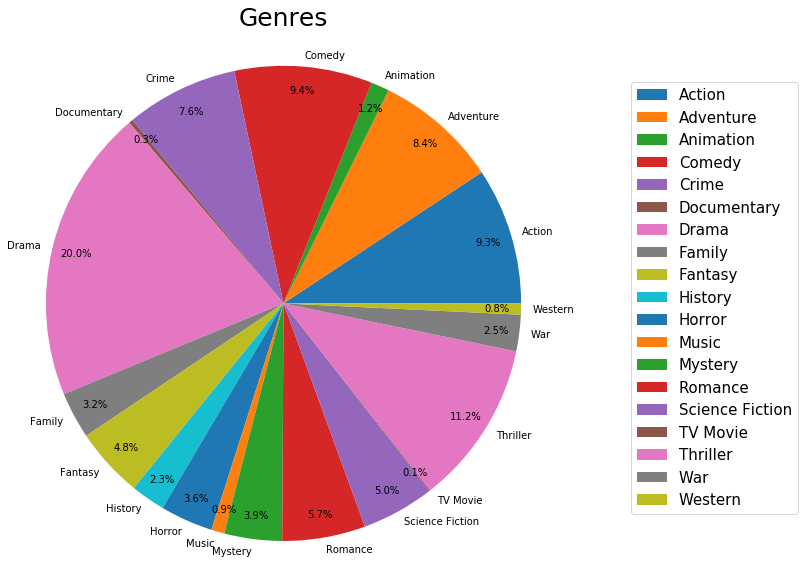

In [54]:
def question_11(df10):

    df11 = df10.copy()
    df11 = clean_data('genres', df11, 'name')

    df11 = split_rows(df11, 'genres')
    genres = df11['genres']
    count = genres.value_counts()
    # just to make sure the genres with small percentage do not get together and make the graph more clear
    count = count.sort_index()
    
    count.plot.pie(subplots=True, autopct='%1.1f%%',figsize=(10,8),pctdistance=0.9, radius=1.5,
                       textprops = {'fontsize':10}, labeldistance=1.05)

    plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=15, bbox_transform=plt.gcf().transFigure)
    plt.subplots_adjust(left=0.0, bottom=0.1, right=0.55)
    plt.ylabel('')
    plt.title('Genres', fontsize=25, pad = 80)
   
    plt.show()
question_11(df8)


In [200]:
genres

{'Crime': 111,
 'Comedy': 136,
 'Adventure': 122,
 'Action': 135,
 'Science Fiction': 72,
 'Animation': 18,
 'Family': 46,
 'Drama': 290,
 'Romance': 82,
 'Mystery': 57,
 'Music': 13,
 'Fantasy': 69,
 'Thriller': 162,
 'War': 36,
 'Horror': 52,
 'Western': 11,
 'History': 34,
 'Documentary': 4,
 'TV Movie': 1}

# Question 12 : (based on the dataframe created in Question-10) (2 Marks)

- (1.5 Marks) Plot a bar chart of the countries in which movies have been produced. For each county you need to show the count of movies.
- (0.5 Mark) Countries should be alphabetically sorted according to their names.
Please be noted that the following figure is just a sample and it does not reflect the real values or the list of all countries in the dataset.

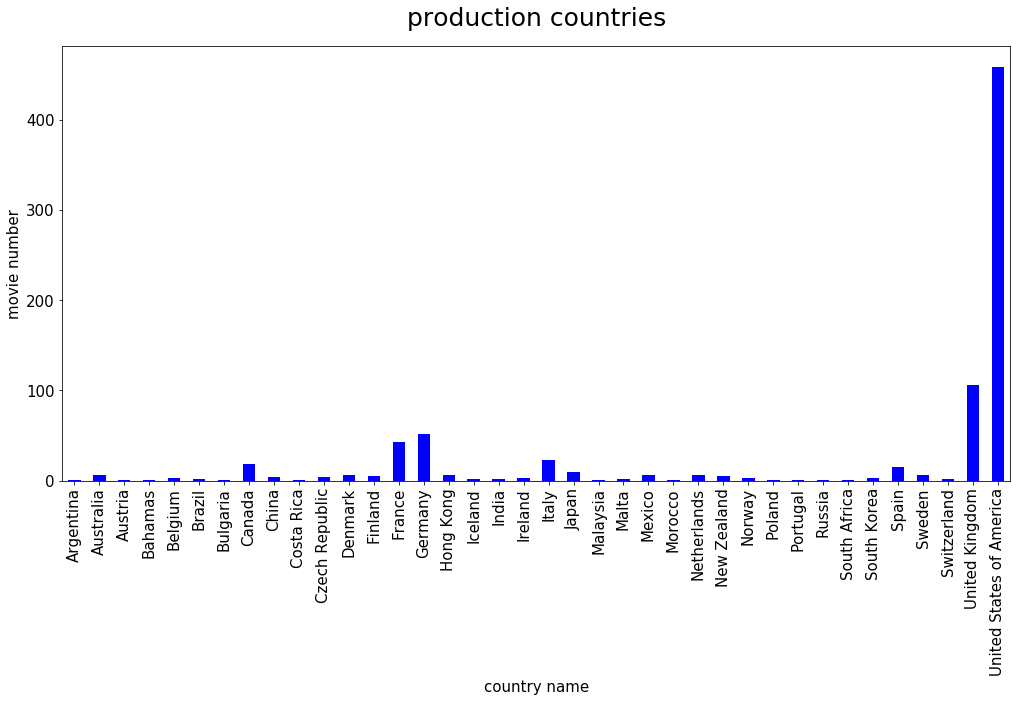

In [34]:
def question_12(df10):
    df12 = df10.copy()
    df12 = clean_data('production_countries', df12, 'name')
    df12 = split_rows(df12, 'production_countries')
    countries = df12['production_countries']
    count = countries.value_counts()
    count = count.sort_index()
    count.plot.bar(figsize=(17,8), fontsize=15, color='blue')
#     print(count)
    plt.title('production countries', fontsize=25, pad=20)
    plt.xlabel('country name', fontsize=15)
    plt.ylabel('movie number', fontsize=15)


    plt.show()
question_12(df10)

In [103]:
df10['production_countries'].values

array(["[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'CZ', 'name': 'Czech Republic'}, {'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'IT', 'name': 'I

# Question 13: (based on the dataframe created in Question-10) (2.5 Marks)

- (1.5 Marks) Plot a scatter chart with x axis being "vote_average" and y axis being "success_impact".
- (0.5 Marks) Ink bubbles based on the movie language (e.g, English, French); In case of having multiple languages for the same movie, you are free to pick any one as you wish.
- (0.5 Marks) Add a legend showing the name of languages and their associated colors.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


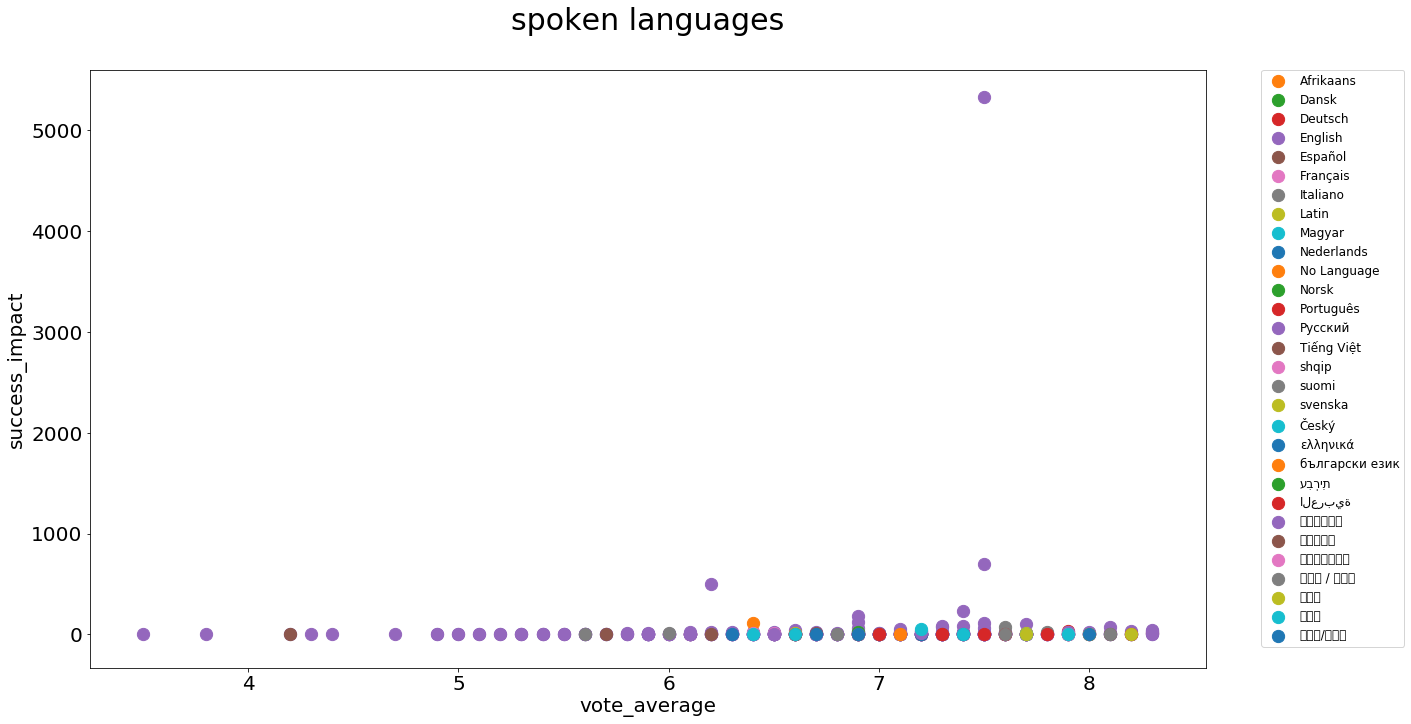

In [47]:
def question_13(df10):

    df13 = df10.copy()
    for index in df13.index:
        value = df13['spoken_languages'].loc[index]
        s = json.loads(json.dumps(eval(value)))
        df13['spoken_languages'].loc[index] = s[0]['name']

    df = df13.groupby('spoken_languages')
    fig, ax = plt.subplots(figsize=(20,11))
    for index, group in df:
        ax.scatter(group['vote_average'], group['success_impact'], label = index, s=150)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,numpoints=1,fontsize=12)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_xlabel('vote_average', fontsize=20)
    ax.set_ylabel('success_impact', fontsize=20)
    ax.set_title('spoken languages', fontsize=30, pad=40)
    plt.show()
question_13(df10)

In [20]:
df13

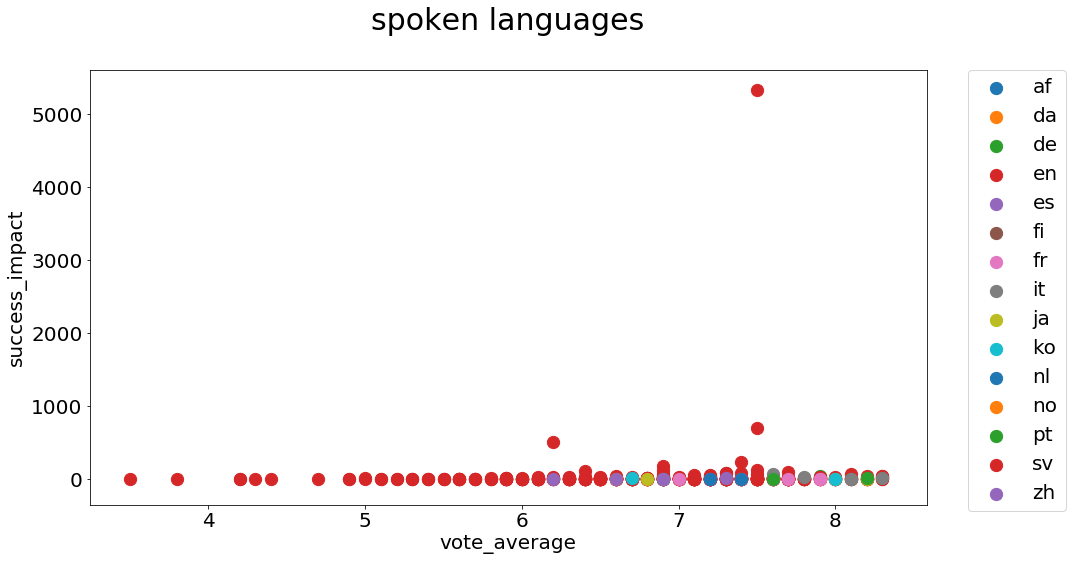

In [22]:
def question_13b(df10):

    df13 = df10.copy()

    df = df13.groupby('original_language')
    fig, ax = plt.subplots(figsize=(15,8))
    for index, group in df:
        ax.scatter(group['vote_average'], group['success_impact'], label = index, s=150)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,numpoints=1,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_xlabel('vote_average', fontsize=20)
    ax.set_ylabel('success_impact', fontsize=20)
    ax.set_title('spoken languages', fontsize=30, pad=40)
    plt.show()
 
question_13b(df10)

# print(df10['original_language'].values)